In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./DataSet/data.csv", delimiter="\t")

In [4]:
df.head()

Q1A  Q1I   Q1E  Q2A  Q2I   Q2E  Q3A  Q3I   Q3E  Q4A  ...  screensize  \
0    4   28  3890    4   25  2122    2   16  1944    4  ...           1   
1    4    2  8118    1   36  2890    2   35  4777    3  ...           2   
2    3    7  5784    1   33  4373    4   41  3242    1  ...           2   
3    2   23  5081    3   11  6837    2   37  5521    1  ...           2   
4    2   36  3215    2   13  7731    3    5  4156    4  ...           2   

   uniquenetworklocation  hand  religion  orientation  race  voted  married  \
0                      1     1        12            1    10      2        1   
1                      1     2         7            0    70      2        1   
2                      1     1         4            3    60      1        1   
3                      1     2         4            5    70      2        1   
4                      2     3        10            1    10      2        1   

   familysize       major  
0           2         NaN  
1           4         NaN  
2           3         NaN  
3           5     biology  
4           4  Psychology  

[5 rows x 172 columns]

In [5]:
df.shape

(39775, 172)

In [6]:
df.columns

Index(['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A',
       ...
       'screensize', 'uniquenetworklocation', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'major'],
      dtype='object', length=172)

<h4 style="color:green">Features we take</h4>
<ul style="color:yellow">
<li>Q1A to Q42A</li>
<li>TIPI1 toTIPI10</li>
<li>Education</li>
<li>Urban</li>
<li>age</li>
<li>religion</li>
<li>race</li>
<li>married</li>
<li>family-size</li>
<li>married</li>
<li>major</li>
</ul>

In [7]:
# Features to Remove
frem = [f'Q{i}E' for i in range(1, 43)]
frem.extend([f'Q{i}I' for i in range(1, 43)])
frem.extend([f'VCL{i}' for i in range(1, 17)])
frem.extend(['source', 'introelapse', 'testelapse', 'surveyelapse', 'engnat', 'hand', 'orientation','voted', 'country', 'screensize', 'uniquenetworklocation'])

In [8]:
df.drop(frem, axis = 1, inplace=True)

In [9]:
df.head()

Q1A  Q2A  Q3A  Q4A  Q5A  Q6A  Q7A  Q8A  Q9A  Q10A  ...  TIPI10  education  \
0    4    4    2    4    4    4    4    4    2     1  ...       1          2   
1    4    1    2    3    4    4    3    4    3     2  ...       5          2   
2    3    1    4    1    4    3    1    3    2     4  ...       2          2   
3    2    3    2    1    3    3    4    2    3     3  ...       1          1   
4    2    2    3    4    4    2    4    4    4     3  ...       3          3   

   urban  gender  age  religion  race  married  familysize       major  
0      3       2   16        12    10        1           2         NaN  
1      3       2   16         7    70        1           4         NaN  
2      3       2   17         4    60        1           3         NaN  
3      3       2   13         4    70        1           5     biology  
4      2       2   19        10    10        1           4  Psychology  

[5 rows x 61 columns]

In [10]:
df.shape

(39775, 61)

<h4 style="color:orange">Handle Null Values</h4>

<Axes: >

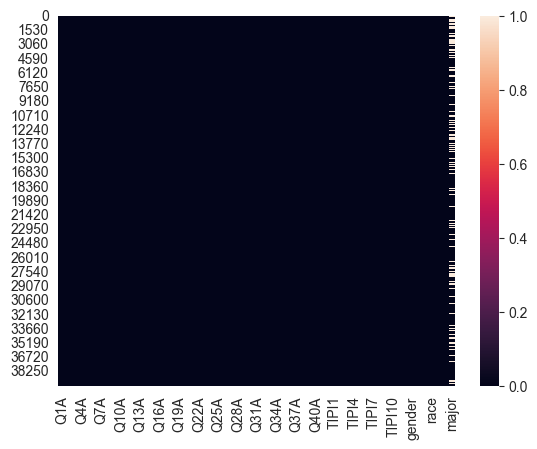

In [11]:
sns.heatmap(df.isnull())

In [12]:
# Calculating count of null Values for Each Feature
df.isnull().sum().tail()

religion          0
race              0
married           0
familysize        0
major         11425
dtype: int64

<h1 style="color:orange">Analysis of Data</h1>

In [13]:
df.head()

Q1A  Q2A  Q3A  Q4A  Q5A  Q6A  Q7A  Q8A  Q9A  Q10A  ...  TIPI10  education  \
0    4    4    2    4    4    4    4    4    2     1  ...       1          2   
1    4    1    2    3    4    4    3    4    3     2  ...       5          2   
2    3    1    4    1    4    3    1    3    2     4  ...       2          2   
3    2    3    2    1    3    3    4    2    3     3  ...       1          1   
4    2    2    3    4    4    2    4    4    4     3  ...       3          3   

   urban  gender  age  religion  race  married  familysize       major  
0      3       2   16        12    10        1           2         NaN  
1      3       2   16         7    70        1           4         NaN  
2      3       2   17         4    60        1           3         NaN  
3      3       2   13         4    70        1           5     biology  
4      2       2   19        10    10        1           4  Psychology  

[5 rows x 61 columns]

<div>
<p>1) Feature = Education</p>
<p>
How much education have you completed?" 

1=Less than high school, <br>
2=High school, <br>
3=University degree, <br> 
4=Graduate degree <br>
</p>
</div>

<Axes: xlabel='education', ylabel='count'>

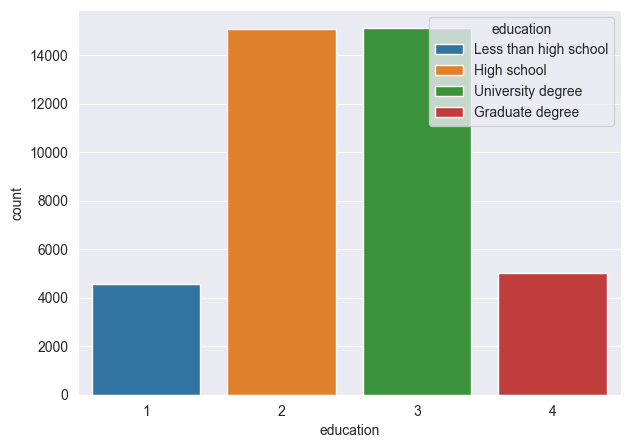

In [14]:
# Combining 0 and 1 as they represent same i.e. less than high school
df['education'] = df['education'].map({ 0: 1,  1: 1, 2: 2, 3: 3, 4: 4 })

def changeEducationTitle(title) -> str:
    if title == 0 or title == 1:
        return 'Less than high school'
    if title == 2:
        return 'High school'
    if title == 3: 
        return 'University degree'
    if title == 4: 
        return 'Graduate degree'
    return title


mapped_education = df['education'].apply(changeEducationTitle)
plt.figure(figsize=(7, 5))
sns.countplot(x=df['education'], hue=mapped_education)  

<h5>So Most of the Students who took the test are High School Students or University Students</h5>

<div>
<p>2) Feature = Major</p>
<p>
"If you attended a university, what was your major (e.g. "psychology", "English", "civil engineering")?"

</p>
</div>

In [15]:
# Simplified Major in another python module
import Major

# Filling Null values with No Degree
df['major'] = df['major'].fillna('No Degree')


df['major'] = df['major'].apply(Major.changeMajorValues)
df['major'].value_counts()

major
No Degree              12708
Engineering             3904
Business/Management     3220
I.T                     2572
Mathematics             2362
                       ...  
Mining                     1
usa                        1
Ophthmalology              1
Cabin Crew                 1
Virology                   1
Name: count, Length: 158, dtype: int64

<Axes: ylabel='major'>

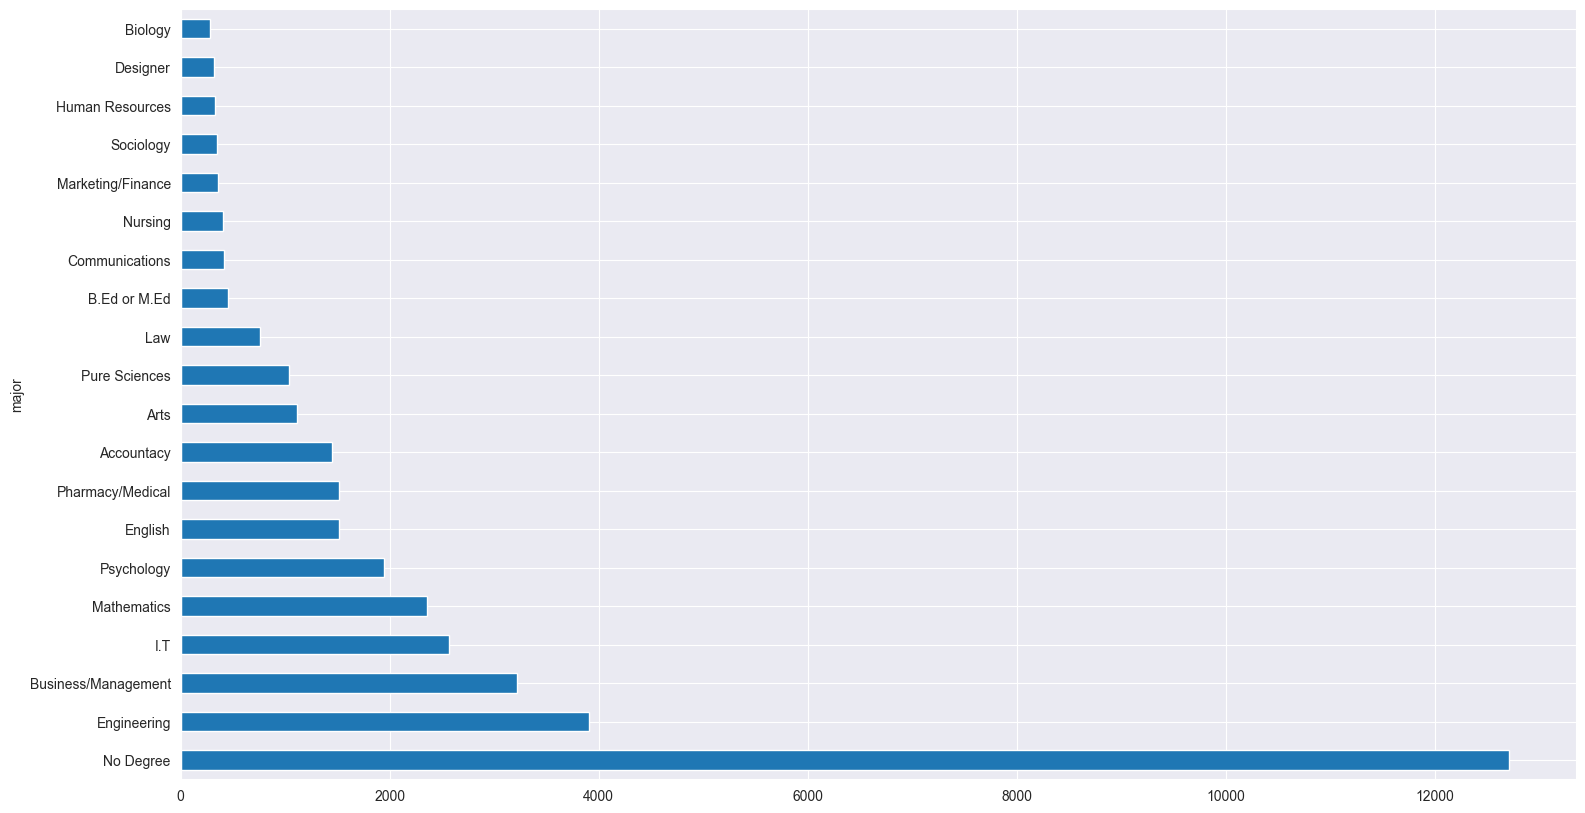

In [16]:
# Horizontal Bar Plot for Major Feature
plt.figure(figsize=(18, 10))
df['major'].value_counts()[:20].plot(kind = 'barh')

<h5>Most of The People have no degree at all</h5>

<h6>So Let's Just Remove it</h6>

In [17]:
df.drop("major", inplace = True, axis = 1)

<div>
<p>3) Feature = Urban</p>
<p>
"What type of area did you live when you were a child?", <br><br>
0 = None <br> 1 = Rural (country side),<br> 2 = Suburban,<br> 3 = Urban 
</p>
</div>

<Axes: xlabel='urban', ylabel='count'>

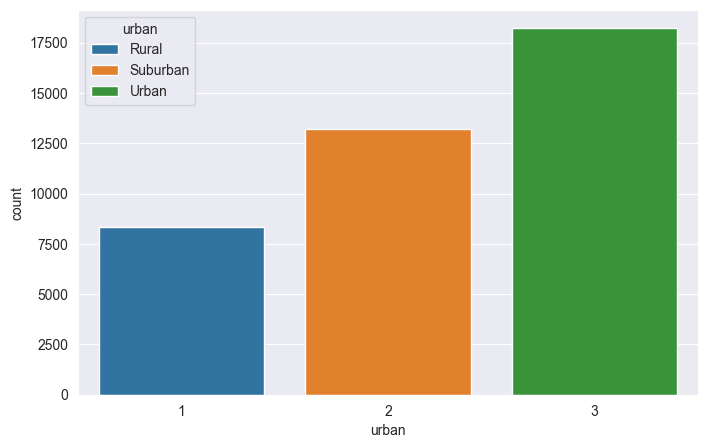

In [18]:
# Now as Urban is the most Used ones So we are taking None values as Urban
df['urban'] = df['urban'].map({0: 3, 1: 1, 2: 2, 3: 3})

def changeUrbanValues(value):
    if value == 1:
        return 'Rural'
    if value == 2:
        return 'Suburban'
    if value == 3:
        return 'Urban'
    return value 

urban = df['urban'].apply(changeUrbanValues)

plt.figure(figsize=(8, 5))
sns.countplot(x=df['urban'], hue= urban)

<h5>Majority People are from Urban areas like town or cities</h5>

<div>
<p>4) Feature = Gender</p>
<p>
"What is your gender?", <br><br> 1=Male, <br> 2=Female,<br>3=Other"
</p>
</div>

<Axes: xlabel='gender', ylabel='count'>

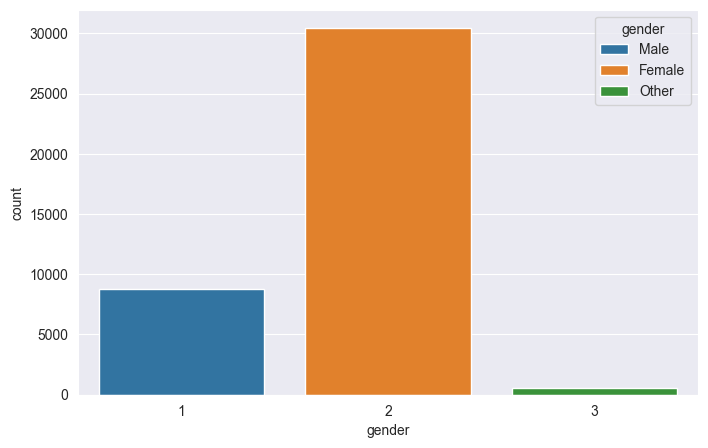

In [19]:
# Changing 0 to 2 as Females are most recorded ones 
df['gender'] = df['gender'].map({0: 2, 1: 1, 2: 2, 3: 3})

def changeGenderValue(value):
    if value == 1:
        return 'Male'
    if value == 2 or value == 0:
        return 'Female'
    return 'Other' # Let's not go there :)

gender = df['gender'].apply(changeGenderValue)

plt.figure(figsize=(8, 5))
sns.countplot(x = df['gender'], hue=gender)

<h5>Females are leading in Gender Category</h5>

<div>
<p>5) Feature = Religion</p>
<br>
<p>"What is your religion?"</p>
<ul>
<li>1=Agnostic</li>
<li>2=Atheist</li>
<li>3=Buddhist</li>
<li>4=Christian (Catholic)</li>
<li>5=Christian (Mormon)</li>
<li>6=Christian (Protestant)</li>
<li>7=Christian (Other)</li>
<li>8=Hindu</li>
<li>9=Jewish</li>
<li>10=Muslim</li>
<li>11=Sikh</li>
<li>12=Other</li>
</ul>
</div>

religion
10    22073
2      3845
1      3245
4      3097
7      2254
12     2160
6      1544
8       700
3       527
9       144
5       122
11       64
Name: count, dtype: int64

<Axes: xlabel='religion', ylabel='count'>

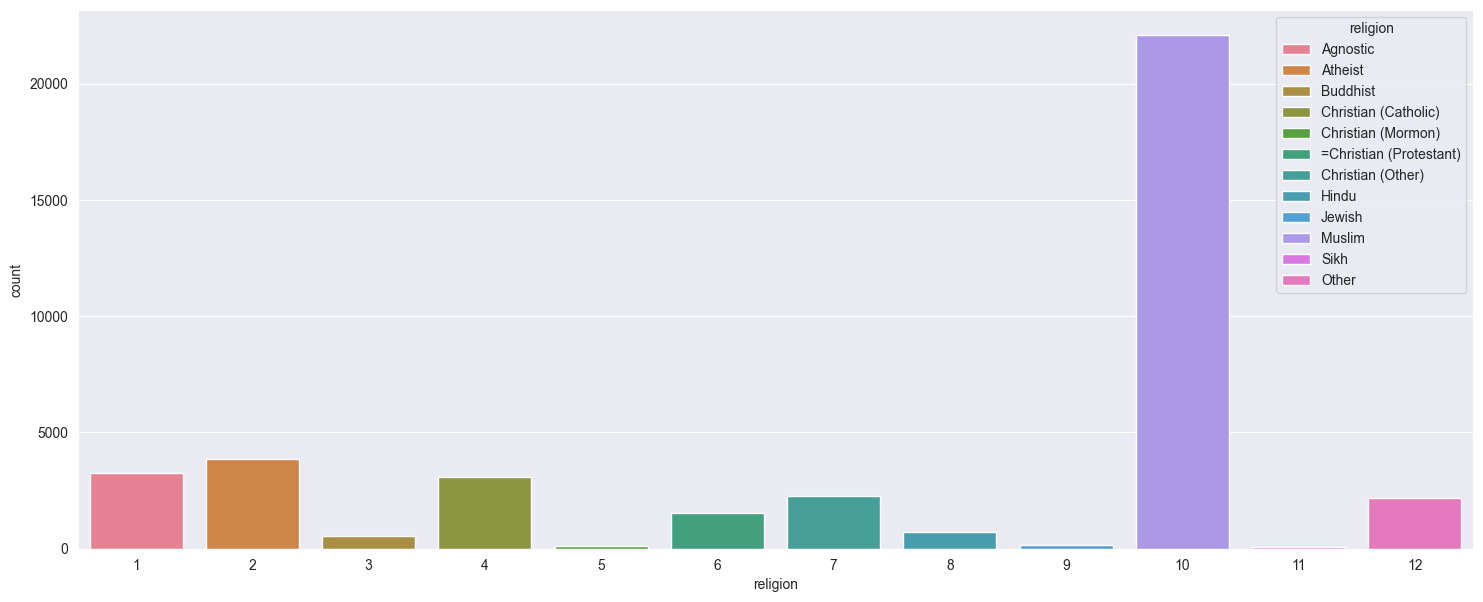

In [20]:
def updateEducationValue(value):
    if value == 0: 
        return 12
    return value

df['religion'] = df['religion'].apply(updateEducationValue)

def changeReligionValues(value) -> str:
    if value == 0:
        return 'Other'
    if value == 1:
        return 'Agnostic'
    if value == 2:
        return 'Atheist'
    if value == 3:
        return 'Buddhist'
    if value == 4:
        return 'Christian (Catholic)'
    if value == 5:
        return 'Christian (Mormon)'
    if value == 6:
        return '=Christian (Protestant)'
    if value == 7:
        return 'Christian (Other)'
    if value == 8:
        return 'Hindu'
    if value == 9:
        return 'Jewish'
    if value == 10:
        return 'Muslim'
    if value == 11:
        return 'Sikh'
    if value == 12:
        return 'Other'
    return value

religion = df['religion'].apply(changeReligionValues)
display(df['religion'].value_counts())

plt.figure(figsize=(18, 7))
sns.countplot(x=df['religion'], hue= religion)

<h5>Most of the People are Muslims</h5>

<div>
<p>6) Feature = Race</p>
<p>
"What is your race?"
</p>
<ul>
<li>10=Asian</li>
<li>20=Arab</li>
<li>30=Black</li>
<li>40=Indigenous Australian</li>
<li>50=Native American</li>
<li>60=White</li>
<li>70=Other</li>
</ul>
</div>

In [21]:
# Just to Make the value mapping easy we divide the race values by 10 
# And They even don't affect the data at all 
df['race'] = df['race'].apply(lambda x: x/10)
df['race'].head()

0    1.0
1    7.0
2    6.0
3    7.0
4    1.0
Name: race, dtype: float64

race
1.0    23106
6.0    10659
7.0     4832
3.0      603
2.0      333
5.0      220
4.0       22
Name: count, dtype: int64

<Axes: xlabel='race', ylabel='count'>

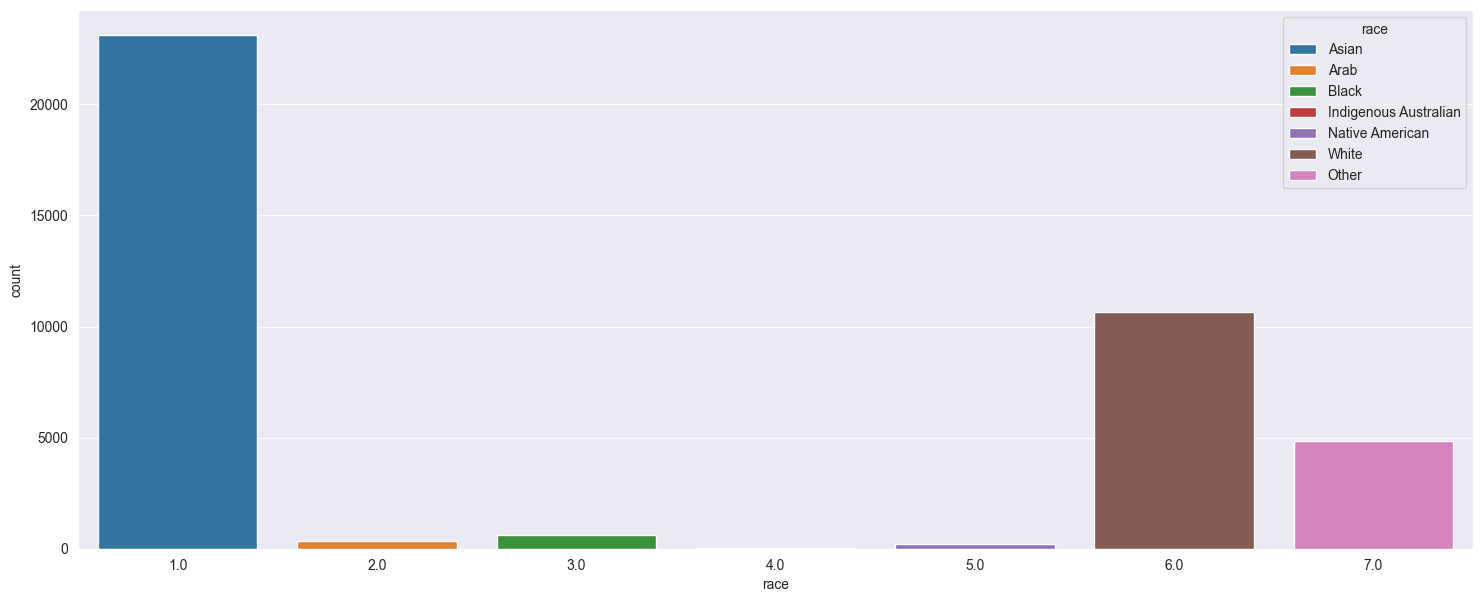

In [22]:
def changeRaceValues(value)->str: 
    if value == 1:
        return 'Asian'
    if value == 2:
        return 'Arab'
    if value == 3:
        return 'Black'
    if value == 4:
        return 'Indigenous Australian'
    if value == 5:
        return 'Native American'
    if value == 6:
        return 'White'
    if value == 7:
        return 'Other'

    return value

race = df['race'].apply(changeRaceValues)
display(df['race'].value_counts())


plt.figure(figsize=(18, 7))
sns.countplot(x=df['race'], hue=race)

<h5>Majority are Asians</h5>

In [23]:
# Let's Look at the Things we don't until Now
df.head() 

Q1A  Q2A  Q3A  Q4A  Q5A  Q6A  Q7A  Q8A  Q9A  Q10A  ...  TIPI9  TIPI10  \
0    4    4    2    4    4    4    4    4    2     1  ...      1       1   
1    4    1    2    3    4    4    3    4    3     2  ...      1       5   
2    3    1    4    1    4    3    1    3    2     4  ...      3       2   
3    2    3    2    1    3    3    4    2    3     3  ...      6       1   
4    2    2    3    4    4    2    4    4    4     3  ...      3       3   

   education  urban  gender  age  religion  race  married  familysize  
0          2      3       2   16        12   1.0        1           2  
1          2      3       2   16         7   7.0        1           4  
2          2      3       2   17         4   6.0        1           3  
3          1      3       2   13         4   7.0        1           5  
4          3      2       2   19        10   1.0        1           4  

[5 rows x 60 columns]

<h3>Analysis of TIPI Series</h3>

<h4>Documentation of TIPI</h4>
<p>
The Ten Item Personality Inventory was administered. A Very Brief Measure of the Big Five Personality Domains. Journal of Research in Personality, 37, 504-528.):
</p>
<br>
<ul>
<li>TIPI1	Extraverted, enthusiastic.</li>
<li>TIPI2	Critical, quarrelsome.</li>
<li>TIPI3	Dependable, self-disciplined.</li>
<li>TIPI4	Anxious, easily upset.</li>
<li>TIPI5	Open to new experiences, complex.</li>
<li>TIPI6	Reserved, quiet.</li>
<li>TIPI7	Sympathetic, warm.</li>
<li>TIPI8	Disorganized, careless.</li>
<li>TIPI9	Calm, emotionally stable.</li>
<li>TIPI10	Conventional, uncreative.</li>
</ul>
<br>
<p>
The TIPI items were rated "I see myself as:" _____ such that
</p>
<br>
<ul>
<li>1 = Disagree strongly</li>
<li>2 = Disagree moderately</li>
<li>3 = Disagree a little</li>
<li>4 = Neither agree nor disagree</li>
<li>5 = Agree a little</li>
<li>6 = Agree moderately</li>
<li>7 = Agree strongly</li>
</ul>

In [24]:
df['TIPI1'].value_counts()

TIPI1
5    8420
1    6229
6    6046
4    5877
2    5603
3    4633
7    2482
0     485
Name: count, dtype: int64

<Axes: xlabel='TIPI1', ylabel='count'>

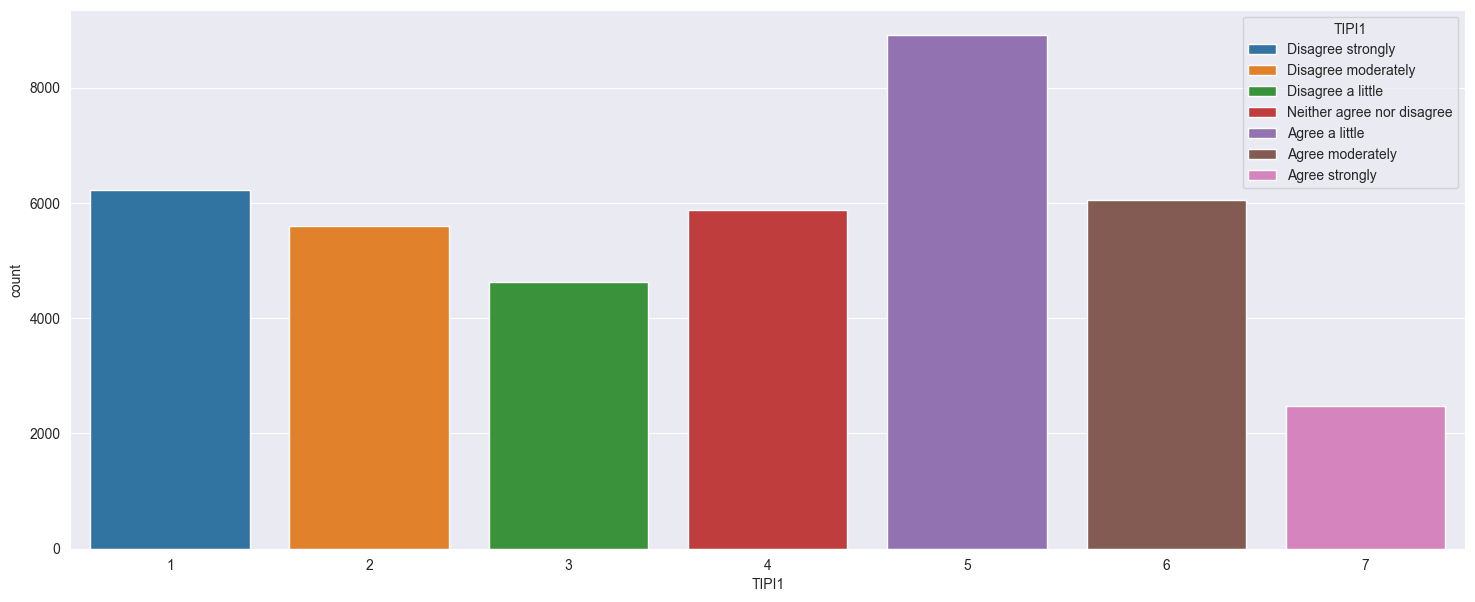

In [25]:
#change 0 value to 5 as it's the most chosen value in the survey
def changeFromToInTIPI(value, From, to):
    if value == From:
        return to
    return value

df['TIPI1'] = df['TIPI1'].apply(lambda value: changeFromToInTIPI(value, 0, 5))

def changeTIPIValues(value):
    if value == 1:
        return 'Disagree strongly'
    if value == 2:
        return 'Disagree moderately'
    if value == 3:
        return 'Disagree a little'
    if value == 4:
        return 'Neither agree nor disagree'
    if value == 5:
        return 'Agree a little'
    if value == 6:
        return 'Agree moderately'
    if value == 7:
        return 'Agree strongly'

    return value

tipi = df['TIPI1'].apply(changeTIPIValues)

plt.figure(figsize=(18, 7))
sns.countplot(x=df['TIPI1'], hue=tipi)

In [26]:
df['TIPI2'].value_counts()

TIPI2
5    10373
6     6990
4     6171
3     4326
2     4040
1     3985
7     3320
0      570
Name: count, dtype: int64

<Axes: xlabel='TIPI2', ylabel='count'>

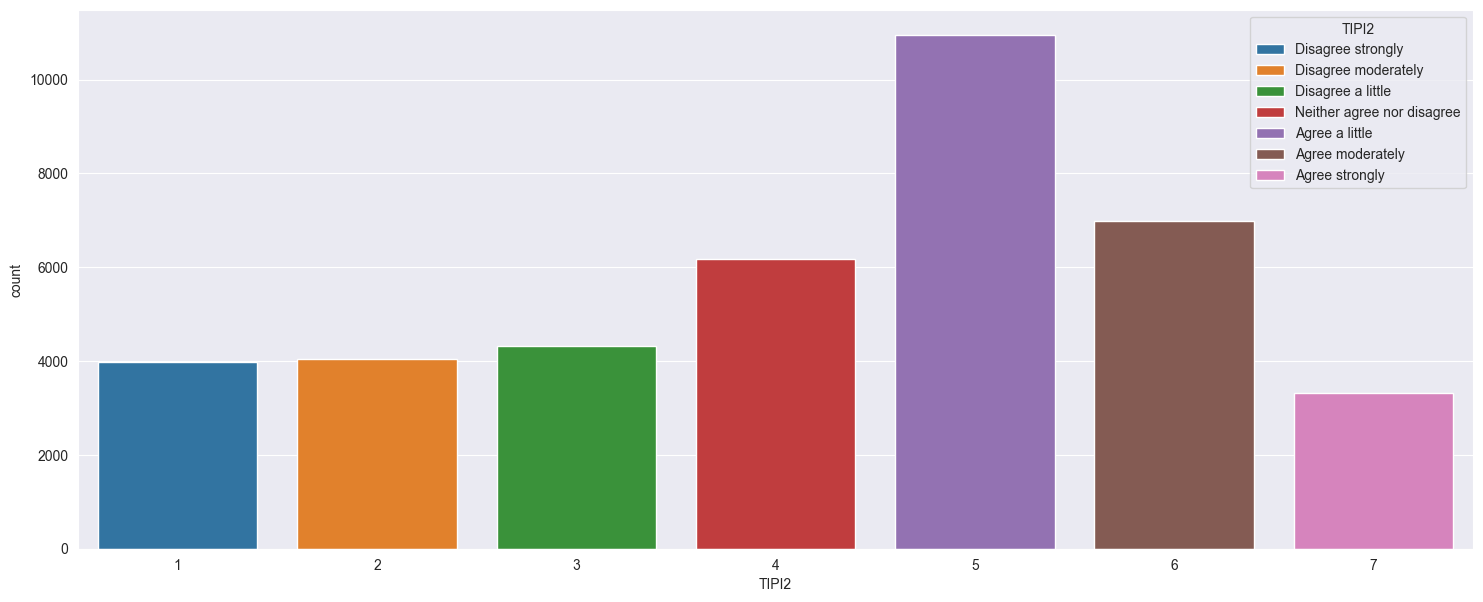

In [27]:
# change 0 value to 5 as it's the most chosen value in the survey
df['TIPI2'] = df['TIPI2'].apply(lambda value: changeFromToInTIPI(value, 0, 5))

# convert numbers to string for better viz
tipi = df['TIPI2'].apply(changeTIPIValues)

plt.figure(figsize=(18, 7))
sns.countplot(x=df['TIPI2'], hue=tipi)

In [28]:
df['TIPI3'].value_counts()

TIPI3
6    10230
5     9121
7     6242
4     4516
3     3981
2     2843
1     2252
0      590
Name: count, dtype: int64

<Axes: xlabel='TIPI3', ylabel='count'>

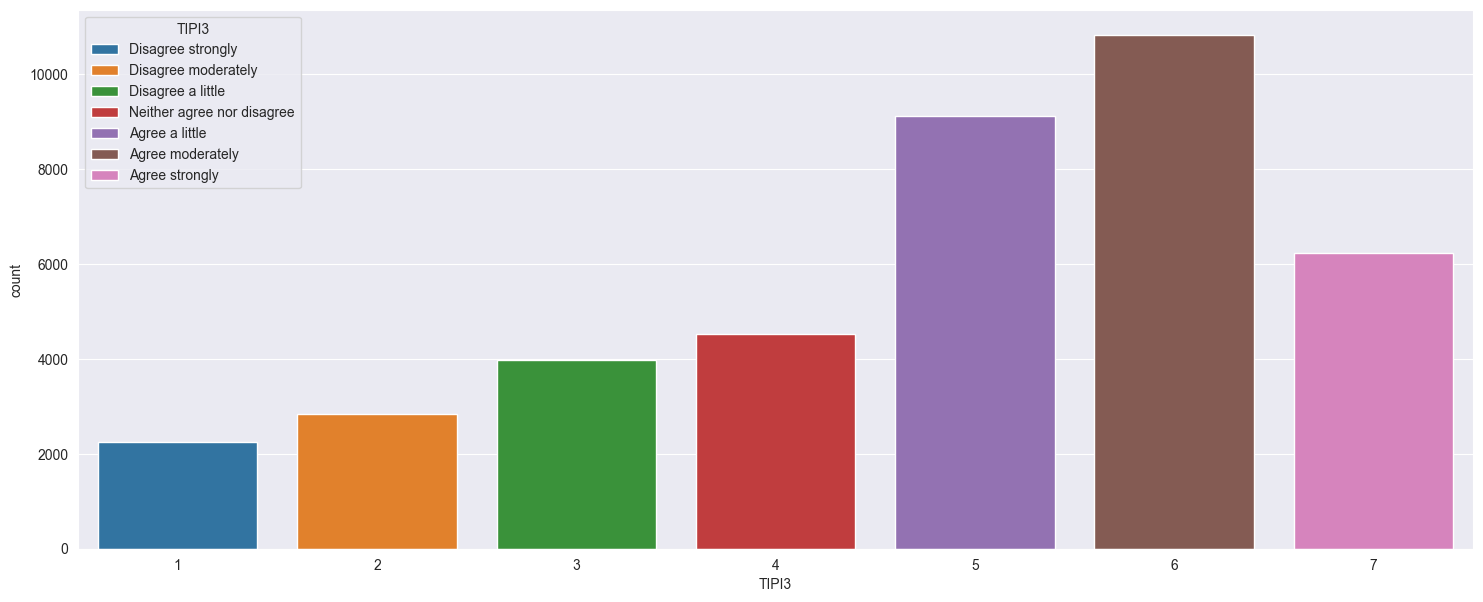

In [29]:
# change 0 value to 5 as it's the most chosen value in the survey
df['TIPI3'] = df['TIPI3'].apply(lambda value: changeFromToInTIPI(value, 0, 6))

# convert numbers to string for better viz
tipi = df['TIPI3'].apply(changeTIPIValues)

plt.figure(figsize=(18, 7))
sns.countplot(x=df['TIPI3'], hue=tipi)

In [30]:
df['TIPI4'].value_counts()

TIPI4
7    11360
6     9561
5     8751
4     2720
2     2444
3     2434
1     2042
0      463
Name: count, dtype: int64

<Axes: xlabel='TIPI4', ylabel='count'>

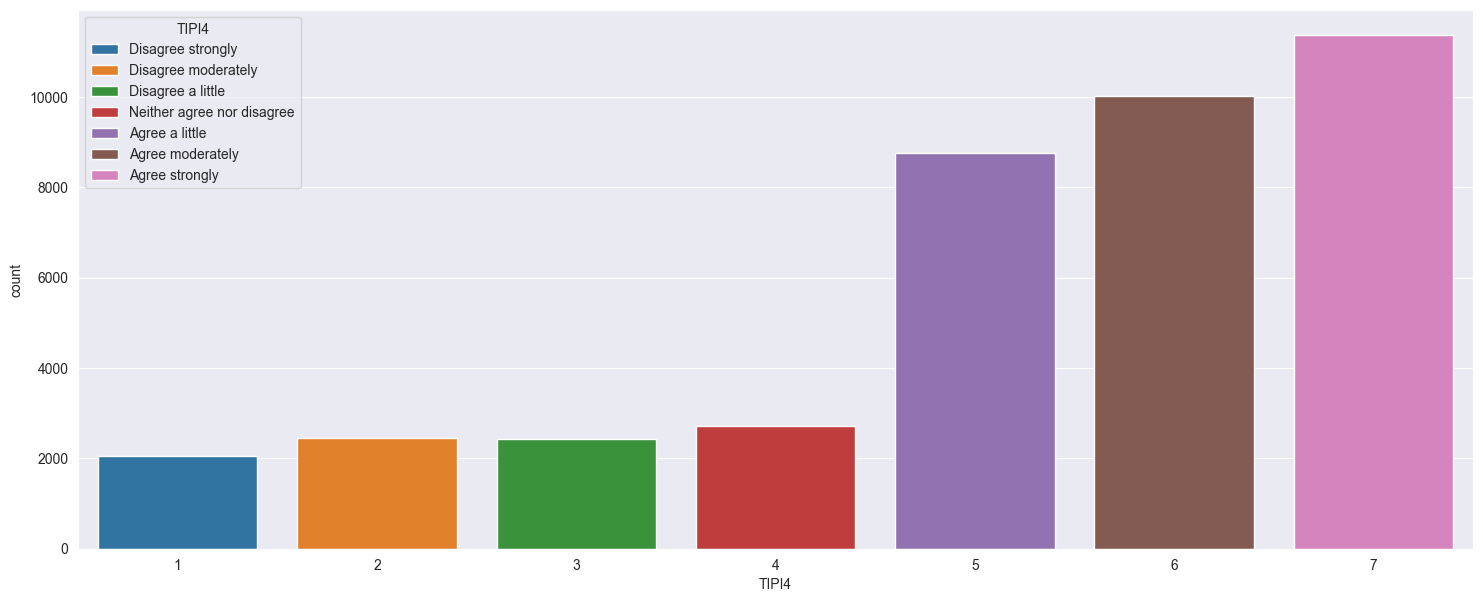

In [31]:
# change 0 value to 5 as it's the most chosen value in the survey
df['TIPI4'] = df['TIPI4'].apply(lambda value: changeFromToInTIPI(value, 0, 6))

# convert numbers to string for better viz
tipi = df['TIPI4'].apply(changeTIPIValues)

plt.figure(figsize=(18, 7))
sns.countplot(x=df['TIPI4'], hue=tipi)

In [32]:
df['TIPI5'].value_counts()

TIPI5
6    9697
5    9525
7    7682
4    5140
3    3341
2    2226
1    1647
0     517
Name: count, dtype: int64

<Axes: xlabel='TIPI5', ylabel='count'>

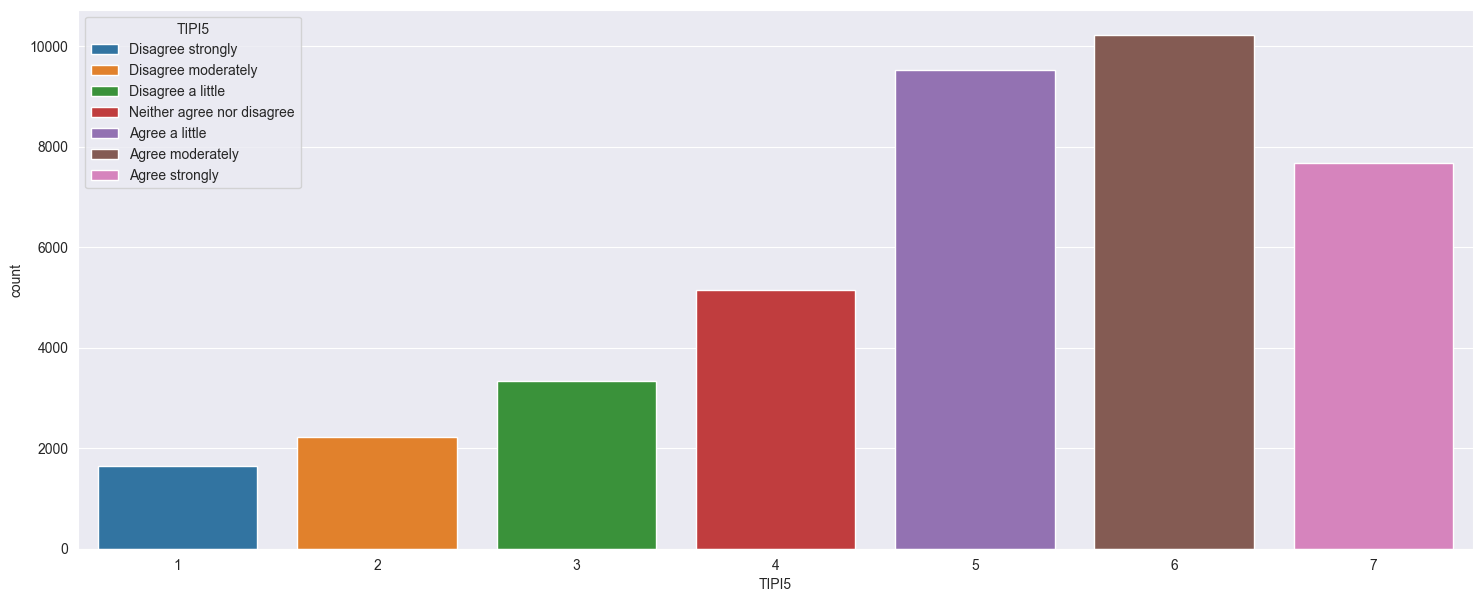

In [33]:
# change 0 value to 5 as it's the most chosen value in the survey
df['TIPI5'] = df['TIPI5'].apply(lambda value: changeFromToInTIPI(value, 0, 6))

# convert numbers to string for better viz
tipi = df['TIPI5'].apply(changeTIPIValues)

plt.figure(figsize=(18, 7))
sns.countplot(x=df['TIPI5'], hue=tipi)

In [34]:
df['TIPI6'].value_counts()

TIPI6
7    9626
6    8094
5    7733
4    4943
3    3475
2    2748
1    2666
0     490
Name: count, dtype: int64

<Axes: xlabel='TIPI6', ylabel='count'>

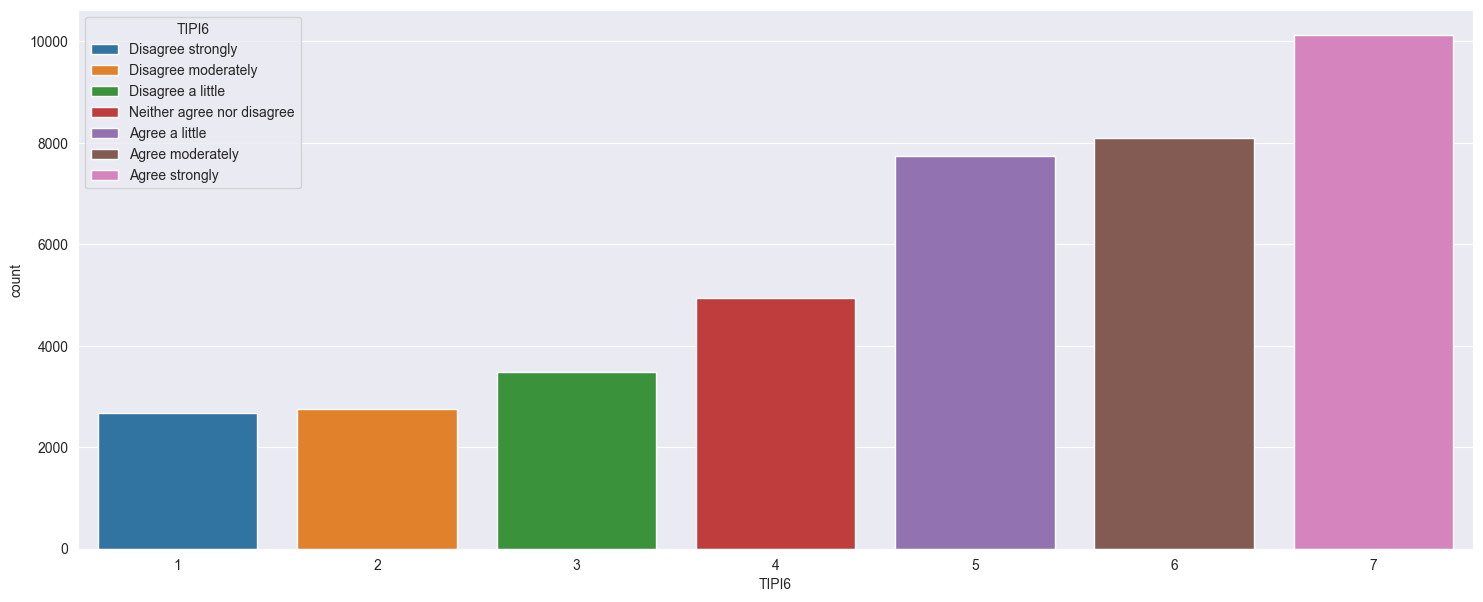

In [35]:
# change 0 value to 5 as it's the most chosen value in the survey
df['TIPI6'] = df['TIPI6'].apply(lambda value: changeFromToInTIPI(value, 0, 7))

# convert numbers to string for better viz
tipi = df['TIPI6'].apply(changeTIPIValues)

plt.figure(figsize=(18, 7))
sns.countplot(x=df['TIPI6'], hue=tipi)

In [36]:
df['TIPI7'].value_counts()

TIPI7
6    10997
7    10007
5     9097
4     4421
3     2270
2     1367
1     1015
0      601
Name: count, dtype: int64

<Axes: xlabel='TIPI7', ylabel='count'>

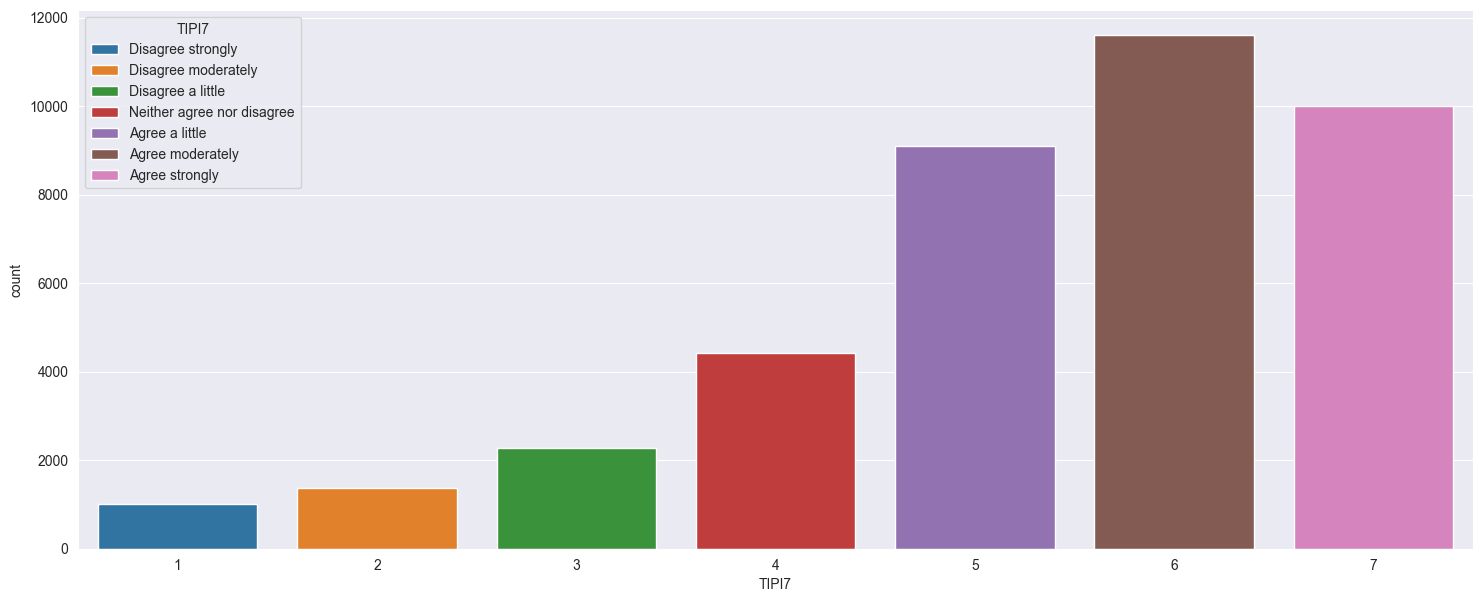

In [37]:
# change 0 value to 5 as it's the most chosen value in the survey
df['TIPI7'] = df['TIPI7'].apply(lambda value: changeFromToInTIPI(value, 0, 6))

# convert numbers to string for better viz
tipi = df['TIPI7'].apply(changeTIPIValues)

plt.figure(figsize=(18, 7))
sns.countplot(x=df['TIPI7'], hue=tipi)

In [38]:
df['TIPI8'].value_counts()

TIPI8
5    9300
6    6369
7    5841
4    4577
3    4446
2    4445
1    4138
0     659
Name: count, dtype: int64

<Axes: xlabel='TIPI8', ylabel='count'>

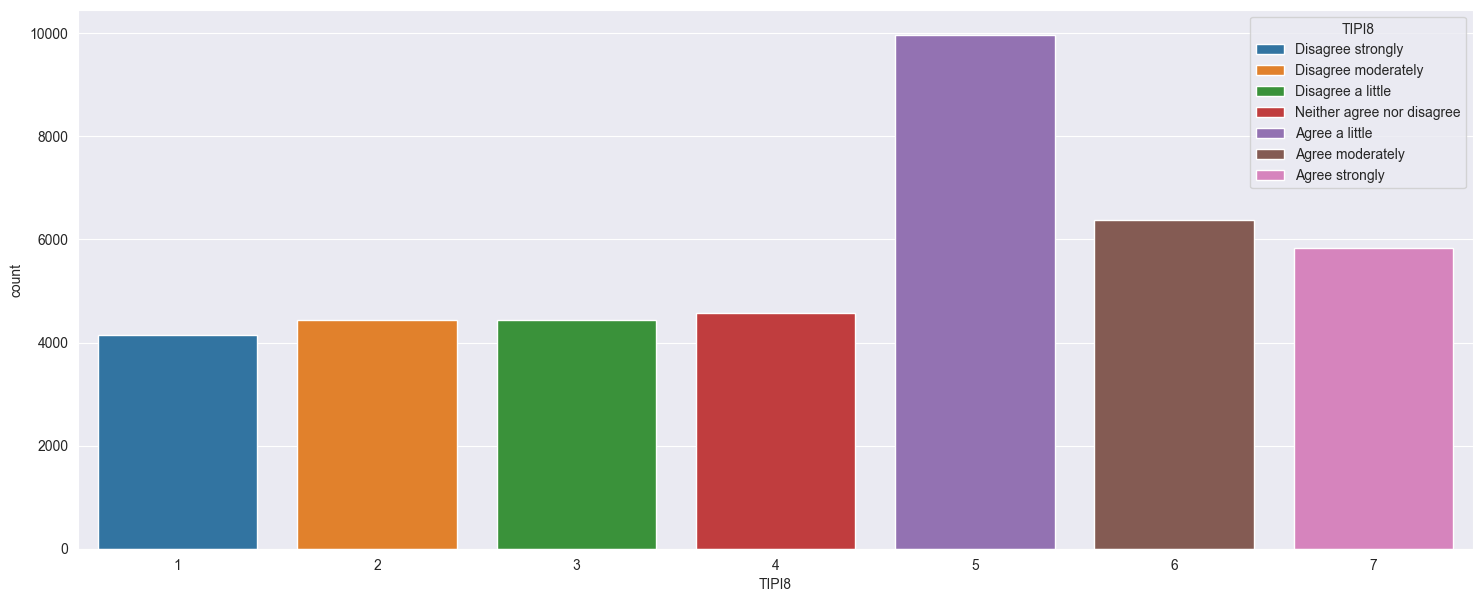

In [39]:
# change 0 value to 5 as it's the most chosen value in the survey
df['TIPI8'] = df['TIPI8'].apply(lambda value: changeFromToInTIPI(value, 0, 5))

# convert numbers to string for  better viz
tipi = df['TIPI8'].apply(changeTIPIValues)

plt.figure(figsize=(18, 7))
sns.countplot(x=df['TIPI8'], hue=tipi)

In [40]:
df['TIPI9'].value_counts()

TIPI9
4    6837
3    6819
2    6401
5    6250
1    5507
6    4943
7    2591
0     427
Name: count, dtype: int64

<Axes: xlabel='TIPI9', ylabel='count'>

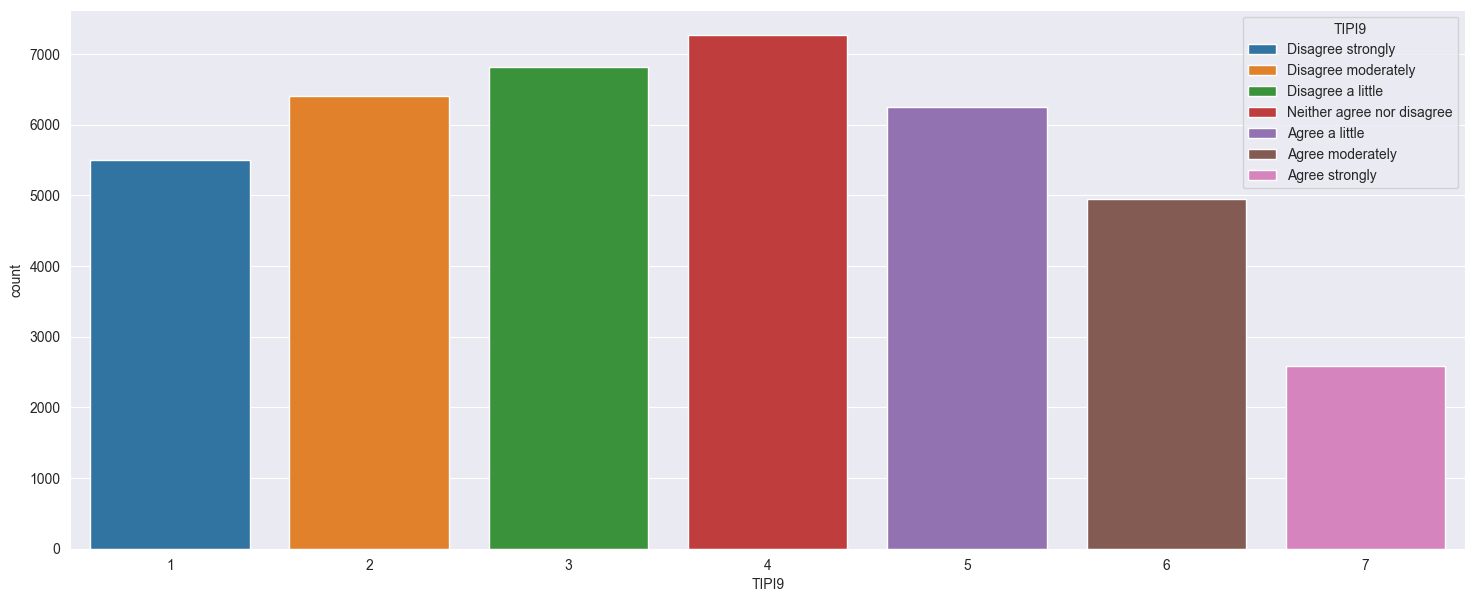

In [41]:
# change 0 value to 5 as it's the most chosen value in the survey
df['TIPI9'] = df['TIPI9'].apply(lambda value: changeFromToInTIPI(value, 0, 4))

# convert numbers to string for better viz
tipi = df['TIPI9'].apply(changeTIPIValues)

plt.figure(figsize=(18, 7))
sns.countplot(x=df['TIPI9'], hue=tipi)

In [42]:
df['TIPI10'].value_counts()

TIPI10
4    7665
5    6653
3    6184
2    5714
1    5404
6    4106
7    3494
0     555
Name: count, dtype: int64

<Axes: xlabel='TIPI10', ylabel='count'>

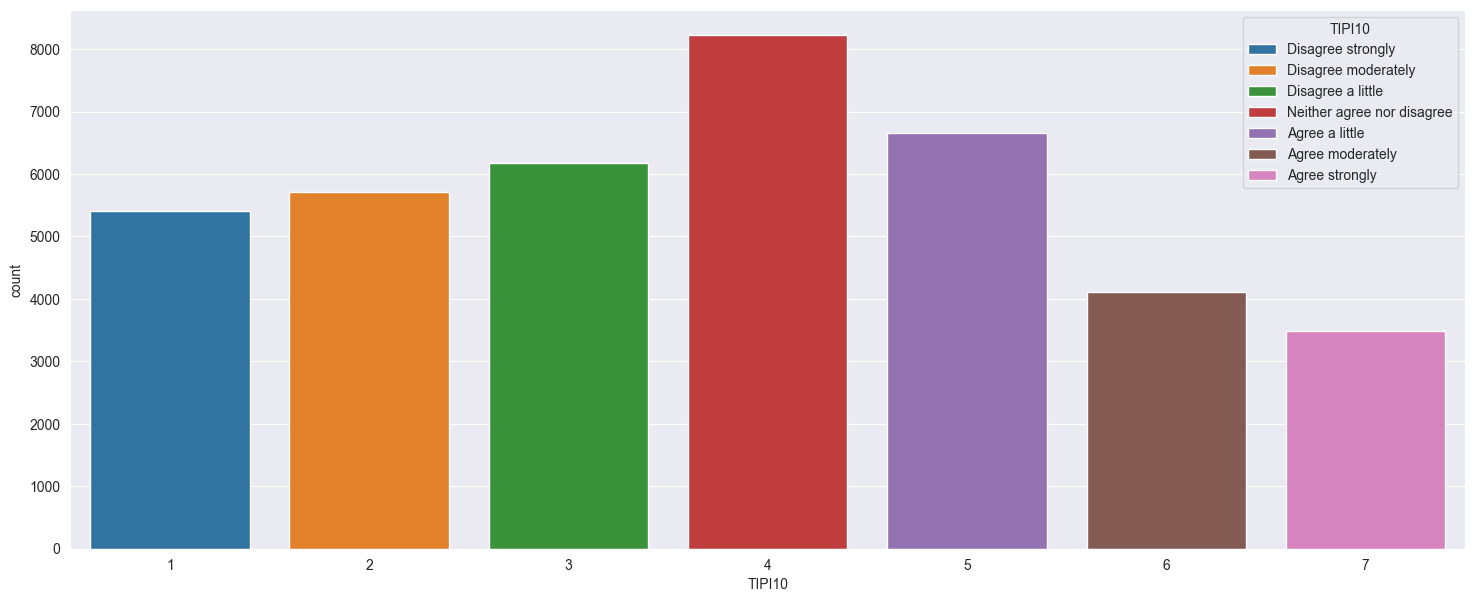

In [43]:
# change 0 value to 5 as it's the most chosen value in the survey
df['TIPI10'] = df['TIPI10'].apply(lambda value: changeFromToInTIPI(value, 0, 4))

# convert numbers to string for better viz
tipi = df['TIPI10'].apply(changeTIPIValues)

plt.figure(figsize=(18, 7))
sns.countplot(x=df['TIPI10'], hue=tipi)

<div>
<p>8) Feature = Family Size</p>
<p>
"Including you, how many children did your mother have?"
</p>
</div>


In [44]:
df['familysize'].value_counts()

familysize
3      9206
2      9018
4      7539
5      4830
1      2946
6      2450
7      1243
0      1125
8       676
9       331
10      195
11      109
12       56
13       19
14        8
15        6
16        5
17        3
24        1
23        1
21        1
19        1
62        1
26        1
65        1
54        1
99        1
133       1
Name: count, dtype: int64

<Axes: xlabel='familysize', ylabel='Count'>

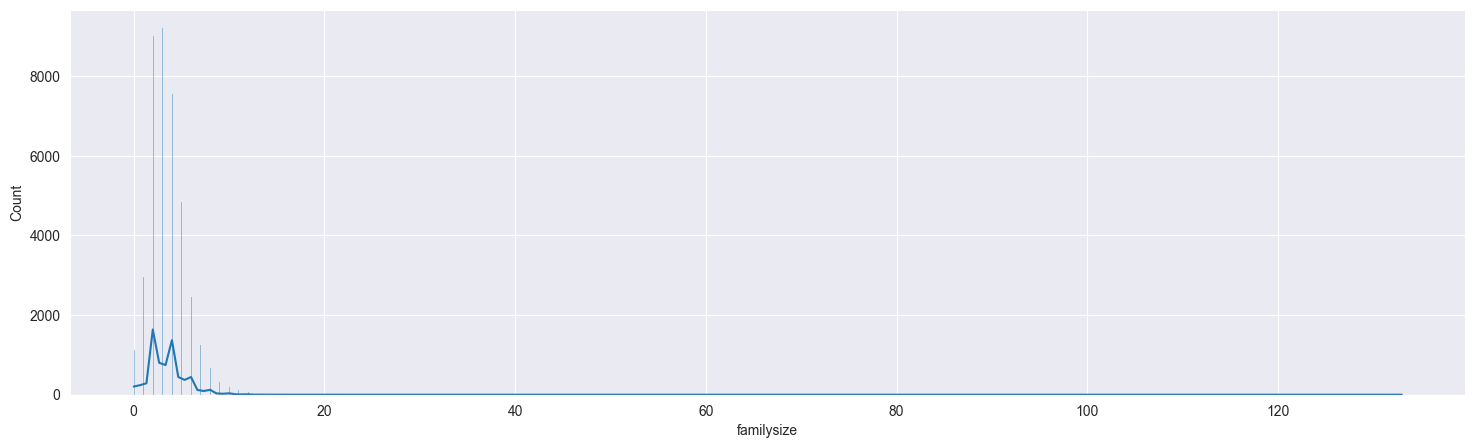

In [45]:
plt.figure(figsize=(18, 5))
sns.histplot(x=df['familysize'], kde=True)

<h5>There are a lot of outliers in Family Size So let's Remove the records that has family size more than 13</h5>

In [46]:
idx = df[df['familysize'] > 13].index


print(f'Depression size before: {df.shape[0]}')
df = df.drop(idx, axis=0)
print(f'Depression size after: {df.shape[0]}')

Depression size before: 39775
Depression size after: 39743


<h5>Nothing like a big affect on Our Data Right :)</h5>

<Axes: xlabel='familysize', ylabel='Count'>

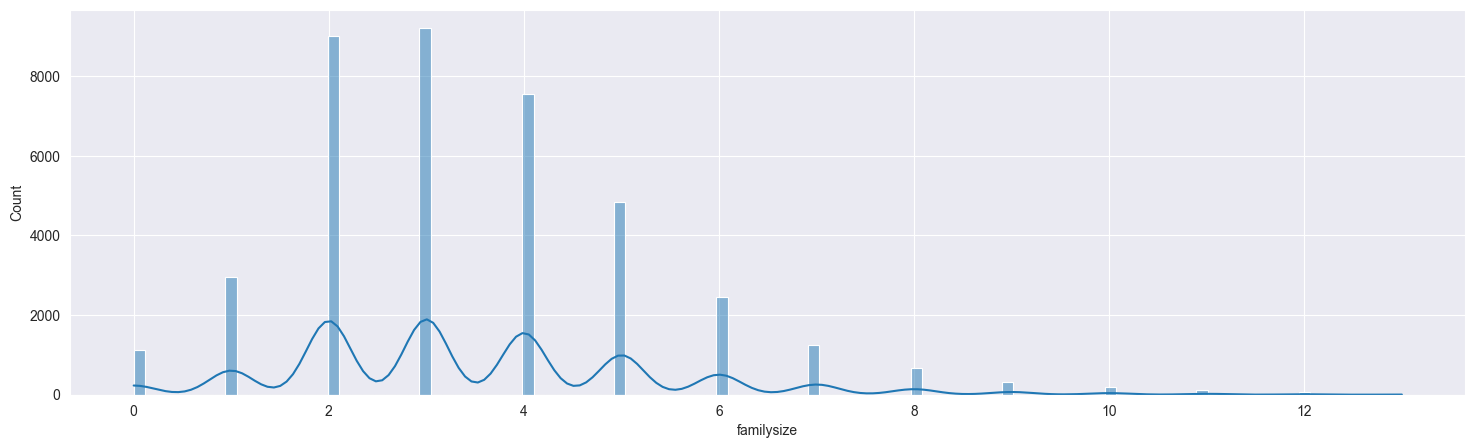

In [47]:
plt.figure(figsize=(18, 5))
sns.histplot(x=df['familysize'], kde=True)

<div>
<p>9) Feature = Martial Status</p>
<p>
"What is your marital status?"
</p>
<ul>
<li>1=Never married</li><li>2=Currently married</li><li>3=Previously married</li>
</ul>
</div>


In [48]:
df['married'].value_counts()

married
1    34104
2     4354
3     1090
0      195
Name: count, dtype: int64

<Axes: xlabel='married', ylabel='count'>

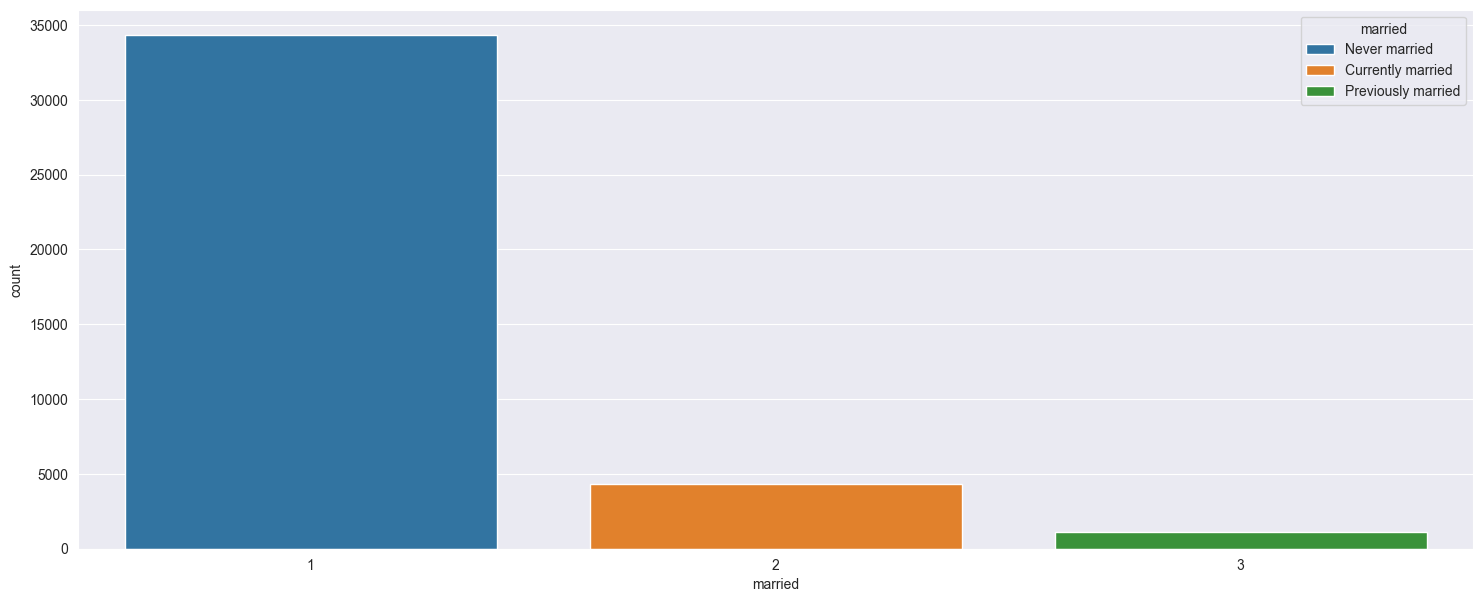

In [49]:
def change0to1inMarried(value):
    if value == 0:
        return 1
    return value

# change 0 to 1 value as it is the most answered one
df['married'] = df['married'].apply(change0to1inMarried)

def changeMarriedValueToString(value):
    if value == 1:
        return 'Never married'
    if value == 2:
        return 'Currently married'
    if value == 3:
        return 'Previously married'
    return value


married = df['married'].apply(changeMarriedValueToString)

plt.figure(figsize=(18, 7))
sns.countplot(x=df['married'], hue=married)

<h5>Most of People who have depression are un-married</h5>

In [50]:
df.head()

Q1A  Q2A  Q3A  Q4A  Q5A  Q6A  Q7A  Q8A  Q9A  Q10A  ...  TIPI9  TIPI10  \
0    4    4    2    4    4    4    4    4    2     1  ...      1       1   
1    4    1    2    3    4    4    3    4    3     2  ...      1       5   
2    3    1    4    1    4    3    1    3    2     4  ...      3       2   
3    2    3    2    1    3    3    4    2    3     3  ...      6       1   
4    2    2    3    4    4    2    4    4    4     3  ...      3       3   

   education  urban  gender  age  religion  race  married  familysize  
0          2      3       2   16        12   1.0        1           2  
1          2      3       2   16         7   7.0        1           4  
2          2      3       2   17         4   6.0        1           3  
3          1      3       2   13         4   7.0        1           5  
4          3      2       2   19        10   1.0        1           4  

[5 rows x 60 columns]

<div>
<p>10) Age Feature</p>
<p>
"How many years old are you?"
</p>
</div>


<Axes: xlabel='age'>

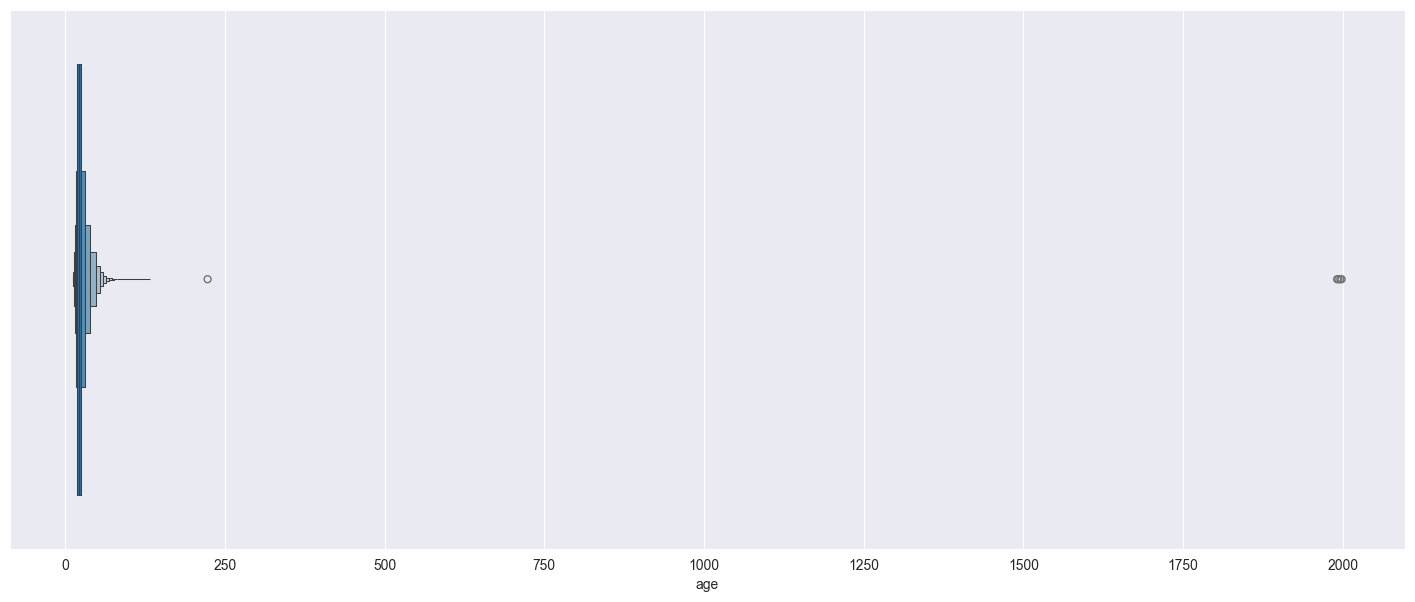

In [51]:
plt.figure(figsize=(18, 7))
sns.boxenplot(x=df['age']) 

<h6> Removing the Outliers</h6>

In [52]:
age_indexes = df[df['age'] > 80]['age'].index

print(f'No. of Outliers : {len(age_indexes)}')

print(f'Depression size before: {df.shape[0]}')
df.drop(age_indexes, axis=0, inplace=True) 
print(f'Depression size after: {df.shape[0]}') 

No. of Outliers : 10
Depression size before: 39743
Depression size after: 39733


<h6>After Removing Outliers</h6>

<Axes: xlabel='age'>

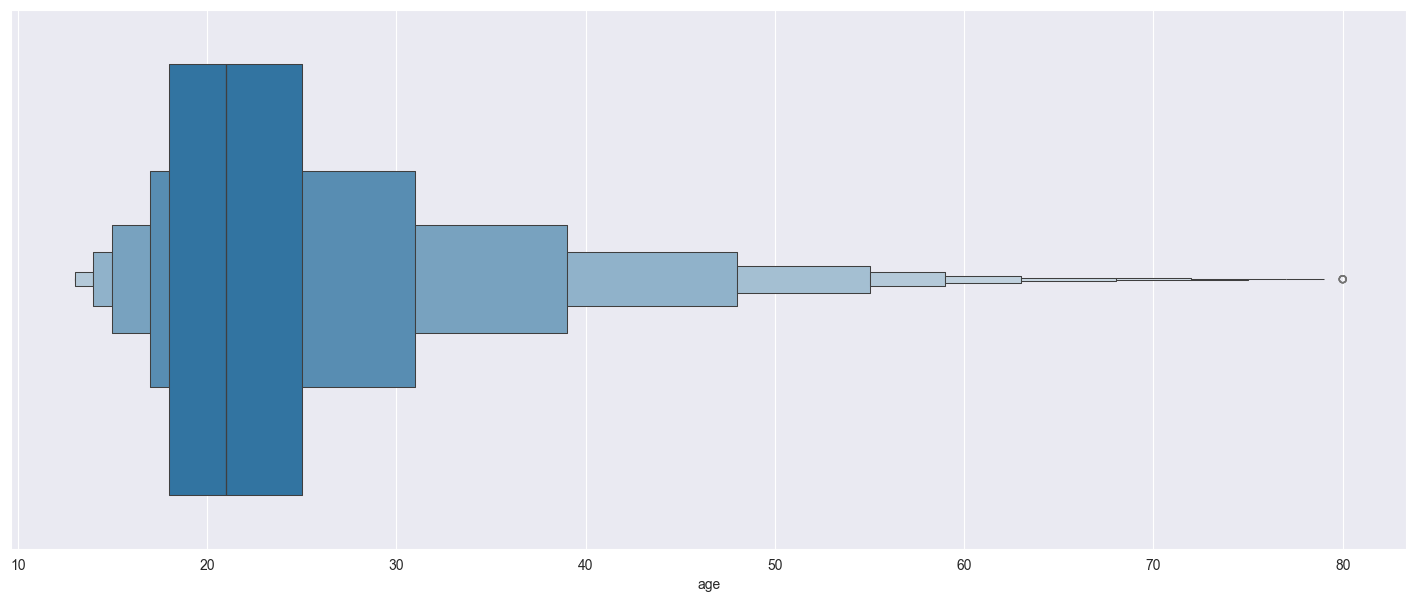

In [53]:
plt.figure(figsize=(18, 7))
sns.boxenplot(x=df['age']) 

<h3>Feature Engineering Part</h3>

<h5>Creating age group feature to visualize different age groups as a cluster</h5>

<Axes: xlabel='age', ylabel='count'>

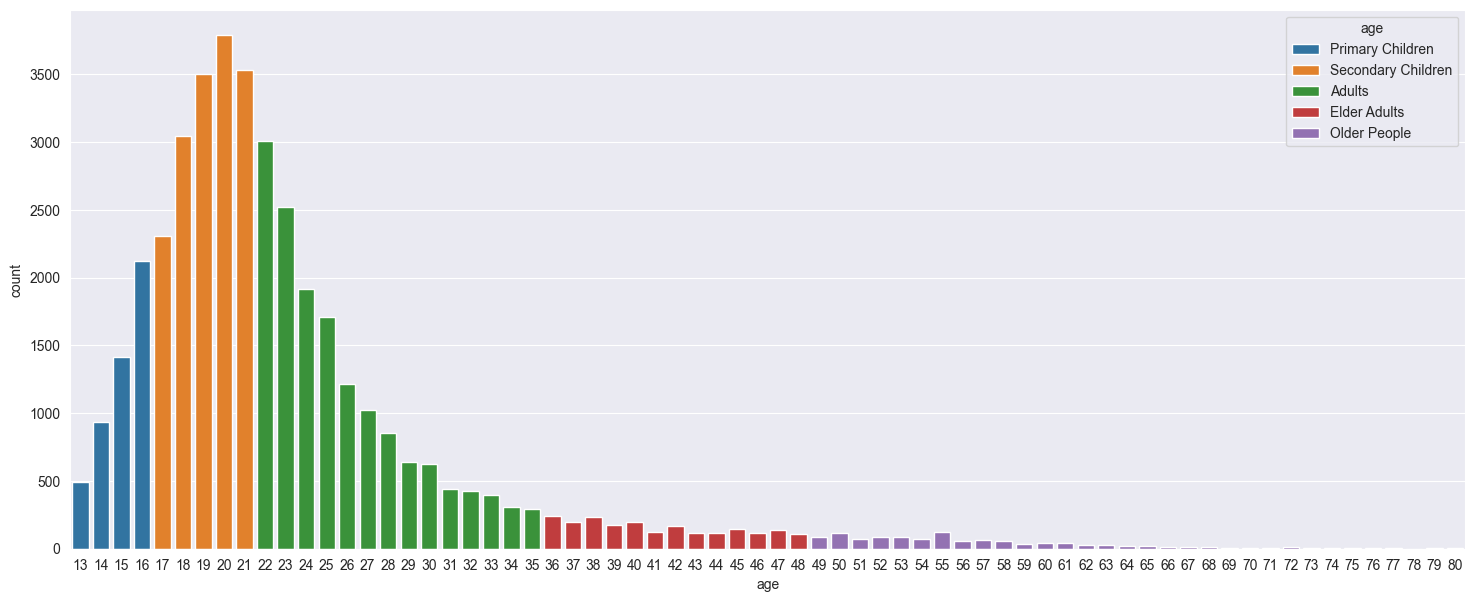

In [54]:
def makeAgeGroup(value):
    if value <= 10:
        return 'Under 10'
    if  10 <= value <= 16:
        return 'Primary Children'
    if 17 <= value <= 21:
        return 'Secondary Children'
    if 21 <= value <= 35:
        return 'Adults' 
    if 36 <= value <= 48:
        return 'Elder Adults'
    if value >= 49:
        return 'Older People'

age = df['age'].apply(makeAgeGroup)

plt.figure(figsize=(18, 7))
sns.countplot(x=df['age'], hue=age)

<h5>So Most of The People who participated are Secondary and Adults</h5>
<hr>
<h5>Then Let's Create a new Feature of Age Groups which group these age groups as a single quantity</h5>

In [55]:
def makeAgeGroupFeature(value):
    if value <= 10:
        return 1
    if  10 <= value <= 16:
        return 2
    if 17 <= value <= 21:
        return 3
    if 21 <= value <= 35:
        return 4 
    if 36 <= value <= 48:
        return 5
    if value >= 49:
        return 6

df['age_group'] = df['age'].apply(makeAgeGroupFeature)

df.head()

Q1A  Q2A  Q3A  Q4A  Q5A  Q6A  Q7A  Q8A  Q9A  Q10A  ...  TIPI10  education  \
0    4    4    2    4    4    4    4    4    2     1  ...       1          2   
1    4    1    2    3    4    4    3    4    3     2  ...       5          2   
2    3    1    4    1    4    3    1    3    2     4  ...       2          2   
3    2    3    2    1    3    3    4    2    3     3  ...       1          1   
4    2    2    3    4    4    2    4    4    4     3  ...       3          3   

   urban  gender  age  religion  race  married  familysize  age_group  
0      3       2   16        12   1.0        1           2          2  
1      3       2   16         7   7.0        1           4          2  
2      3       2   17         4   6.0        1           3          3  
3      3       2   13         4   7.0        1           5          2  
4      2       2   19        10   1.0        1           4          3  

[5 rows x 61 columns]

<h5> Now Age Feature is not of Use So we will Drop it </h5>

In [56]:
df.drop('age', axis=1, inplace=True)
df.head()

Q1A  Q2A  Q3A  Q4A  Q5A  Q6A  Q7A  Q8A  Q9A  Q10A  ...  TIPI9  TIPI10  \
0    4    4    2    4    4    4    4    4    2     1  ...      1       1   
1    4    1    2    3    4    4    3    4    3     2  ...      1       5   
2    3    1    4    1    4    3    1    3    2     4  ...      3       2   
3    2    3    2    1    3    3    4    2    3     3  ...      6       1   
4    2    2    3    4    4    2    4    4    4     3  ...      3       3   

   education  urban  gender  religion  race  married  familysize  age_group  
0          2      3       2        12   1.0        1           2          2  
1          2      3       2         7   7.0        1           4          2  
2          2      3       2         4   6.0        1           3          3  
3          1      3       2         4   7.0        1           5          2  
4          3      2       2        10   1.0        1           4          3  

[5 rows x 60 columns]

<h3>Creating a Total Count Feature</h3>

<h5>Intuition behind this feature</h5>
<p>
Basically to check whether our data is im-balanced or not
</p>

In [57]:
df['total_count'] = df.sum(axis = 1)
df.head()

Q1A  Q2A  Q3A  Q4A  Q5A  Q6A  Q7A  Q8A  Q9A  Q10A  ...  TIPI10  education  \
0    4    4    2    4    4    4    4    4    2     1  ...       1          2   
1    4    1    2    3    4    4    3    4    3     2  ...       5          2   
2    3    1    4    1    4    3    1    3    2     4  ...       2          2   
3    2    3    2    1    3    3    4    2    3     3  ...       1          1   
4    2    2    3    4    4    2    4    4    4     3  ...       3          3   

   urban  gender  religion  race  married  familysize  age_group  total_count  
0      3       2        12   1.0        1           2          2        216.0  
1      3       2         7   7.0        1           4          2        189.0  
2      3       2         4   6.0        1           3          3        171.0  
3      3       2         4   7.0        1           5          2        153.0  
4      2       2        10   1.0        1           4          3        212.0  

[5 rows x 61 columns]

In [58]:
df['total_count'].describe()

count    39733.000000
mean       171.074648
std         30.897739
min         71.000000
25%        147.000000
50%        170.000000
75%        194.000000
max        270.000000
Name: total_count, dtype: float64

<Axes: xlabel='total_count', ylabel='Count'>

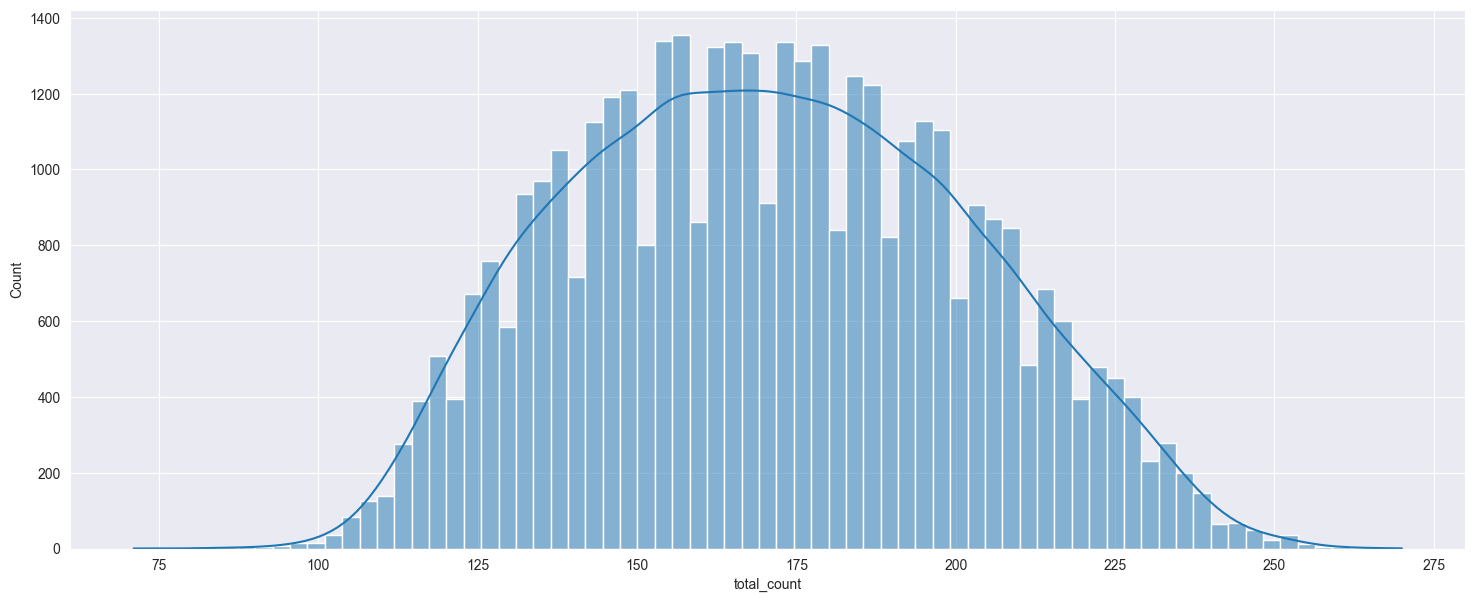

In [59]:
plt.figure(figsize=(18, 7))
sns.histplot(x = df['total_count'], kde = True)

<h5>So As Total count is normally distributed So Let's divide it in 5 parts</h5>
<ul>
<li>Normal</li>
<li>Mild</li>
<li>Moderate</li>
<li>Severe</li>
<li>Extremely Severe</li>
</ul>

In [60]:
df['total_count'].describe()

count    39733.000000
mean       171.074648
std         30.897739
min         71.000000
25%        147.000000
50%        170.000000
75%        194.000000
max        270.000000
Name: total_count, dtype: float64

<h6>The Mean is 178 approx. so we take <b>Moderate</b> as <b>178</b></h6>

In [61]:
df[df['total_count'] < 178]['total_count'].describe()

count    23068.000000
mean       149.374501
std         17.940857
min         71.000000
25%        136.000000
50%        151.000000
75%        164.000000
max        177.000000
Name: total_count, dtype: float64

<h6>The Mean is 152 approx. so we take <b>Mild</b> as <b>152</b></h6>

In [62]:
df[df['total_count'] < 152]['total_count'].describe()

count    11625.000000
mean       134.477161
std         11.685693
min         71.000000
25%        127.000000
50%        136.000000
75%        144.000000
max        151.000000
Name: total_count, dtype: float64

<h6>The Mean is 137 Approx so take <b>Normal</b> as <b>137 or less</b></h6>

In [63]:
df[df['total_count'] > 178]['total_count'].describe()

count    16238.000000
mean       201.720163
std         16.411613
min        179.000000
25%        188.000000
50%        199.000000
75%        213.000000
max        270.000000
Name: total_count, dtype: float64

<h6>The Mean is 204 Approx. so we take <b>Severe</b> as <b>204</b></h6> 
<h6>And <b>Extremely Severe</b> as <b>above 204</b></h6>

In [64]:
def buildTarget(value):
    if value <= 137:
        return 'Normal'
    if 137 < value <= 152:
        return 'Mild'
    if 152 < value <= 178:
        return 'Moderate'
    if 178 < value <= 204:
        return 'Severe'
    if value > 204:
        return 'Extremely Severe'

df['target'] = df['total_count'].apply(buildTarget)

df.head()

Q1A  Q2A  Q3A  Q4A  Q5A  Q6A  Q7A  Q8A  Q9A  Q10A  ...  education  urban  \
0    4    4    2    4    4    4    4    4    2     1  ...          2      3   
1    4    1    2    3    4    4    3    4    3     2  ...          2      3   
2    3    1    4    1    4    3    1    3    2     4  ...          2      3   
3    2    3    2    1    3    3    4    2    3     3  ...          1      3   
4    2    2    3    4    4    2    4    4    4     3  ...          3      2   

   gender  religion  race  married  familysize  age_group  total_count  \
0       2        12   1.0        1           2          2        216.0   
1       2         7   7.0        1           4          2        189.0   
2       2         4   6.0        1           3          3        171.0   
3       2         4   7.0        1           5          2        153.0   
4       2        10   1.0        1           4          3        212.0   

             target  
0  Extremely Severe  
1            Severe  
2          Moderate  
3          Moderate  
4  Extremely Severe  

[5 rows x 62 columns]

<Axes: xlabel='target', ylabel='count'>

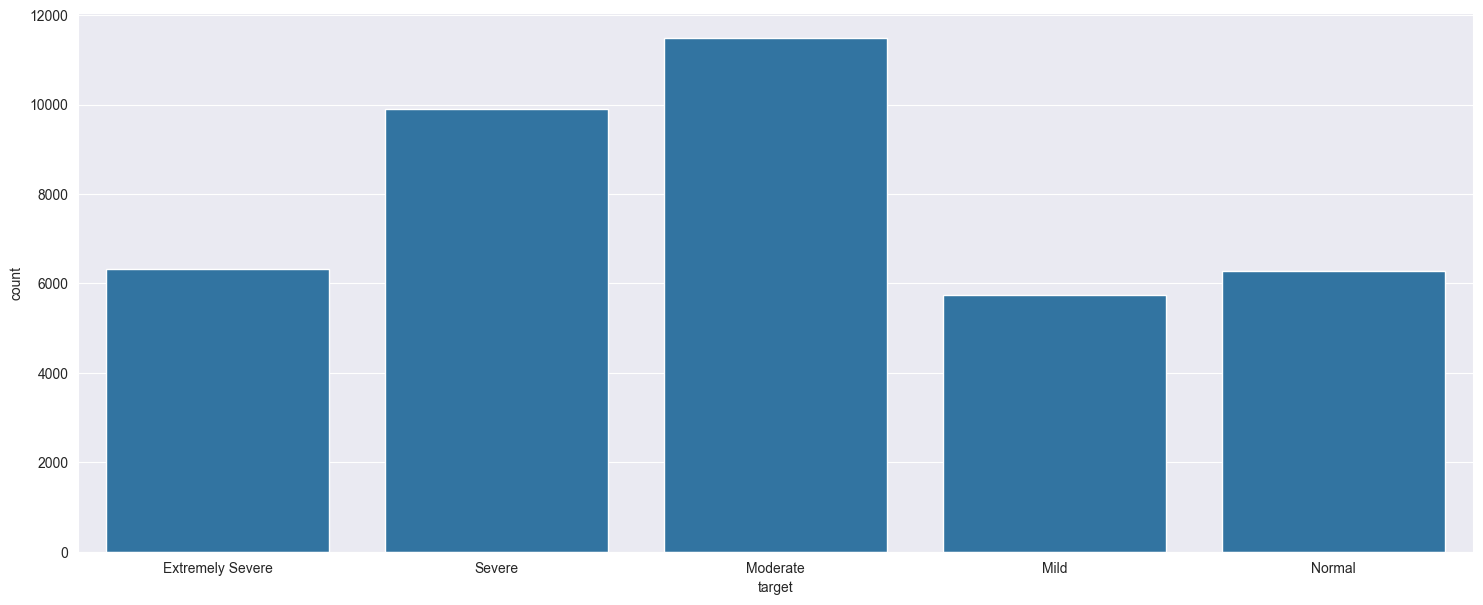

In [65]:
plt.figure(figsize=(18, 7))
sns.countplot(x=df['target'])

<h6>Data is Really Imbalanced right Now so Lets move 10 steps ahead</h6>

<Axes: xlabel='target', ylabel='count'>

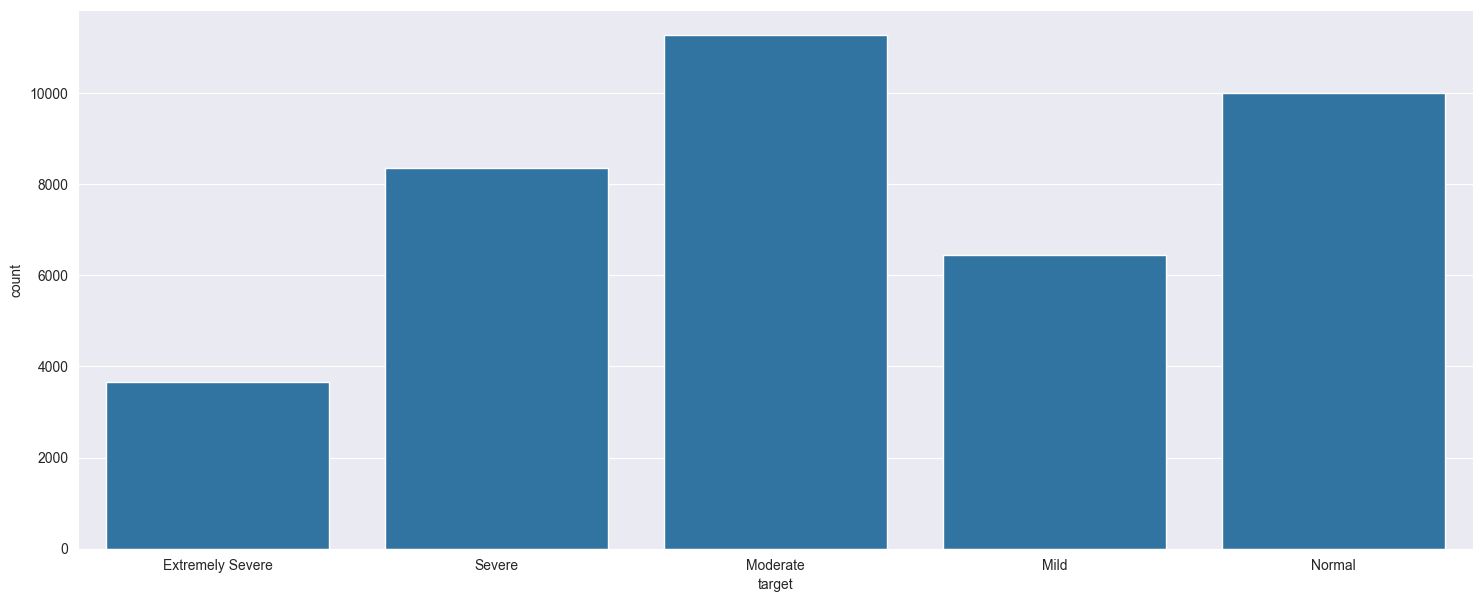

In [66]:
def buildTargetMove10Steps(value):
    if value <= 147:
        return 'Normal'
    if 147 < value <= 162:
        return 'Mild'
    if 162 < value <= 188:
        return 'Moderate'
    if 188 < value <= 214:
        return 'Severe'
    if value > 214:
        return 'Extremely Severe'


df['target'] = df['total_count'].apply(buildTargetMove10Steps)

plt.figure(figsize=(18, 7))
sns.countplot(x=df['target'])

<h5>Now the Data at least slightly Balanced than before and it will be much better</h5><hr>

<Axes: xlabel='education', ylabel='count'>

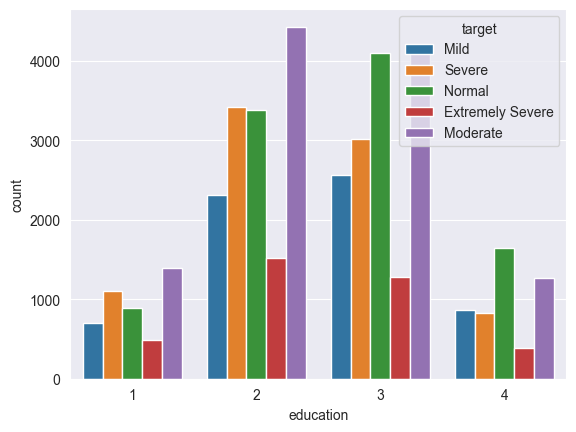

In [67]:
sns.countplot(data = df, x = df['education'], hue = df['target'])

<h6> So High School Students have moderate depression in significant amount and same goes for university students </h6>

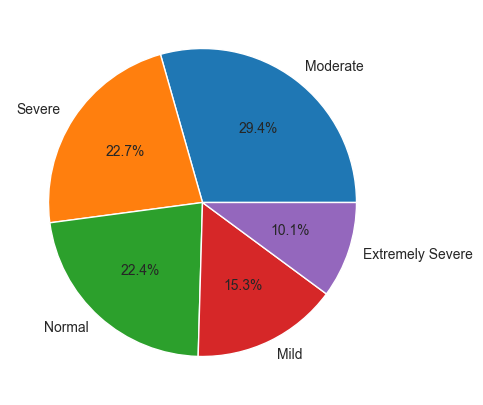

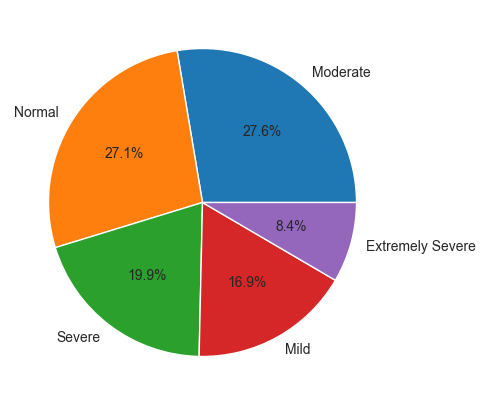

In [68]:
# A graph between High School and University Students  Categories and the Target
for i in range(2,4):
    plt.figure(figsize=(6, 5))
    lhd = df[df['education'] == i]['target'].value_counts(normalize = True)*100
    plt.pie(lhd, labels=lhd.index, autopct='%1.1f%%')

<Axes: xlabel='urban', ylabel='count'>

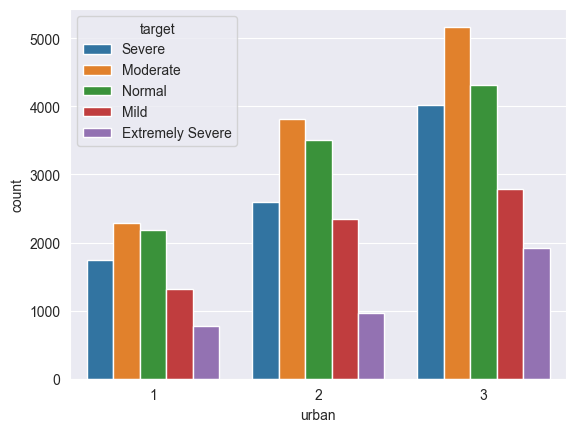

In [69]:
# A graph between Urban and Depression
sns.countplot(data = df, x = df['urban'], hue = df['target'])

<h6> Every Sector is balanced So lets take percentage of all </h6>

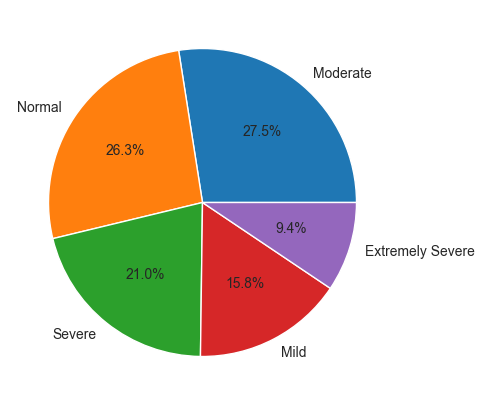

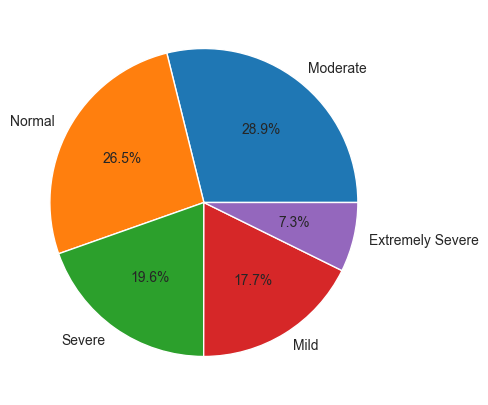

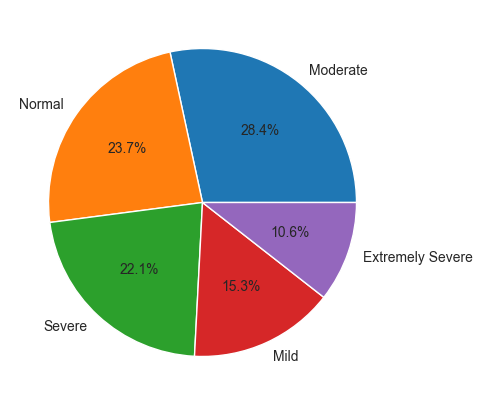

In [70]:
for i in range(1,4):
    plt.figure(figsize=(6, 5))
    lhd = df[df['urban'] == i]['target'].value_counts(normalize = True)*100
    plt.pie(lhd, labels=lhd.index, autopct='%1.1f%%')

<h6> The Urban area has more depression </h6>

<Axes: xlabel='gender', ylabel='count'>

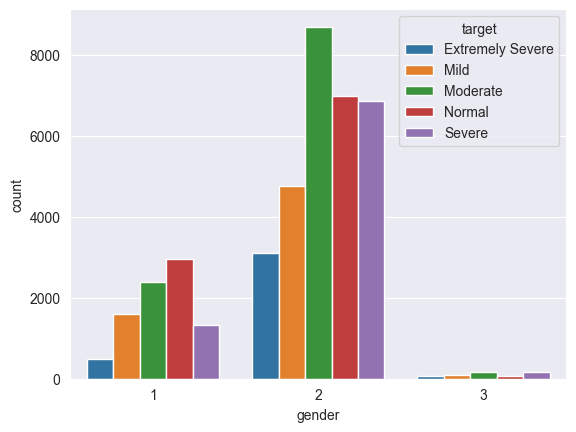

In [71]:
sns.countplot(data = df, x = df['gender'], hue = df['target'])

<h6> Just how the hell females are having more depression </h6>

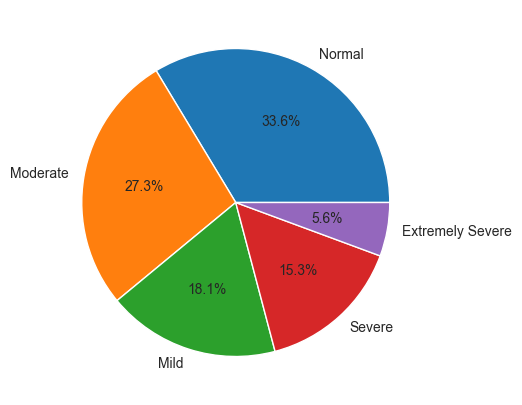

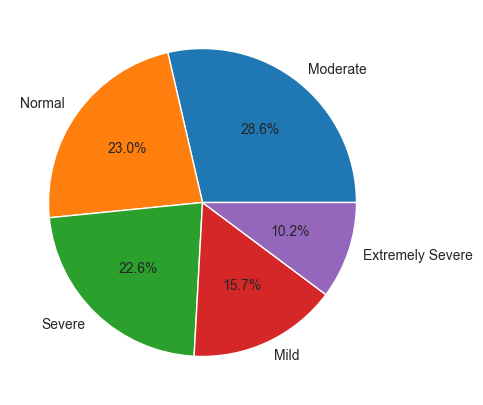

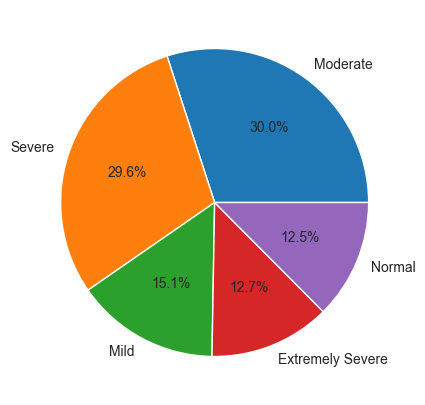

In [72]:
for i in range(1,4):
    plt.figure(figsize=(6, 5))
    lhd = df[df['gender'] == i]['target'].value_counts(normalize = True)*100
    plt.pie(lhd, labels=lhd.index, autopct='%1.1f%%')

<h6> No Comments that Females have more Extremely Severe Depression Others Crying in the Corner btw ):</h6>

<Axes: xlabel='religion', ylabel='count'>

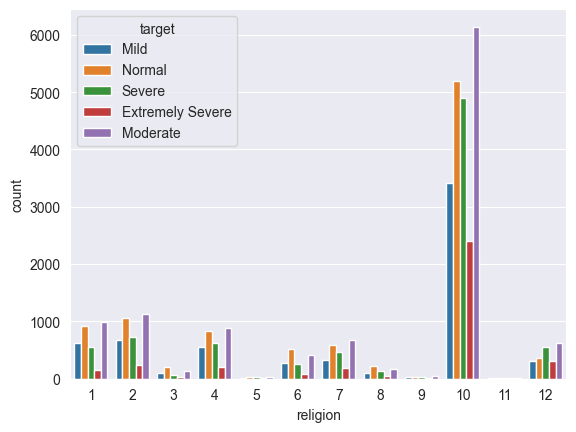

In [73]:
sns.countplot(data = df, x = df['religion'], hue = df['target'])

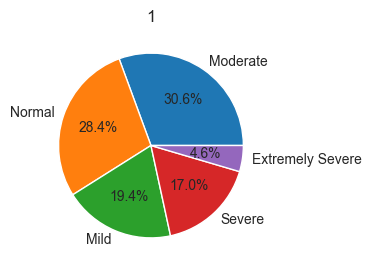

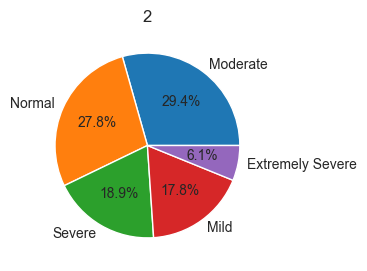

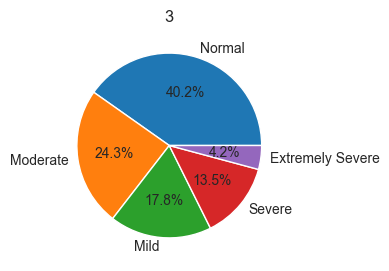

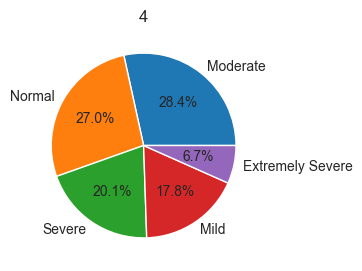

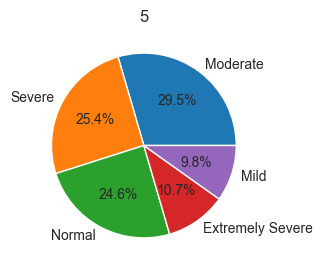

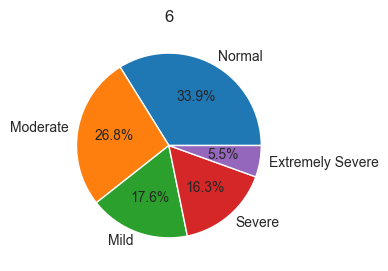

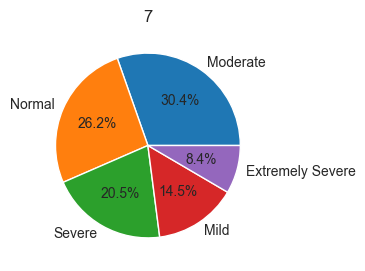

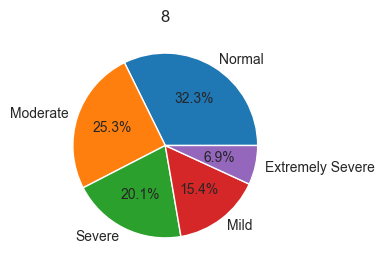

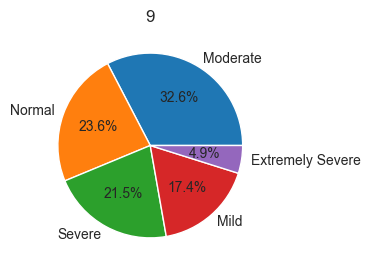

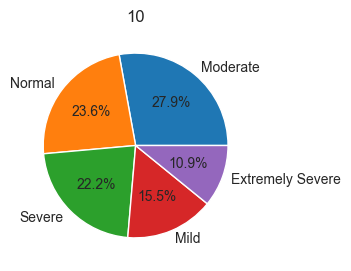

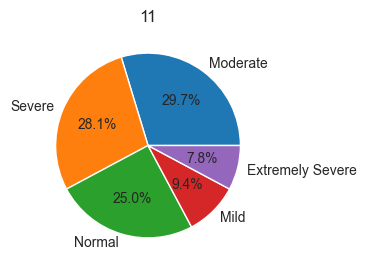

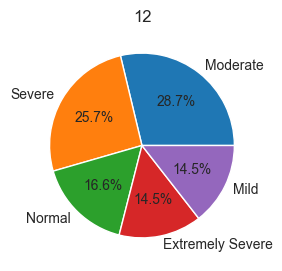

In [74]:
for i in range(1,13):
    plt.figure(figsize=(4, 3))
    plt.title(i)
    lhd = df[df['religion'] == i]['target'].value_counts(normalize = True)*100
    plt.pie(lhd, labels=lhd.index, autopct='%1.1f%%')

<h6> Chrisitan And muslims have more depression </h6>

<Axes: xlabel='race', ylabel='count'>

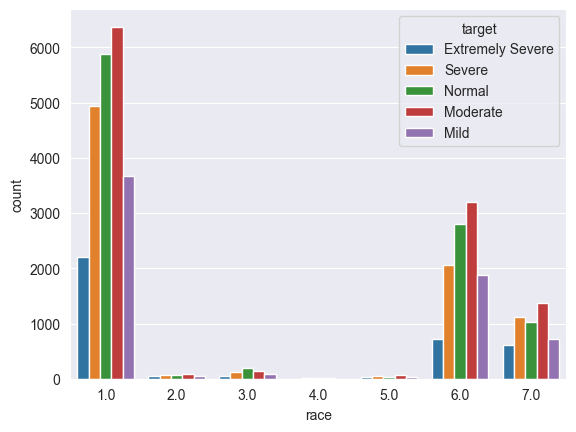

In [75]:
sns.countplot(data = df, x = df['race'], hue = df['target'])

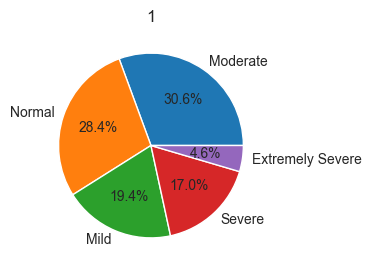

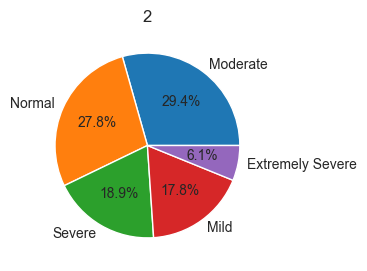

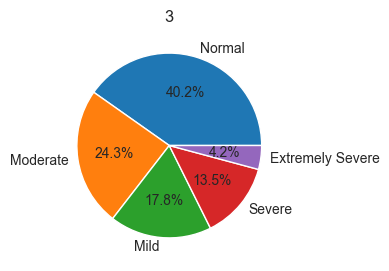

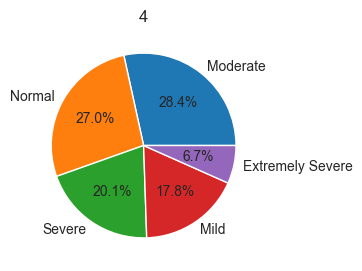

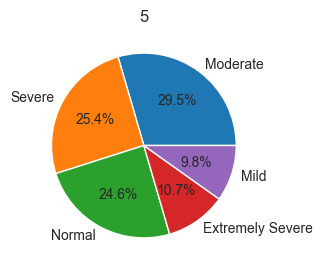

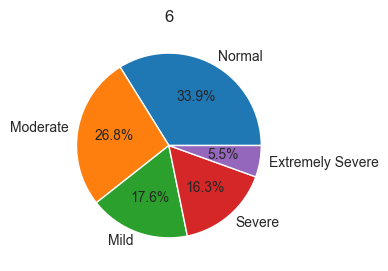

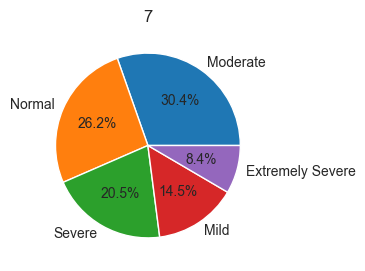

In [76]:
for i in range(1,8):
    plt.figure(figsize=(4, 3))
    plt.title(i)
    lhd = df[df['religion'] == i]['target'].value_counts(normalize = True)*100
    plt.pie(lhd, labels=lhd.index, autopct='%1.1f%%')

<h6> Native Americans and White people and Black People have more depression </h6>

<Axes: xlabel='TIPI1', ylabel='count'>

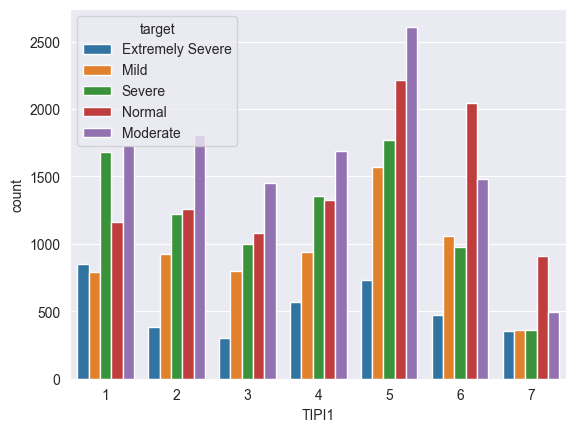

In [77]:
sns.countplot(data = df, x = df['TIPI1'], hue = df['target'])

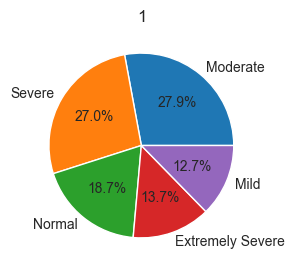

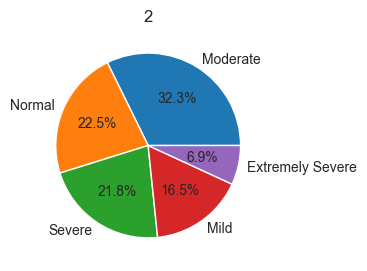

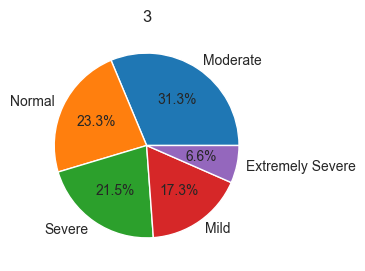

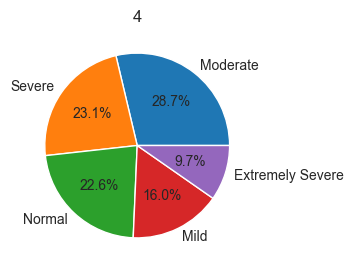

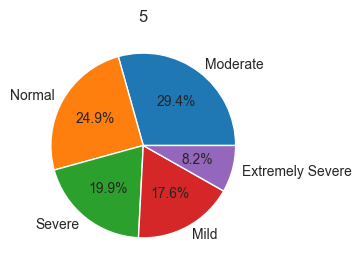

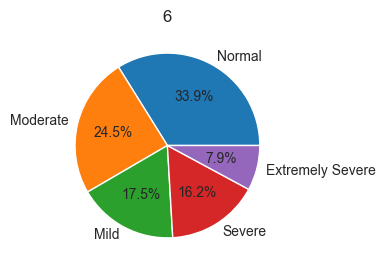

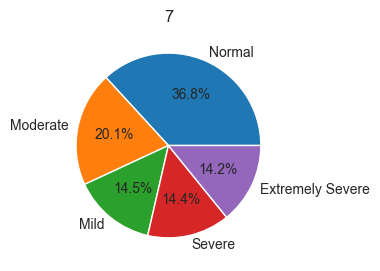

In [78]:
for i in range(1,8):
    plt.figure(figsize=(4, 3))
    plt.title(i)
    lhd = df[df['TIPI1'] == i]['target'].value_counts(normalize = True)*100
    plt.pie(lhd, labels=lhd.index, autopct='%1.1f%%')

<h6> People who Disagre Strongly or who Agree Strongly on being Extraverted having more depression </h6>

<Axes: xlabel='TIPI2', ylabel='count'>

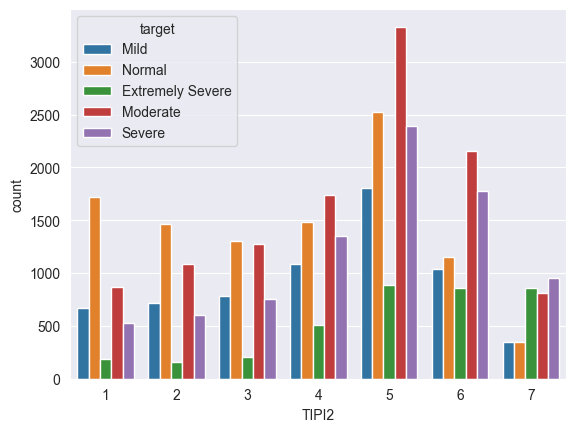

In [79]:
sns.countplot(data = df, x = df['TIPI2'], hue = df['target'])

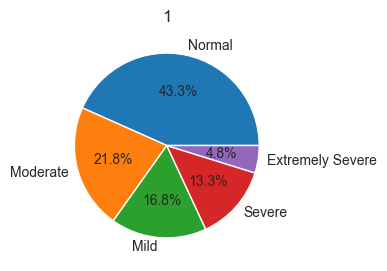

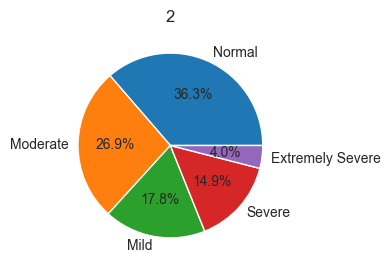

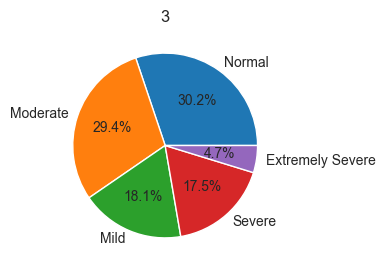

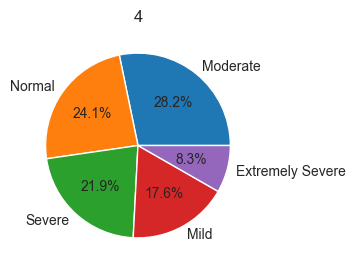

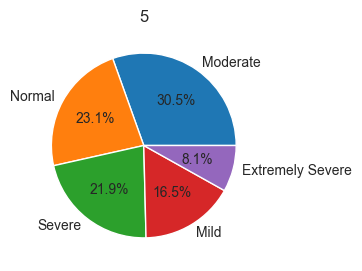

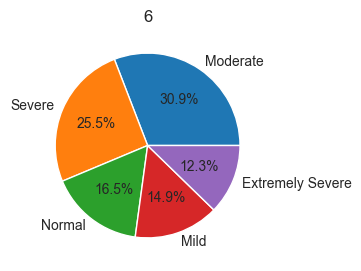

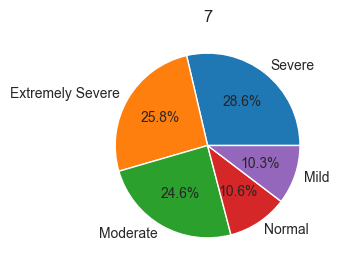

In [80]:
for i in range(1,8):
    plt.figure(figsize=(4, 3))
    plt.title(i)
    lhd = df[df['TIPI2'] == i]['target'].value_counts(normalize = True)*100
    plt.pie(lhd, labels=lhd.index, autopct='%1.1f%%')

<h6> So Who Agree Moderately or Strongly on being Critical or quarrelsome have more depression </h6>

<Axes: xlabel='TIPI3', ylabel='count'>

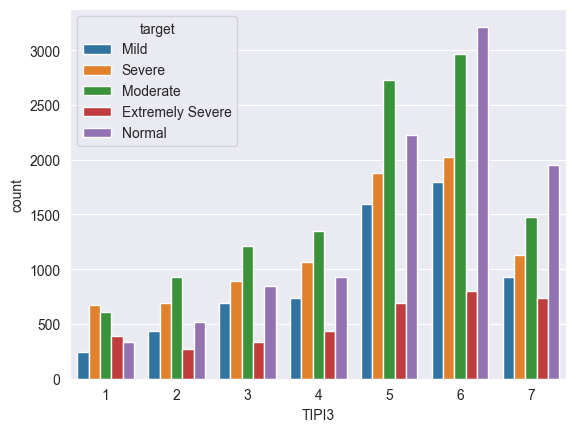

In [81]:
sns.countplot(data = df, x = df['TIPI3'], hue = df['target'])

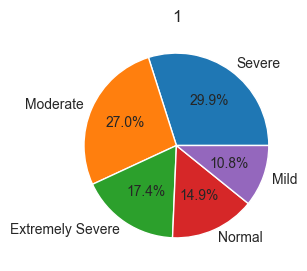

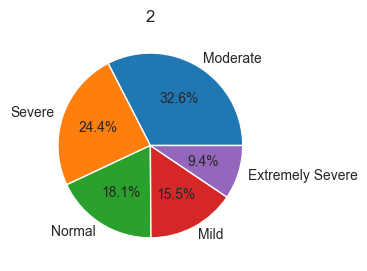

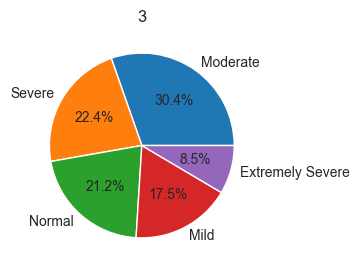

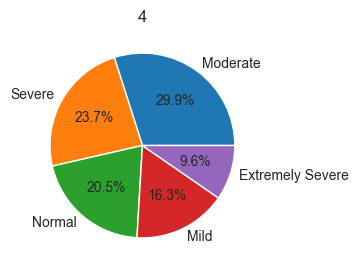

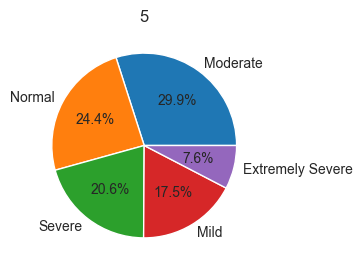

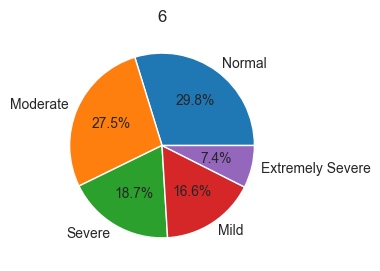

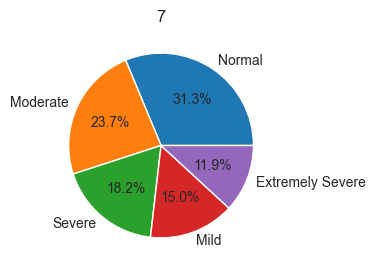

In [82]:
for i in range(1,8):
    plt.figure(figsize=(4, 3))
    plt.title(i)
    lhd = df[df['TIPI3'] == i]['target'].value_counts(normalize = True)*100
    plt.pie(lhd, labels=lhd.index, autopct='%1.1f%%')

<h6> People who disagree on being Dependable and self disciplined have more depression </h6>

<Axes: xlabel='TIPI4', ylabel='count'>

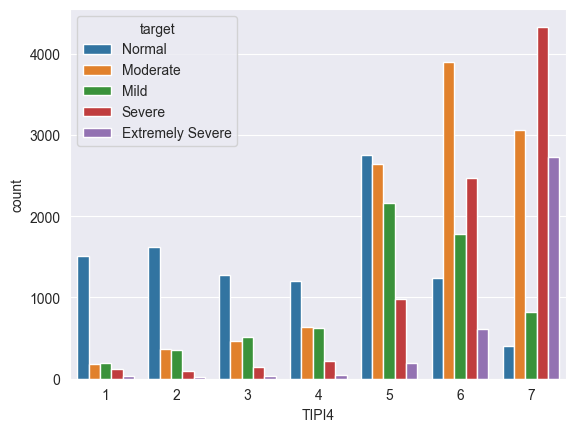

In [83]:
sns.countplot(data = df, x = df['TIPI4'], hue = df['target'])

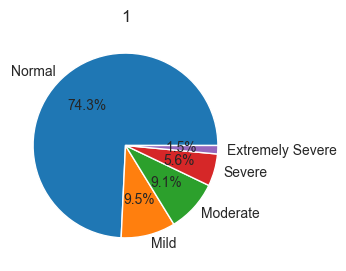

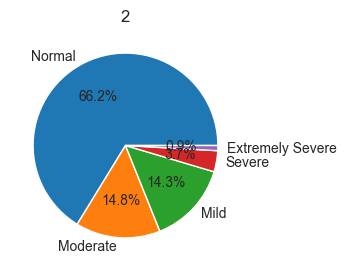

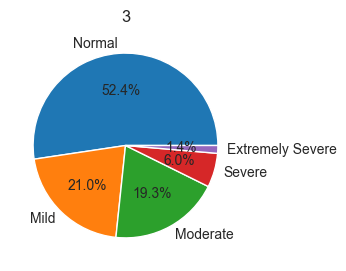

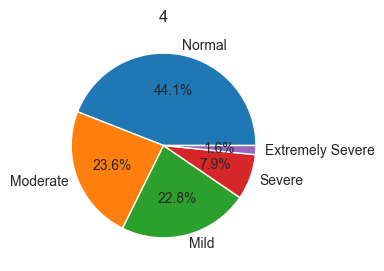

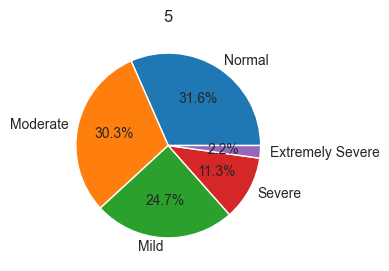

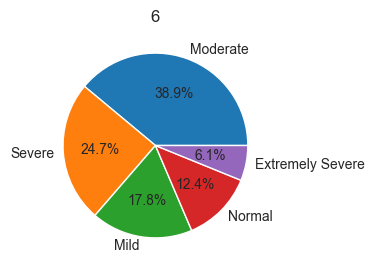

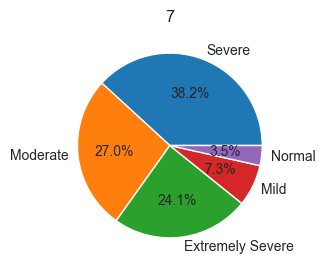

In [84]:
for i in range(1,8):
    plt.figure(figsize=(4, 3))
    plt.title(i)
    lhd = df[df['TIPI4'] == i]['target'].value_counts(normalize = True)*100
    plt.pie(lhd, labels=lhd.index, autopct='%1.1f%%')

<h6> People who agree moderately or strongly on being Anxious and easily upset have more depression </h6>

<Axes: xlabel='TIPI5', ylabel='count'>

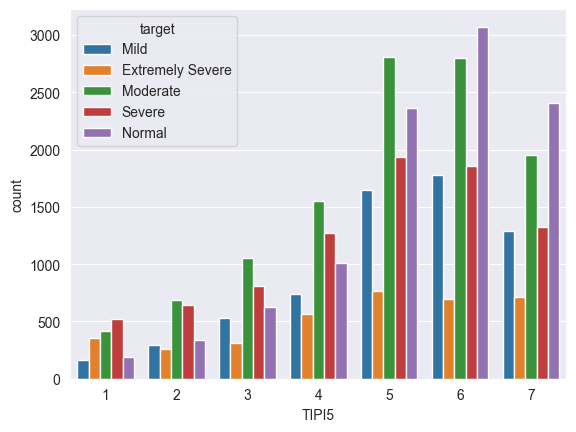

In [85]:
sns.countplot(data = df, x = df['TIPI5'], hue = df['target'])

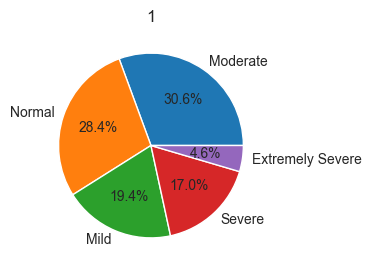

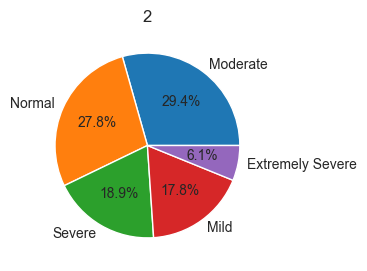

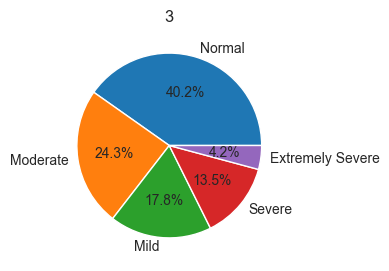

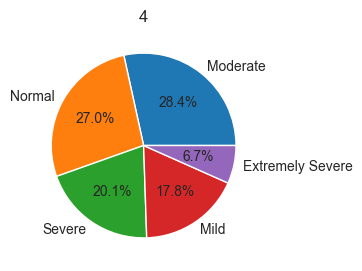

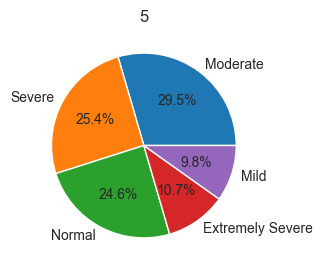

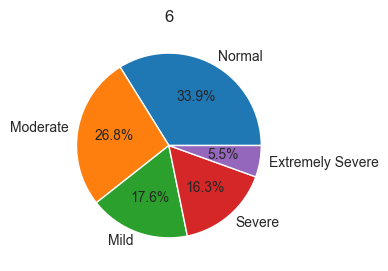

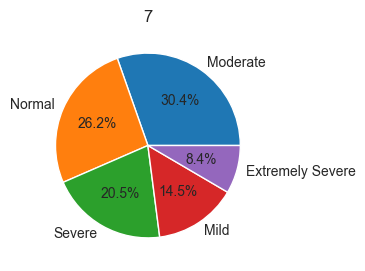

In [86]:
for i in range(1,8):
    plt.figure(figsize=(4, 3))
    plt.title(i)
    lhd = df[df['religion'] == i]['target'].value_counts(normalize = True)*100
    plt.pie(lhd, labels=lhd.index, autopct='%1.1f%%')

<h6> People who disagree stronly or moderately on being open to new experiences have more depression </h6>

<Axes: xlabel='TIPI6', ylabel='count'>

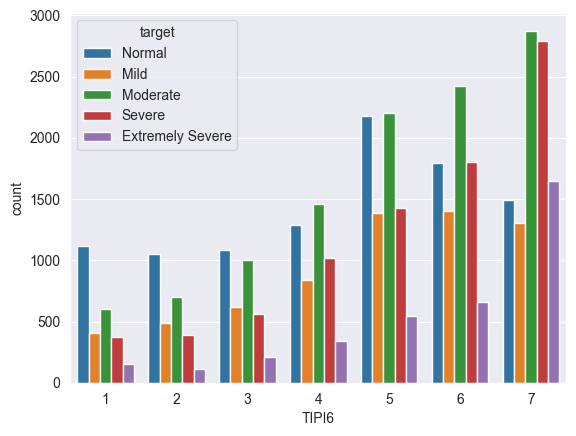

In [87]:
sns.countplot(data = df, x = df['TIPI6'], hue = df['target'])

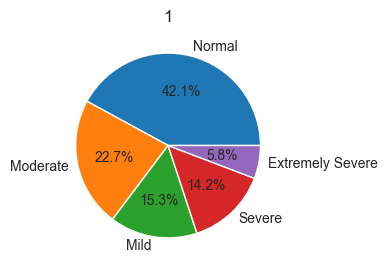

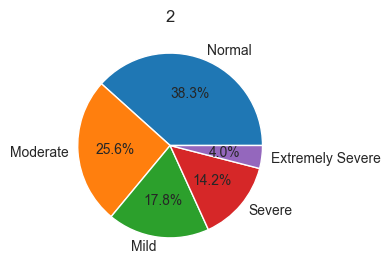

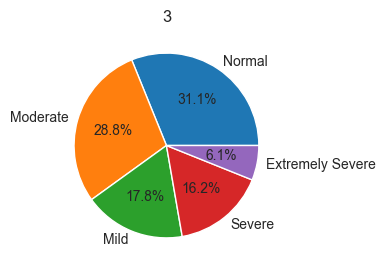

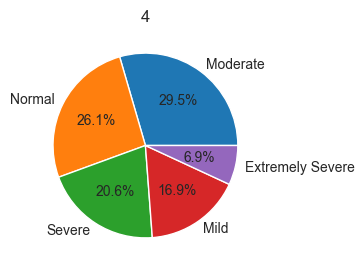

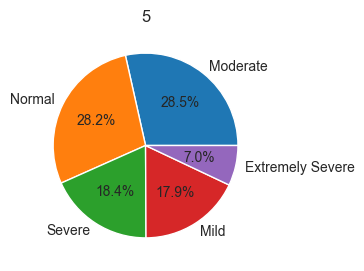

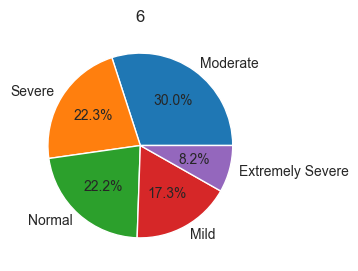

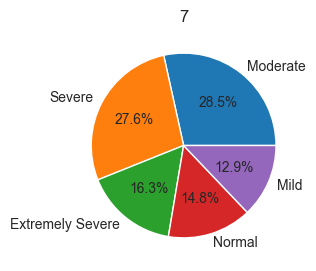

In [88]:
for i in range(1,8):
    plt.figure(figsize=(4, 3))
    plt.title(i)
    lhd = df[df['TIPI6'] == i]['target'].value_counts(normalize = True)*100
    plt.pie(lhd, labels=lhd.index, autopct='%1.1f%%')

<h6> People who agree strongely or moderately on being Reserved have more depression </h6>

<Axes: xlabel='race', ylabel='count'>

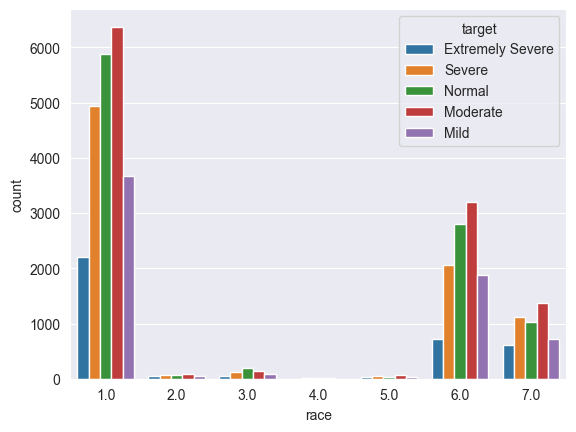

In [89]:
sns.countplot(data = df, x = df['race'], hue = df['target'])

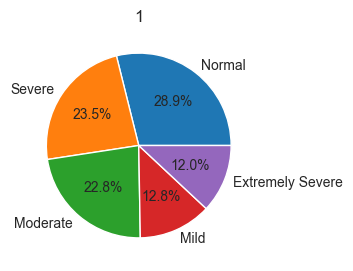

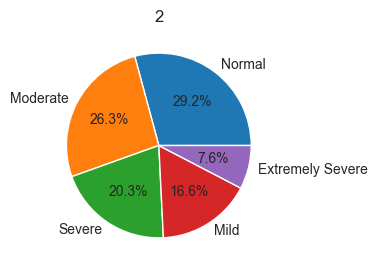

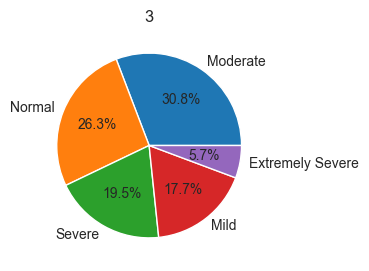

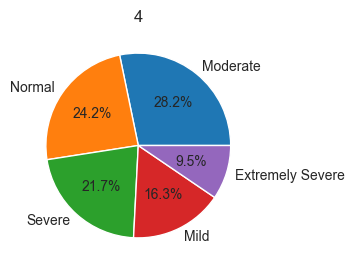

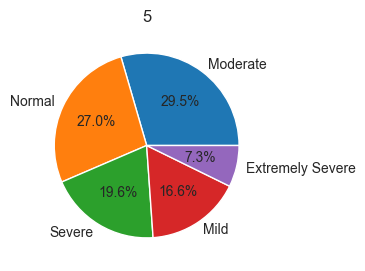

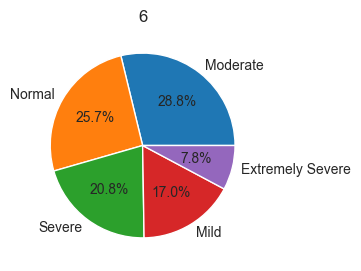

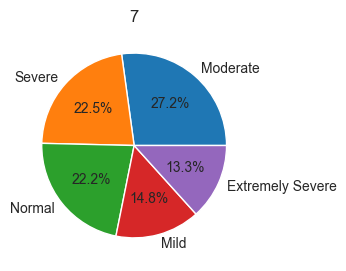

In [90]:
for i in range(1,8):
    plt.figure(figsize=(4, 3))
    plt.title(i)
    lhd = df[df['TIPI7'] == i]['target'].value_counts(normalize = True)*100
    plt.pie(lhd, labels=lhd.index, autopct='%1.1f%%')

<h6> People who disagree strongely on being sympathetic and warm have more depression </h6>

<Axes: xlabel='TIPI8', ylabel='count'>

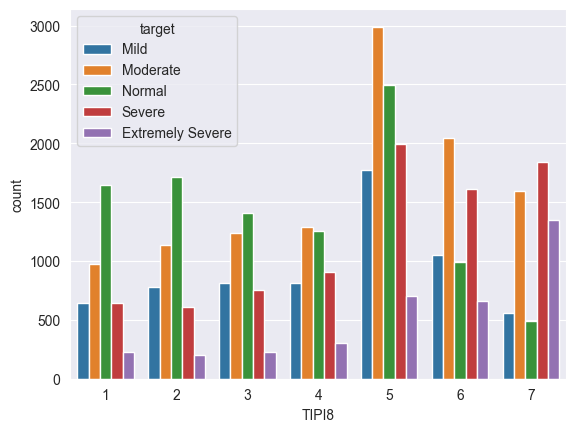

In [91]:
sns.countplot(data = df, x = df['TIPI8'], hue = df['target'])

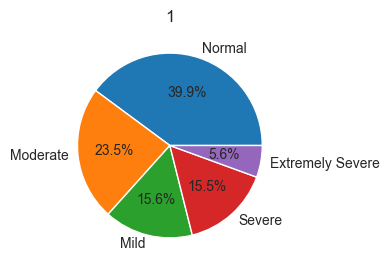

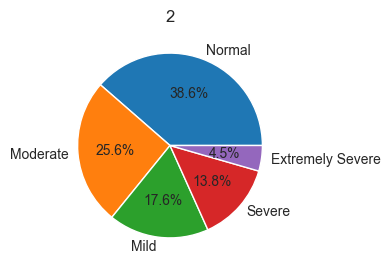

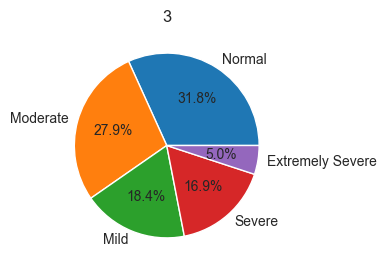

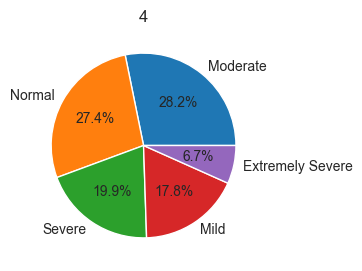

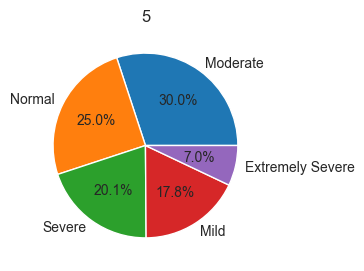

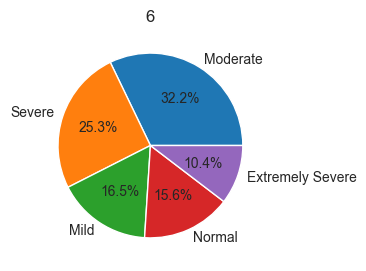

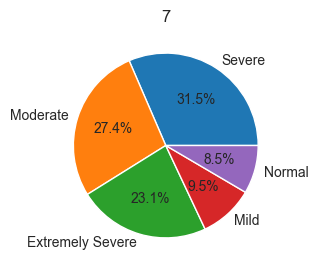

In [92]:
for i in range(1,8):
    plt.figure(figsize=(4, 3))
    plt.title(i)
    lhd = df[df['TIPI8'] == i]['target'].value_counts(normalize = True)*100
    plt.pie(lhd, labels=lhd.index, autopct='%1.1f%%')

<h6> People who agree strongly or moderately have more depression </h6>

<Axes: xlabel='TIPI9', ylabel='count'>

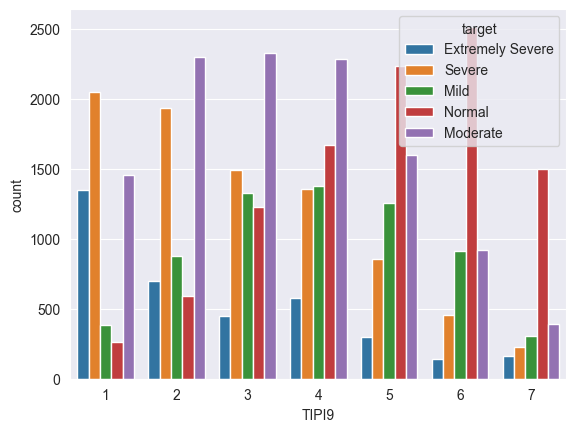

In [93]:
sns.countplot(data = df, x = df['TIPI9'], hue = df['target'])

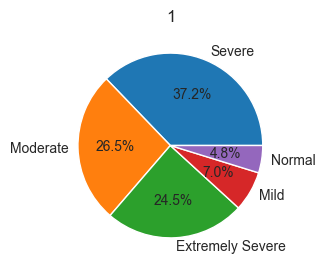

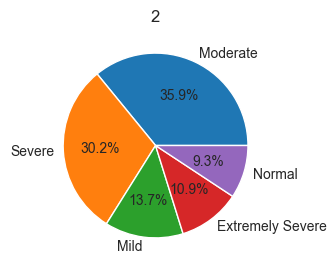

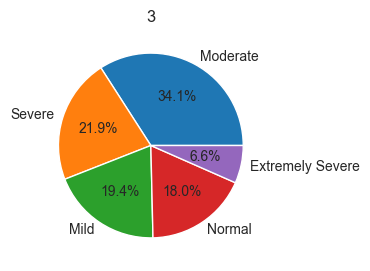

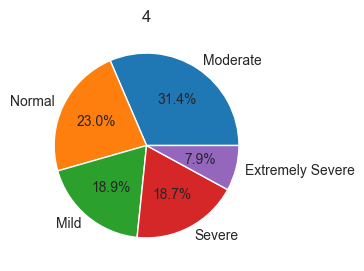

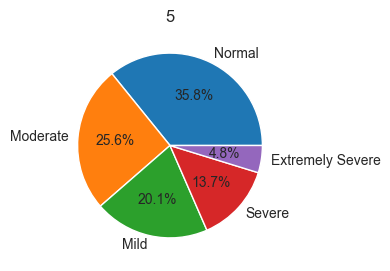

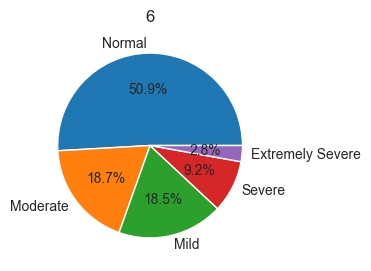

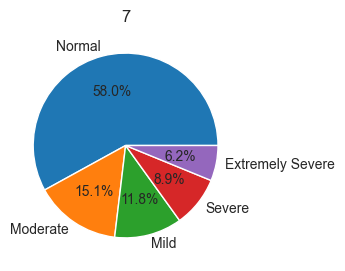

In [94]:
for i in range(1,8):
    plt.figure(figsize=(4, 3))
    plt.title(i)
    lhd = df[df['TIPI9'] == i]['target'].value_counts(normalize = True)*100
    plt.pie(lhd, labels=lhd.index, autopct='%1.1f%%')

<h6> People who disagree strongely or moderately on being calm and emotionally stable have more depression </h6>

<Axes: xlabel='TIPI10', ylabel='count'>

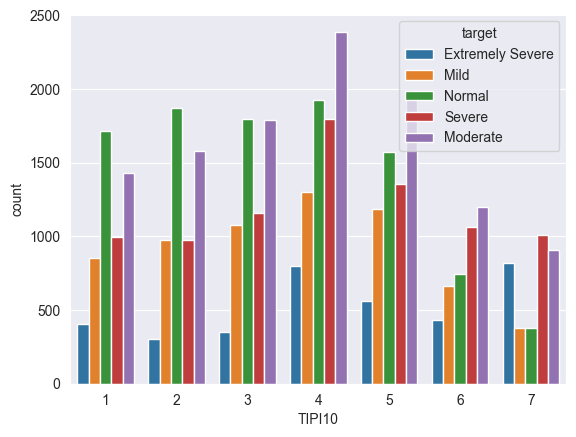

In [95]:
sns.countplot(data = df, x = df['TIPI10'], hue = df['target'])

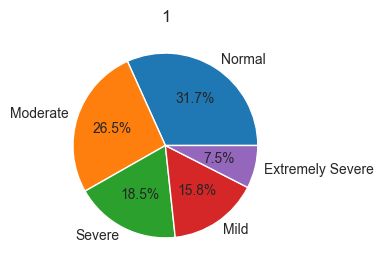

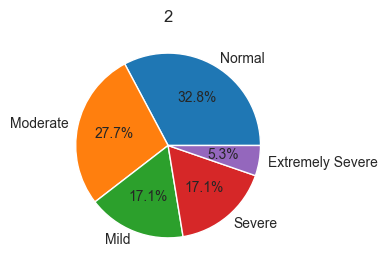

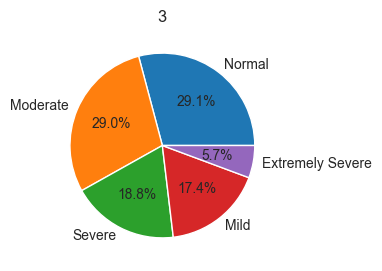

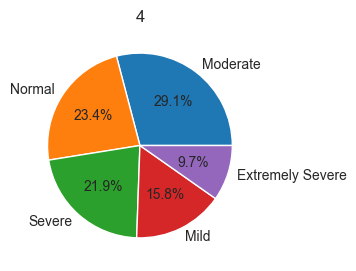

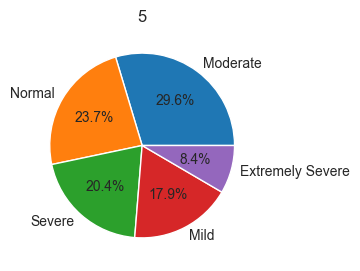

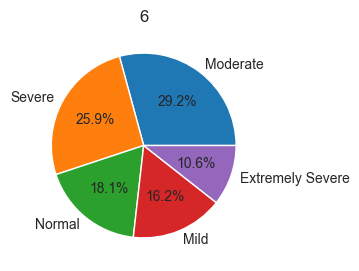

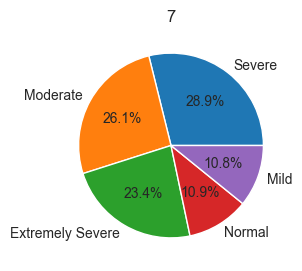

In [96]:
for i in range(1,8):
    plt.figure(figsize=(4, 3))
    plt.title(i)
    lhd = df[df['TIPI10'] == i]['target'].value_counts(normalize = True)*100
    plt.pie(lhd, labels=lhd.index, autopct='%1.1f%%')

<h6> People who agree strongly or moderately on being uncreative have more depression </h6>

<Axes: xlabel='familysize', ylabel='count'>

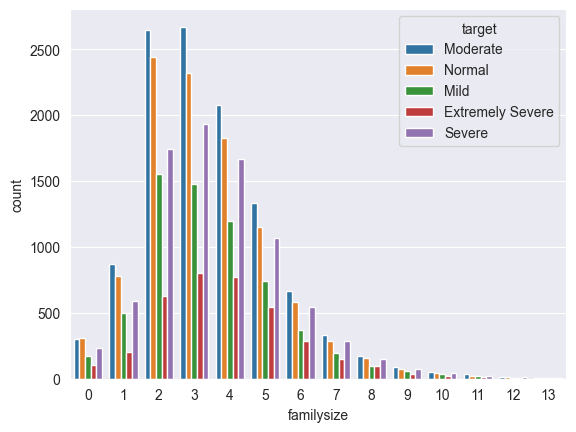

In [97]:
sns.countplot(data = df, x = df['familysize'], hue = df['target'])

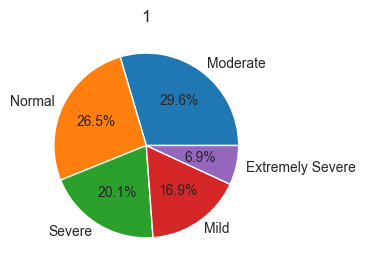

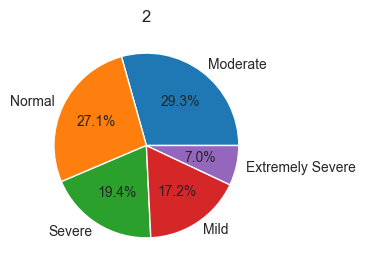

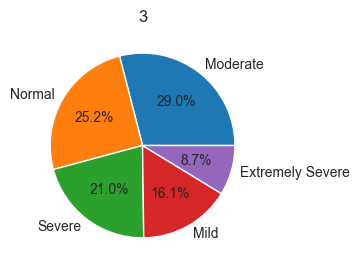

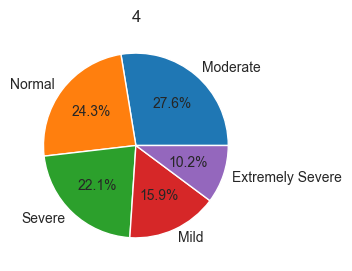

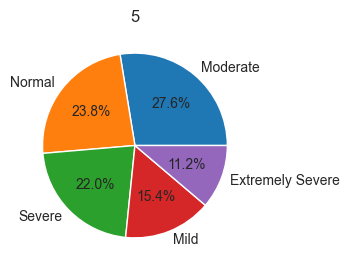

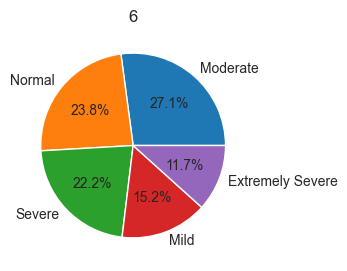

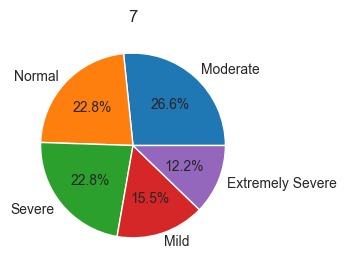

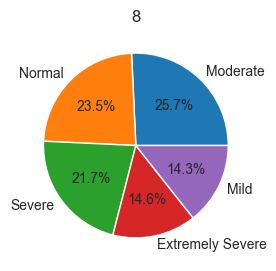

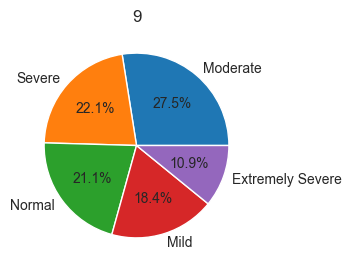

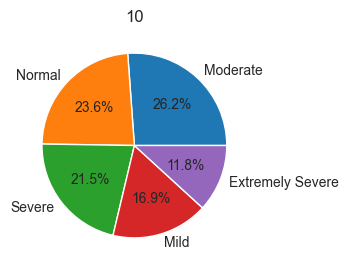

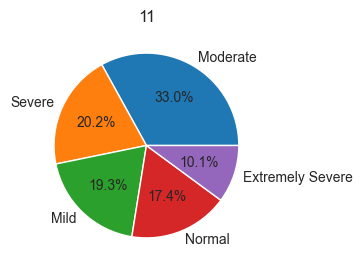

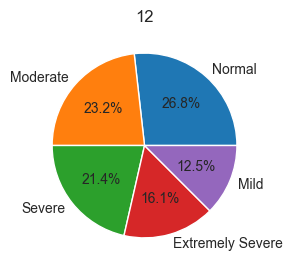

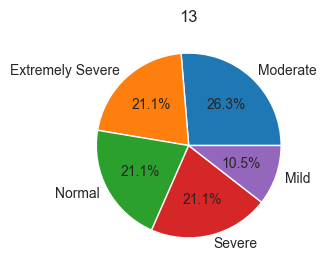

In [98]:
for i in range(1,14):
    plt.figure(figsize=(4, 3))
    plt.title(i)
    lhd = df[df['familysize'] == i]['target'].value_counts(normalize = True)*100
    plt.pie(lhd, labels=lhd.index, autopct='%1.1f%%')

<h6> People above famliy size 5 have incerasing criteria of depression</h6>

<Axes: xlabel='married', ylabel='count'>

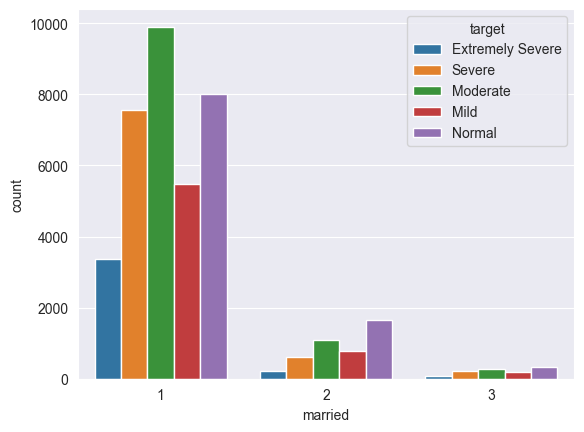

In [99]:
sns.countplot(data = df, x = df['married'], hue = df['target'])

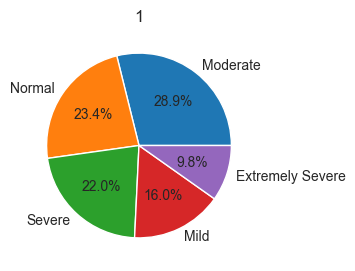

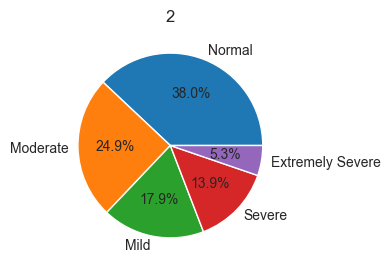

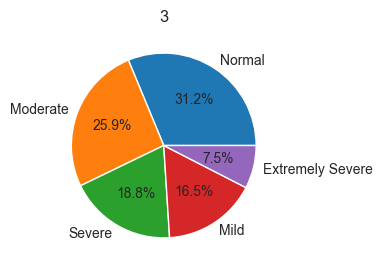

In [100]:
for i in range(1,4):
    plt.figure(figsize=(4, 3))
    plt.title(i)
    lhd = df[df['married'] == i]['target'].value_counts(normalize = True)*100
    plt.pie(lhd, labels=lhd.index, autopct='%1.1f%%')

<h6> Single people and divorced people have more depression </h6>

# So Here our EDA ends 

In [101]:
df.head()

Q1A  Q2A  Q3A  Q4A  Q5A  Q6A  Q7A  Q8A  Q9A  Q10A  ...  education  urban  \
0    4    4    2    4    4    4    4    4    2     1  ...          2      3   
1    4    1    2    3    4    4    3    4    3     2  ...          2      3   
2    3    1    4    1    4    3    1    3    2     4  ...          2      3   
3    2    3    2    1    3    3    4    2    3     3  ...          1      3   
4    2    2    3    4    4    2    4    4    4     3  ...          3      2   

   gender  religion  race  married  familysize  age_group  total_count  \
0       2        12   1.0        1           2          2        216.0   
1       2         7   7.0        1           4          2        189.0   
2       2         4   6.0        1           3          3        171.0   
3       2         4   7.0        1           5          2        153.0   
4       2        10   1.0        1           4          3        212.0   

             target  
0  Extremely Severe  
1            Severe  
2          Moderate  
3              Mild  
4            Severe  

[5 rows x 62 columns]

In [102]:
df.shape

(39733, 62)

In [103]:
df.columns

Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'TIPI1', 'TIPI2', 'TIPI3',
       'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10',
       'education', 'urban', 'gender', 'religion', 'race', 'married',
       'familysize', 'age_group', 'total_count', 'target'],
      dtype='object')

In [104]:
df.to_csv("final_data.csv")

<h1>Now Let's Move to the Next Part</h1>
<h2>Model Building</h2>

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [106]:
df.head()

Q1A  Q2A  Q3A  Q4A  Q5A  Q6A  Q7A  Q8A  Q9A  Q10A  ...  education  urban  \
0    4    4    2    4    4    4    4    4    2     1  ...          2      3   
1    4    1    2    3    4    4    3    4    3     2  ...          2      3   
2    3    1    4    1    4    3    1    3    2     4  ...          2      3   
3    2    3    2    1    3    3    4    2    3     3  ...          1      3   
4    2    2    3    4    4    2    4    4    4     3  ...          3      2   

   gender  religion  race  married  familysize  age_group  total_count  \
0       2        12   1.0        1           2          2        216.0   
1       2         7   7.0        1           4          2        189.0   
2       2         4   6.0        1           3          3        171.0   
3       2         4   7.0        1           5          2        153.0   
4       2        10   1.0        1           4          3        212.0   

             target  
0  Extremely Severe  
1            Severe  
2          Moderate  
3              Mild  
4            Severe  

[5 rows x 62 columns]

In [107]:
df.columns

Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'TIPI1', 'TIPI2', 'TIPI3',
       'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10',
       'education', 'urban', 'gender', 'religion', 'race', 'married',
       'familysize', 'age_group', 'total_count', 'target'],
      dtype='object')

In [108]:
X = df.drop(['target', 'total_count'], axis=1)
y = df['target']

In [109]:
df.shape

(39733, 62)

In [110]:
df.sample()

Q1A  Q2A  Q3A  Q4A  Q5A  Q6A  Q7A  Q8A  Q9A  Q10A  ...  education  \
39009    1    1    1    1    1    1    1    1    1     1  ...          4   

       urban  gender  religion  race  married  familysize  age_group  \
39009      2       2        10   1.0        2           3          5   

       total_count  target  
39009         88.0  Normal  

[1 rows x 62 columns]

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [112]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [113]:
def buildModel(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
    print(f'Classification Report: \n{classification_report(y_test, y_pred)}')
    print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')


In [114]:
svc = SVC()
buildModel(svc)

Accuracy Score: 0.973071599345665
Classification Report: 
                  precision    recall  f1-score   support

Extremely Severe       0.99      0.97      0.98       738
            Mild       0.95      0.95      0.95      1248
        Moderate       0.96      0.97      0.97      2282
          Normal       0.99      0.99      0.99      1980
          Severe       0.97      0.97      0.97      1699

        accuracy                           0.97      7947
       macro avg       0.97      0.97      0.97      7947
    weighted avg       0.97      0.97      0.97      7947

Confusion Matrix: 
[[ 718    0    0    0   20]
 [   0 1191   40   17    0]
 [   0   35 2223    0   24]
 [   0   29    0 1951    0]
 [   7    0   42    0 1650]]


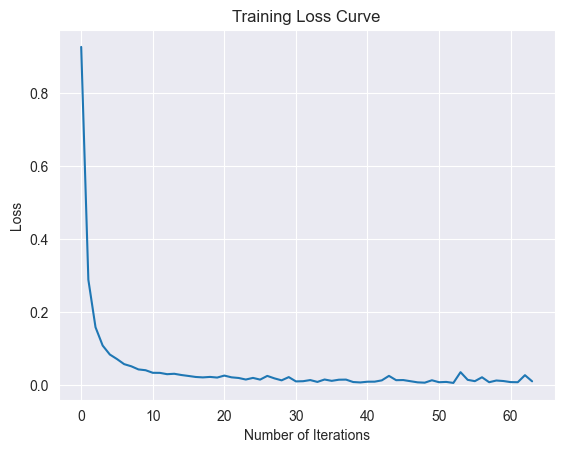

In [115]:
def buildModel(mlp):
    mlp.fit(X_train, y_train)

    plt.plot(mlp.loss_curve_)
    plt.title('Training Loss Curve')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Loss')
    plt.show()

mlp = MLPClassifier(hidden_layer_sizes=(10,20,30,20,10), max_iter=1000)
buildModel(mlp)

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'penalty': ['l1', 'l2', 'elasticnet', 'none']
}

grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
buildModel(grid.best_estimator_)

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits
[CV 1/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, multi_class=auto,

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l1, solver=saga;, score=0.987 total time=   5.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l1, solver=saga;, score=0.989 total time=   5.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l1, solver=saga;, score=0.989 total time=   5.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l1, solver=saga;, score=0.988 total time=   5.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l1, solver=saga;, score=0.987 total time=   5.7s
[CV 1/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.984 total time=   0.7s
[CV 2/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.986 total time=   0.7s
[CV 3/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.985 total time=   0.7s
[CV 4/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.984 total time=   0.7s
[CV 5/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.983 total time=   0.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.984 total time=   0.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.987 total time=   0.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.985 total time=   0.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.983 total time=   0.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.984 total time=   0.5s
[CV 1/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear;, score=0.773 total time=   1.7s
[CV 2/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear;, score=0.777 total time=   1.7s
[CV 3/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear;, score=0.774 total time=   1.8s
[CV 4/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear;, score=0.770 total time=   1.8s
[CV 5/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear;, score=0.773 total time=   1.7s
[CV 1/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l2, solver=sag;, score=0.984 total time=   1.3s
[CV 2/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l2, solver=sag;, score=0.986 total time=   1.3s
[CV 3/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l2, solver=sag;, score=0.985 total time=   1

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l2, solver=saga;, score=0.984 total time=   3.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l2, solver=saga;, score=0.986 total time=   3.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l2, solver=saga;, score=0.985 total time=   3.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l2, solver=saga;, score=0.984 total time=   3.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=100, multi_class=auto, penalty=l2, solver=saga;, score=0.983 total time=   3.6s
[CV 1/5] END C=0.1, max_iter=100, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, multi_class=auto, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, multi_class=auto, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, multi_class=auto, penalty

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=l1, solver=saga;, score=0.792 total time=   5.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=l1, solver=saga;, score=0.794 total time=   5.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=l1, solver=saga;, score=0.794 total time=   5.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=l1, solver=saga;, score=0.790 total time=   5.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=l1, solver=saga;, score=0.792 total time=   5.2s
[CV 1/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.792 total time=   0.5s
[CV 2/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.5s
[CV 3/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.794 total time=   0.6s
[CV 4/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.790 total time=   0.6s
[CV 5/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.793 total time=   0.6s
[CV 1/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.792 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.796 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.793 total time=   0.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=l2, solver=sag;, score=0.792 total time=   3.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=l2, solver=sag;, score=0.796 total time=   3.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=l2, solver=sag;, score=0.793 total time=   3.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=l2, solver=sag;, score=0.790 total time=   3.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=l2, solver=sag;, score=0.793 total time=   3.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=l2, solver=saga;, score=0.792 total time=   4.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=l2, solver=saga;, score=0.796 total time=   4.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=l2, solver=saga;, score=0.793 total time=   4.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=l2, solver=saga;, score=0.789 total time=   5.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=l2, solver=saga;, score=0.793 total time=   4.3s
[CV 1/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, multi_class=ovr, penalty=elasticn

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=l1, solver=saga;, score=0.987 total time=   5.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=l1, solver=saga;, score=0.989 total time=   5.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=l1, solver=saga;, score=0.989 total time=   5.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=l1, solver=saga;, score=0.988 total time=   5.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=l1, solver=saga;, score=0.987 total time=   5.6s
[CV 1/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.984 total time=   0.6s
[CV 2/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.986 total time=   0.7s
[CV 3/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.985 total time=   0.7s
[CV 4/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.984 total time=   0.6s
[CV 5/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.983 total time=   0.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.984 total time=   0.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.987 total time=   0.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.985 total time=   0.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.983 total time=   0.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.984 total time=   0.5s
[CV 1/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=l2, solver=sag;, score=0.984 total time=   1.0s
[CV 2/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=l2, solver=sag;, score=0.986 total time=   1.3s
[CV 3/5] END C=0.1, max_iter=100, multi_class=multinomial,

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=l2, solver=saga;, score=0.984 total time=   3.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=l2, solver=saga;, score=0.986 total time=   3.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=l2, solver=saga;, score=0.985 total time=   3.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=l2, solver=saga;, score=0.984 total time=   3.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=l2, solver=saga;, score=0.983 total time=   3.6s
[CV 1/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, multi_class=multinomial, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.1, max_iter=200, multi_class=ovr, penalty=l1, solver=saga;, score=0.792 total time=   7.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=200, multi_class=ovr, penalty=l1, solver=saga;, score=0.794 total time=   8.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.1, max_iter=200, multi_class=ovr, penalty=l1, solver=saga;, score=0.794 total time=   7.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.1, max_iter=200, multi_class=ovr, penalty=l1, solver=saga;, score=0.790 total time=   8.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=200, multi_class=ovr, penalty=l1, solver=saga;, score=0.792 total time=   7.9s
[CV 1/5] END C=0.1, max_iter=200, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.792 total time=   0.5s
[CV 2/5] END C=0.1, max_iter=200, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.6s
[CV 3/5] END C=0.1, max_iter=200, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.794 total time=   0.5s
[CV 4/5] END C=0.1, max_iter=200, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.790 total time=   0.5s
[CV 5/5] END C=0.1, max_iter=200, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.793 total time=   0.6s
[CV 1/5] END C=0.1, max_iter=200, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.792 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=200, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.796 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=200, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.793 total time=   0.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.1, max_iter=200, multi_class=ovr, penalty=l2, solver=saga;, score=0.792 total time=   6.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=200, multi_class=ovr, penalty=l2, solver=saga;, score=0.796 total time=   6.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.1, max_iter=200, multi_class=ovr, penalty=l2, solver=saga;, score=0.793 total time=   6.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.1, max_iter=200, multi_class=ovr, penalty=l2, solver=saga;, score=0.790 total time=   6.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=200, multi_class=ovr, penalty=l2, solver=saga;, score=0.793 total time=   6.1s
[CV 1/5] END C=0.1, max_iter=200, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=200, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, multi_class=ovr, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, multi_class=ovr, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, multi_class=ovr, penalty=elasticn

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=100, multi_class=auto, penalty=l1, solver=saga;, score=0.996 total time=   5.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=100, multi_class=auto, penalty=l1, solver=saga;, score=0.998 total time=   5.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=100, multi_class=auto, penalty=l1, solver=saga;, score=0.997 total time=   5.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=100, multi_class=auto, penalty=l1, solver=saga;, score=0.997 total time=   5.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=100, multi_class=auto, penalty=l1, solver=saga;, score=0.996 total time=   5.8s
[CV 1/5] END C=1, max_iter=100, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.996 total time=   0.9s
[CV 2/5] END C=1, max_iter=100, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.997 total time=   0.7s
[CV 3/5] END C=1, max_iter=100, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.996 total time=   0.9s
[CV 4/5] END C=1, max_iter=100, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.997 total time=   1.0s
[CV 5/5] END C=1, max_iter=100, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.996 total time=   1.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=1, max_iter=100, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.997 total time=   0.5s
[CV 2/5] END C=1, max_iter=100, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.998 total time=   0.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=1, max_iter=100, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.996 total time=   0.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=1, max_iter=100, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.996 total time=   0.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=1, max_iter=100, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.996 total time=   0.5s
[CV 1/5] END C=1, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear;, score=0.791 total time=   2.0s
[CV 2/5] END C=1, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear;, score=0.797 total time=   1.9s
[CV 3/5] END C=1, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear;, score=0.791 total time=   2.0s
[CV 4/5] END C=1, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear;, score=0.788 total time=   2.0s
[CV 5/5] END C=1, max_iter=100, multi_class=auto, penalty=l2, solver=liblinear;, score=0.792 total time=   2.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=100, multi_class=auto, penalty=l2, solver=sag;, score=0.996 total time=   3.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=100, multi_class=auto, penalty=l2, solver=sag;, score=0.997 total time=   3.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=100, multi_class=auto, penalty=l2, solver=sag;, score=0.996 total time=   3.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=100, multi_class=auto, penalty=l2, solver=sag;, score=0.997 total time=   3.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=100, multi_class=auto, penalty=l2, solver=sag;, score=0.996 total time=   3.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=100, multi_class=auto, penalty=l2, solver=saga;, score=0.995 total time=   3.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=100, multi_class=auto, penalty=l2, solver=saga;, score=0.997 total time=   3.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=100, multi_class=auto, penalty=l2, solver=saga;, score=0.996 total time=   3.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=100, multi_class=auto, penalty=l2, solver=saga;, score=0.996 total time=   3.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=100, multi_class=auto, penalty=l2, solver=saga;, score=0.995 total time=   3.6s
[CV 1/5] END C=1, max_iter=100, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=100, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=100, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=100, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=100, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=100, multi_class=auto, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=100, multi_class=auto, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=100, multi_class=auto, penalty=elasticnet, solve

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=100, multi_class=ovr, penalty=l1, solver=saga;, score=0.796 total time=   5.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=100, multi_class=ovr, penalty=l1, solver=saga;, score=0.799 total time=   5.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=100, multi_class=ovr, penalty=l1, solver=saga;, score=0.796 total time=   5.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=100, multi_class=ovr, penalty=l1, solver=saga;, score=0.792 total time=   5.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=100, multi_class=ovr, penalty=l1, solver=saga;, score=0.796 total time=   5.2s
[CV 1/5] END C=1, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.798 total time=   0.5s
[CV 2/5] END C=1, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.803 total time=   0.5s
[CV 3/5] END C=1, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.799 total time=   0.5s
[CV 4/5] END C=1, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.5s
[CV 5/5] END C=1, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.799 total time=   0.6s
[CV 1/5] END C=1, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.798 total time=   0.1s
[CV 2/5] END C=1, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 3/5] END C=1, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.799 total time=   0.1s
[CV 4/5] END C=1, 

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=100, multi_class=ovr, penalty=l2, solver=sag;, score=0.797 total time=   4.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=100, multi_class=ovr, penalty=l2, solver=sag;, score=0.801 total time=   4.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=100, multi_class=ovr, penalty=l2, solver=sag;, score=0.797 total time=   4.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=100, multi_class=ovr, penalty=l2, solver=sag;, score=0.795 total time=   4.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=100, multi_class=ovr, penalty=l2, solver=sag;, score=0.797 total time=   5.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=100, multi_class=ovr, penalty=l2, solver=saga;, score=0.795 total time=   4.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=100, multi_class=ovr, penalty=l2, solver=saga;, score=0.800 total time=   4.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=100, multi_class=ovr, penalty=l2, solver=saga;, score=0.796 total time=   4.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=100, multi_class=ovr, penalty=l2, solver=saga;, score=0.792 total time=   4.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=100, multi_class=ovr, penalty=l2, solver=saga;, score=0.796 total time=   4.1s
[CV 1/5] END C=1, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=lbfgs;,

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=100, multi_class=multinomial, penalty=l1, solver=saga;, score=0.996 total time=   5.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=100, multi_class=multinomial, penalty=l1, solver=saga;, score=0.998 total time=   5.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=100, multi_class=multinomial, penalty=l1, solver=saga;, score=0.997 total time=   5.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=100, multi_class=multinomial, penalty=l1, solver=saga;, score=0.997 total time=   5.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=100, multi_class=multinomial, penalty=l1, solver=saga;, score=0.996 total time=   5.7s
[CV 1/5] END C=1, max_iter=100, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.996 total time=   1.0s
[CV 2/5] END C=1, max_iter=100, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.997 total time=   0.8s
[CV 3/5] END C=1, max_iter=100, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.996 total time=   0.7s
[CV 4/5] END C=1, max_iter=100, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.997 total time=   1.0s
[CV 5/5] END C=1, max_iter=100, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.996 total time=   0.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=1, max_iter=100, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.997 total time=   0.5s
[CV 2/5] END C=1, max_iter=100, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.998 total time=   0.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=1, max_iter=100, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.996 total time=   0.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=1, max_iter=100, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.996 total time=   0.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=1, max_iter=100, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.996 total time=   0.5s
[CV 1/5] END C=1, max_iter=100, multi_class=multinomial, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=100, multi_class=multinomial, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=100, multi_class=multinomial, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=100, multi_class=multinomial, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=100, multi_class=multinomial, penalty=l2, solver=liblinear;, score=nan total time=   0.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=100, multi_class=multinomial, penalty=l2, solver=sag;, score=0.996 total time=   3.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=100, multi_class=multinomial, penalty=l2, solver=sag;, score=0.997 total time=   3.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=100, multi_class=multinomial, penalty=l2, solver=sag;, score=0.996 total time=   3.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=100, multi_class=multinomial, penalty=l2, solver=sag;, score=0.997 total time=   3.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=100, multi_class=multinomial, penalty=l2, solver=sag;, score=0.996 total time=   3.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=100, multi_class=multinomial, penalty=l2, solver=saga;, score=0.995 total time=   3.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=100, multi_class=multinomial, penalty=l2, solver=saga;, score=0.997 total time=   3.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=100, multi_class=multinomial, penalty=l2, solver=saga;, score=0.996 total time=   3.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=100, multi_class=multinomial, penalty=l2, solver=saga;, score=0.996 total time=   3.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=100, multi_class=multinomial, penalty=l2, solver=saga;, score=0.995 total time=   3.4s
[CV 1/5] END C=1, max_iter=100, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=100, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=100, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=100, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=100, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=100, multi_class=multinomial, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=100, multi_class=multinomial, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, m

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=200, multi_class=auto, penalty=l1, solver=saga;, score=0.997 total time=  11.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=200, multi_class=auto, penalty=l1, solver=saga;, score=0.999 total time=  11.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=200, multi_class=auto, penalty=l1, solver=saga;, score=0.997 total time=  11.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=200, multi_class=auto, penalty=l1, solver=saga;, score=0.998 total time=  11.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=200, multi_class=auto, penalty=l1, solver=saga;, score=0.997 total time=  11.7s
[CV 1/5] END C=1, max_iter=200, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.996 total time=   0.9s
[CV 2/5] END C=1, max_iter=200, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.997 total time=   0.7s
[CV 3/5] END C=1, max_iter=200, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.996 total time=   0.7s
[CV 4/5] END C=1, max_iter=200, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.997 total time=   1.0s
[CV 5/5] END C=1, max_iter=200, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.996 total time=   0.9s
[CV 1/5] END C=1, max_iter=200, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.996 total time=   0.8s
[CV 2/5] END C=1, max_iter=200, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.998 total time=   0.5s
[CV 3/5] END C=1, max_iter=200, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.997 total time=   0.6s
[CV 4/5] 

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=200, multi_class=auto, penalty=l2, solver=sag;, score=0.996 total time=   6.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=200, multi_class=auto, penalty=l2, solver=sag;, score=0.997 total time=   6.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=200, multi_class=auto, penalty=l2, solver=sag;, score=0.996 total time=   6.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=200, multi_class=auto, penalty=l2, solver=sag;, score=0.997 total time=   6.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=200, multi_class=auto, penalty=l2, solver=sag;, score=0.996 total time=   6.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=200, multi_class=auto, penalty=l2, solver=saga;, score=0.996 total time=   7.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=200, multi_class=auto, penalty=l2, solver=saga;, score=0.997 total time=   7.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=200, multi_class=auto, penalty=l2, solver=saga;, score=0.996 total time=   7.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=200, multi_class=auto, penalty=l2, solver=saga;, score=0.997 total time=   7.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=200, multi_class=auto, penalty=l2, solver=saga;, score=0.996 total time=   7.2s
[CV 1/5] END C=1, max_iter=200, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=200, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=200, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=200, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=200, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=200, multi_class=auto, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=200, multi_class=auto, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=200, multi_class=auto, penalty=elasticnet, solve

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=200, multi_class=ovr, penalty=l1, solver=saga;, score=0.797 total time=   8.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=200, multi_class=ovr, penalty=l1, solver=saga;, score=0.801 total time=   8.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=200, multi_class=ovr, penalty=l1, solver=saga;, score=0.797 total time=   8.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=200, multi_class=ovr, penalty=l1, solver=saga;, score=0.795 total time=   8.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=200, multi_class=ovr, penalty=l1, solver=saga;, score=0.797 total time=   8.7s
[CV 1/5] END C=1, max_iter=200, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.798 total time=   0.6s
[CV 2/5] END C=1, max_iter=200, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.803 total time=   0.5s
[CV 3/5] END C=1, max_iter=200, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.799 total time=   0.5s
[CV 4/5] END C=1, max_iter=200, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.5s
[CV 5/5] END C=1, max_iter=200, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.799 total time=   0.6s
[CV 1/5] END C=1, max_iter=200, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.798 total time=   0.1s
[CV 2/5] END C=1, max_iter=200, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 3/5] END C=1, max_iter=200, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.799 total time=   0.1s
[CV 4/5] END C=1, 

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=200, multi_class=ovr, penalty=l2, solver=sag;, score=0.798 total time=   7.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=200, multi_class=ovr, penalty=l2, solver=sag;, score=0.803 total time=   7.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=200, multi_class=ovr, penalty=l2, solver=sag;, score=0.798 total time=   6.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=200, multi_class=ovr, penalty=l2, solver=sag;, score=0.796 total time=   7.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=200, multi_class=ovr, penalty=l2, solver=sag;, score=0.798 total time=   7.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=200, multi_class=ovr, penalty=l2, solver=saga;, score=0.797 total time=   6.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=200, multi_class=ovr, penalty=l2, solver=saga;, score=0.801 total time=   7.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=200, multi_class=ovr, penalty=l2, solver=saga;, score=0.797 total time=   7.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=200, multi_class=ovr, penalty=l2, solver=saga;, score=0.795 total time=   6.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=200, multi_class=ovr, penalty=l2, solver=saga;, score=0.797 total time=   6.9s
[CV 1/5] END C=1, max_iter=200, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=200, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=200, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=200, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=200, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=200, multi_class=ovr, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=200, multi_class=ovr, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=200, multi_class=ovr, penalty=elasticnet, solver=lbfgs;,

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=200, multi_class=multinomial, penalty=l1, solver=saga;, score=0.997 total time=  11.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=200, multi_class=multinomial, penalty=l1, solver=saga;, score=0.999 total time=  11.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=200, multi_class=multinomial, penalty=l1, solver=saga;, score=0.997 total time=  11.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=200, multi_class=multinomial, penalty=l1, solver=saga;, score=0.998 total time=  11.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=200, multi_class=multinomial, penalty=l1, solver=saga;, score=0.997 total time=  11.4s
[CV 1/5] END C=1, max_iter=200, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.996 total time=   0.9s
[CV 2/5] END C=1, max_iter=200, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.997 total time=   0.7s
[CV 3/5] END C=1, max_iter=200, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.996 total time=   0.7s
[CV 4/5] END C=1, max_iter=200, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.997 total time=   0.9s
[CV 5/5] END C=1, max_iter=200, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.996 total time=   0.8s
[CV 1/5] END C=1, max_iter=200, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.996 total time=   0.7s
[CV 2/5] END C=1, max_iter=200, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.998 total time=   0.4s
[CV 3/5] END C=1, max_iter=200, multi_class=multinomial, pena

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=200, multi_class=multinomial, penalty=l2, solver=sag;, score=0.996 total time=   5.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=200, multi_class=multinomial, penalty=l2, solver=sag;, score=0.997 total time=   5.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=200, multi_class=multinomial, penalty=l2, solver=sag;, score=0.996 total time=   5.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=200, multi_class=multinomial, penalty=l2, solver=sag;, score=0.997 total time=   5.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=200, multi_class=multinomial, penalty=l2, solver=sag;, score=0.996 total time=   5.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=200, multi_class=multinomial, penalty=l2, solver=saga;, score=0.996 total time=   6.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=200, multi_class=multinomial, penalty=l2, solver=saga;, score=0.997 total time=   6.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=200, multi_class=multinomial, penalty=l2, solver=saga;, score=0.996 total time=   6.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=200, multi_class=multinomial, penalty=l2, solver=saga;, score=0.997 total time=   6.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=200, multi_class=multinomial, penalty=l2, solver=saga;, score=0.996 total time=   6.7s
[CV 1/5] END C=1, max_iter=200, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=200, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=200, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=200, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=200, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=200, multi_class=multinomial, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=200, multi_class=multinomial, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, m

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=300, multi_class=auto, penalty=l1, solver=saga;, score=0.997 total time=  17.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=300, multi_class=auto, penalty=l1, solver=saga;, score=0.999 total time=  16.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=300, multi_class=auto, penalty=l1, solver=saga;, score=0.998 total time=  17.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=300, multi_class=auto, penalty=l1, solver=saga;, score=0.998 total time=  17.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=300, multi_class=auto, penalty=l1, solver=saga;, score=0.998 total time=  16.9s
[CV 1/5] END C=1, max_iter=300, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.996 total time=   0.9s
[CV 2/5] END C=1, max_iter=300, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.997 total time=   0.7s
[CV 3/5] END C=1, max_iter=300, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.996 total time=   0.7s
[CV 4/5] END C=1, max_iter=300, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.997 total time=   0.9s
[CV 5/5] END C=1, max_iter=300, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.996 total time=   0.8s
[CV 1/5] END C=1, max_iter=300, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.996 total time=   0.7s
[CV 2/5] END C=1, max_iter=300, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.998 total time=   0.4s
[CV 3/5] END C=1, max_iter=300, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.997 total time=   0.6s
[CV 4/5] 

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=300, multi_class=auto, penalty=l2, solver=saga;, score=0.996 total time=  10.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=300, multi_class=auto, penalty=l2, solver=saga;, score=0.997 total time=  10.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=300, multi_class=auto, penalty=l2, solver=saga;, score=0.996 total time=   9.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=300, multi_class=auto, penalty=l2, solver=saga;, score=0.997 total time=   9.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=300, multi_class=auto, penalty=l2, solver=saga;, score=0.996 total time=  10.0s
[CV 1/5] END C=1, max_iter=300, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=300, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=300, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=300, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=300, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=300, multi_class=auto, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=300, multi_class=auto, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=300, multi_class=auto, penalty=elasticnet, solve

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=300, multi_class=ovr, penalty=l1, solver=saga;, score=0.798 total time=  12.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=300, multi_class=ovr, penalty=l1, solver=saga;, score=0.803 total time=  12.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=300, multi_class=ovr, penalty=l1, solver=saga;, score=0.798 total time=  12.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=300, multi_class=ovr, penalty=l1, solver=saga;, score=0.796 total time=  12.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=300, multi_class=ovr, penalty=l1, solver=saga;, score=0.799 total time=  12.5s
[CV 1/5] END C=1, max_iter=300, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.798 total time=   0.5s
[CV 2/5] END C=1, max_iter=300, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.803 total time=   0.6s
[CV 3/5] END C=1, max_iter=300, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.799 total time=   0.5s
[CV 4/5] END C=1, max_iter=300, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.5s
[CV 5/5] END C=1, max_iter=300, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.799 total time=   0.5s
[CV 1/5] END C=1, max_iter=300, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.798 total time=   0.1s
[CV 2/5] END C=1, max_iter=300, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 3/5] END C=1, max_iter=300, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.799 total time=   0.1s
[CV 4/5] END C=1, 

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=300, multi_class=ovr, penalty=l2, solver=sag;, score=0.798 total time=   9.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=300, multi_class=ovr, penalty=l2, solver=sag;, score=0.803 total time=   9.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=300, multi_class=ovr, penalty=l2, solver=sag;, score=0.798 total time=  10.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=300, multi_class=ovr, penalty=l2, solver=sag;, score=0.796 total time=   9.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=300, multi_class=ovr, penalty=l2, solver=sag;, score=0.799 total time=   9.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=300, multi_class=ovr, penalty=l2, solver=saga;, score=0.797 total time=   9.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=300, multi_class=ovr, penalty=l2, solver=saga;, score=0.802 total time=   9.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=300, multi_class=ovr, penalty=l2, solver=saga;, score=0.798 total time=   9.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=300, multi_class=ovr, penalty=l2, solver=saga;, score=0.795 total time=   9.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=300, multi_class=ovr, penalty=l2, solver=saga;, score=0.798 total time=   9.9s
[CV 1/5] END C=1, max_iter=300, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=300, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=300, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=300, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=300, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=300, multi_class=ovr, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=300, multi_class=ovr, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=300, multi_class=ovr, penalty=elasticnet, solver=lbfgs;,

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=300, multi_class=multinomial, penalty=l1, solver=saga;, score=0.997 total time=  16.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=300, multi_class=multinomial, penalty=l1, solver=saga;, score=0.999 total time=  16.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=300, multi_class=multinomial, penalty=l1, solver=saga;, score=0.998 total time=  16.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=300, multi_class=multinomial, penalty=l1, solver=saga;, score=0.998 total time=  16.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=300, multi_class=multinomial, penalty=l1, solver=saga;, score=0.998 total time=  16.9s
[CV 1/5] END C=1, max_iter=300, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.996 total time=   0.9s
[CV 2/5] END C=1, max_iter=300, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.997 total time=   0.7s
[CV 3/5] END C=1, max_iter=300, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.996 total time=   0.7s
[CV 4/5] END C=1, max_iter=300, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.997 total time=   0.9s
[CV 5/5] END C=1, max_iter=300, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.996 total time=   0.8s
[CV 1/5] END C=1, max_iter=300, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.996 total time=   0.7s
[CV 2/5] END C=1, max_iter=300, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.998 total time=   0.4s
[CV 3/5] END C=1, max_iter=300, multi_class=multinomial, pena

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=300, multi_class=multinomial, penalty=l2, solver=saga;, score=0.996 total time=  10.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=300, multi_class=multinomial, penalty=l2, solver=saga;, score=0.997 total time=  10.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=300, multi_class=multinomial, penalty=l2, solver=saga;, score=0.996 total time=  10.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=300, multi_class=multinomial, penalty=l2, solver=saga;, score=0.997 total time=  10.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=300, multi_class=multinomial, penalty=l2, solver=saga;, score=0.996 total time=  10.0s
[CV 1/5] END C=1, max_iter=300, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=300, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=300, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=300, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=300, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=300, multi_class=multinomial, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=300, multi_class=multinomial, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, m

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=400, multi_class=auto, penalty=l1, solver=saga;, score=0.997 total time=  22.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=400, multi_class=auto, penalty=l1, solver=saga;, score=0.999 total time=  22.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, multi_class=auto, penalty=l1, solver=saga;, score=0.998 total time=  22.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=400, multi_class=auto, penalty=l1, solver=saga;, score=0.998 total time=  21.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=400, multi_class=auto, penalty=l1, solver=saga;, score=0.999 total time=  22.2s
[CV 1/5] END C=1, max_iter=400, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.996 total time=   0.9s
[CV 2/5] END C=1, max_iter=400, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.997 total time=   0.7s
[CV 3/5] END C=1, max_iter=400, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.996 total time=   0.7s
[CV 4/5] END C=1, max_iter=400, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.997 total time=   0.9s
[CV 5/5] END C=1, max_iter=400, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.996 total time=   0.8s
[CV 1/5] END C=1, max_iter=400, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.996 total time=   0.7s
[CV 2/5] END C=1, max_iter=400, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.998 total time=   0.4s
[CV 3/5] END C=1, max_iter=400, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.997 total time=   0.6s
[CV 4/5] 

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=400, multi_class=auto, penalty=l2, solver=saga;, score=0.996 total time=  13.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=400, multi_class=auto, penalty=l2, solver=saga;, score=0.997 total time=  13.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, multi_class=auto, penalty=l2, solver=saga;, score=0.996 total time=  13.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=400, multi_class=auto, penalty=l2, solver=saga;, score=0.997 total time=  13.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=400, multi_class=auto, penalty=l2, solver=saga;, score=0.996 total time=  13.5s
[CV 1/5] END C=1, max_iter=400, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=400, multi_class=auto, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, multi_class=auto, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, multi_class=auto, penalty=elasticnet, solve

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=400, multi_class=ovr, penalty=l1, solver=saga;, score=0.799 total time=  16.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=400, multi_class=ovr, penalty=l1, solver=saga;, score=0.804 total time=  16.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, multi_class=ovr, penalty=l1, solver=saga;, score=0.798 total time=  16.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=400, multi_class=ovr, penalty=l1, solver=saga;, score=0.796 total time=  16.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=400, multi_class=ovr, penalty=l1, solver=saga;, score=0.799 total time=  16.5s
[CV 1/5] END C=1, max_iter=400, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.798 total time=   0.5s
[CV 2/5] END C=1, max_iter=400, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.803 total time=   0.5s
[CV 3/5] END C=1, max_iter=400, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.799 total time=   0.5s
[CV 4/5] END C=1, max_iter=400, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.5s
[CV 5/5] END C=1, max_iter=400, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.799 total time=   0.5s
[CV 1/5] END C=1, max_iter=400, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.798 total time=   0.1s
[CV 2/5] END C=1, max_iter=400, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 3/5] END C=1, max_iter=400, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.799 total time=   0.1s
[CV 4/5] END C=1, 

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=400, multi_class=ovr, penalty=l2, solver=sag;, score=0.798 total time=  11.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=400, multi_class=ovr, penalty=l2, solver=sag;, score=0.803 total time=  11.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, multi_class=ovr, penalty=l2, solver=sag;, score=0.799 total time=  11.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=400, multi_class=ovr, penalty=l2, solver=sag;, score=0.796 total time=  12.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=400, multi_class=ovr, penalty=l2, solver=sag;, score=0.799 total time=  12.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=400, multi_class=ovr, penalty=l2, solver=saga;, score=0.798 total time=  12.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=400, multi_class=ovr, penalty=l2, solver=saga;, score=0.803 total time=  14.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, multi_class=ovr, penalty=l2, solver=saga;, score=0.798 total time=  14.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=400, multi_class=ovr, penalty=l2, solver=saga;, score=0.796 total time=  13.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=400, multi_class=ovr, penalty=l2, solver=saga;, score=0.798 total time=  14.1s
[CV 1/5] END C=1, max_iter=400, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=400, multi_class=ovr, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, multi_class=ovr, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, multi_class=ovr, penalty=elasticnet, solver=lbfgs;,

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=400, multi_class=multinomial, penalty=l1, solver=saga;, score=0.997 total time=  23.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=400, multi_class=multinomial, penalty=l1, solver=saga;, score=0.999 total time=  22.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, multi_class=multinomial, penalty=l1, solver=saga;, score=0.998 total time=  23.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=400, multi_class=multinomial, penalty=l1, solver=saga;, score=0.998 total time=  22.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=400, multi_class=multinomial, penalty=l1, solver=saga;, score=0.999 total time=  22.4s
[CV 1/5] END C=1, max_iter=400, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.996 total time=   0.9s
[CV 2/5] END C=1, max_iter=400, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.997 total time=   0.7s
[CV 3/5] END C=1, max_iter=400, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.996 total time=   0.7s
[CV 4/5] END C=1, max_iter=400, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.997 total time=   0.9s
[CV 5/5] END C=1, max_iter=400, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.996 total time=   0.8s
[CV 1/5] END C=1, max_iter=400, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.996 total time=   0.7s
[CV 2/5] END C=1, max_iter=400, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.998 total time=   0.4s
[CV 3/5] END C=1, max_iter=400, multi_class=multinomial, pena

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=400, multi_class=multinomial, penalty=l2, solver=saga;, score=0.996 total time=  15.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=400, multi_class=multinomial, penalty=l2, solver=saga;, score=0.997 total time=  12.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, multi_class=multinomial, penalty=l2, solver=saga;, score=0.996 total time=  12.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=400, multi_class=multinomial, penalty=l2, solver=saga;, score=0.997 total time=  12.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=400, multi_class=multinomial, penalty=l2, solver=saga;, score=0.996 total time=  12.4s
[CV 1/5] END C=1, max_iter=400, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=400, multi_class=multinomial, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, multi_class=multinomial, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, m

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=500, multi_class=auto, penalty=l1, solver=saga;, score=0.998 total time=  26.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=500, multi_class=auto, penalty=l1, solver=saga;, score=0.999 total time=  25.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=500, multi_class=auto, penalty=l1, solver=saga;, score=0.998 total time=  50.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=500, multi_class=auto, penalty=l1, solver=saga;, score=0.998 total time=  46.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=500, multi_class=auto, penalty=l1, solver=saga;, score=0.999 total time=  43.4s
[CV 1/5] END C=1, max_iter=500, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.996 total time=   1.4s
[CV 2/5] END C=1, max_iter=500, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.997 total time=   1.2s
[CV 3/5] END C=1, max_iter=500, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.996 total time=   1.1s
[CV 4/5] END C=1, max_iter=500, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.997 total time=   1.4s
[CV 5/5] END C=1, max_iter=500, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.996 total time=   1.3s
[CV 1/5] END C=1, max_iter=500, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.996 total time=   1.2s
[CV 2/5] END C=1, max_iter=500, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.998 total time=   0.8s
[CV 3/5] END C=1, max_iter=500, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.997 total time=   1.0s
[CV 4/5] 

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=500, multi_class=ovr, penalty=l1, solver=saga;, score=0.800 total time=  33.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=500, multi_class=ovr, penalty=l1, solver=saga;, score=0.804 total time=  31.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=500, multi_class=ovr, penalty=l1, solver=saga;, score=0.799 total time=  30.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=500, multi_class=ovr, penalty=l1, solver=saga;, score=0.797 total time=  30.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=500, multi_class=ovr, penalty=l1, solver=saga;, score=0.800 total time=  30.3s
[CV 1/5] END C=1, max_iter=500, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.798 total time=   1.1s
[CV 2/5] END C=1, max_iter=500, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.803 total time=   1.0s
[CV 3/5] END C=1, max_iter=500, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.799 total time=   1.0s
[CV 4/5] END C=1, max_iter=500, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.9s
[CV 5/5] END C=1, max_iter=500, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.799 total time=   1.1s
[CV 1/5] END C=1, max_iter=500, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.798 total time=   0.3s
[CV 2/5] END C=1, max_iter=500, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.3s
[CV 3/5] END C=1, max_iter=500, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.799 total time=   0.3s
[CV 4/5] END C=1, 

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=500, multi_class=ovr, penalty=l2, solver=sag;, score=0.798 total time=  19.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=500, multi_class=ovr, penalty=l2, solver=sag;, score=0.803 total time=  18.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=500, multi_class=ovr, penalty=l2, solver=sag;, score=0.799 total time=  19.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=500, multi_class=ovr, penalty=l2, solver=sag;, score=0.796 total time=  19.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=500, multi_class=ovr, penalty=l2, solver=sag;, score=0.799 total time=  18.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=500, multi_class=ovr, penalty=l2, solver=saga;, score=0.798 total time=  24.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=500, multi_class=ovr, penalty=l2, solver=saga;, score=0.803 total time=  24.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=500, multi_class=ovr, penalty=l2, solver=saga;, score=0.798 total time=  23.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=500, multi_class=ovr, penalty=l2, solver=saga;, score=0.796 total time=  24.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=500, multi_class=ovr, penalty=l2, solver=saga;, score=0.798 total time=  23.3s
[CV 1/5] END C=1, max_iter=500, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=500, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=500, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=500, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=500, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=500, multi_class=ovr, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=500, multi_class=ovr, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=500, multi_class=ovr, penalty=elasticnet, solver=lbfgs;,

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=500, multi_class=multinomial, penalty=l1, solver=saga;, score=0.998 total time=  43.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=500, multi_class=multinomial, penalty=l1, solver=saga;, score=0.999 total time=  45.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=500, multi_class=multinomial, penalty=l1, solver=saga;, score=0.998 total time=  43.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=500, multi_class=multinomial, penalty=l1, solver=saga;, score=0.998 total time=  43.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=500, multi_class=multinomial, penalty=l1, solver=saga;, score=0.999 total time=  43.8s
[CV 1/5] END C=1, max_iter=500, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.996 total time=   1.5s
[CV 2/5] END C=1, max_iter=500, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.997 total time=   1.1s
[CV 3/5] END C=1, max_iter=500, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.996 total time=   1.2s
[CV 4/5] END C=1, max_iter=500, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.997 total time=   1.4s
[CV 5/5] END C=1, max_iter=500, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.996 total time=   1.3s
[CV 1/5] END C=1, max_iter=500, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.996 total time=   1.2s
[CV 2/5] END C=1, max_iter=500, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.998 total time=   0.8s
[CV 3/5] END C=1, max_iter=500, multi_class=multinomial, pena

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=10, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear;, score=0.803 total time=  44.0s
[CV 4/5] END C=10, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear;, score=0.801 total time=  52.8s
[CV 5/5] END C=10, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear;, score=0.805 total time=  51.0s
[CV 1/5] END C=10, max_iter=100, multi_class=auto, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=100, multi_class=auto, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=100, multi_class=auto, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=100, multi_class=auto, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=100, multi_class=auto, penalty=l1, solver=sag;, score=nan total time=   0.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=100, multi_class=auto, penalty=l1, solver=saga;, score=0.997 total time=   7.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=100, multi_class=auto, penalty=l1, solver=saga;, score=0.999 total time=   8.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=100, multi_class=auto, penalty=l1, solver=saga;, score=0.997 total time=   8.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=100, multi_class=auto, penalty=l1, solver=saga;, score=0.998 total time=   8.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=100, multi_class=auto, penalty=l1, solver=saga;, score=0.997 total time=   8.7s
[CV 1/5] END C=10, max_iter=100, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.998 total time=   1.2s
[CV 2/5] END C=10, max_iter=100, multi_class=auto, penalty=l2, solver=newton-cg;, score=1.000 total time=   1.2s
[CV 3/5] END C=10, max_iter=100, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.999 total time=   1.2s
[CV 4/5] END C=10, max_iter=100, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.999 total time=   1.2s
[CV 5/5] END C=10, max_iter=100, multi_class=auto, penalty=l2, solver=newton-cg;, score=1.000 total time=   1.2s
[CV 1/5] END C=10, max_iter=100, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.998 total time=   0.5s
[CV 2/5] END C=10, max_iter=100, multi_class=auto, penalty=l2, solver=lbfgs;, score=1.000 total time=   0.4s
[CV 3/5] END C=10, max_iter=100, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=100, multi_class=auto, penalty=l2, solver=sag;, score=0.997 total time=   4.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=100, multi_class=auto, penalty=l2, solver=sag;, score=0.999 total time=   4.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=100, multi_class=auto, penalty=l2, solver=sag;, score=0.998 total time=   4.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=100, multi_class=auto, penalty=l2, solver=sag;, score=0.998 total time=   4.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=100, multi_class=auto, penalty=l2, solver=sag;, score=0.999 total time=   4.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=100, multi_class=auto, penalty=l2, solver=saga;, score=0.996 total time=   5.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=100, multi_class=auto, penalty=l2, solver=saga;, score=0.999 total time=   5.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=100, multi_class=auto, penalty=l2, solver=saga;, score=0.997 total time=   5.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=100, multi_class=auto, penalty=l2, solver=saga;, score=0.998 total time=   5.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=100, multi_class=auto, penalty=l2, solver=saga;, score=0.997 total time=   5.4s
[CV 1/5] END C=10, max_iter=100, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=100, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=100, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=100, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=100, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=100, multi_class=auto, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=100, multi_class=auto, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=100, multi_class=auto, penalty=elasticn

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=100, multi_class=ovr, penalty=l1, solver=saga;, score=0.796 total time=   7.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=100, multi_class=ovr, penalty=l1, solver=saga;, score=0.801 total time=   7.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=100, multi_class=ovr, penalty=l1, solver=saga;, score=0.796 total time=   7.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=100, multi_class=ovr, penalty=l1, solver=saga;, score=0.793 total time=   7.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=100, multi_class=ovr, penalty=l1, solver=saga;, score=0.796 total time=   7.3s
[CV 1/5] END C=10, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.801 total time=   1.0s
[CV 2/5] END C=10, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.808 total time=   1.1s
[CV 3/5] END C=10, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.802 total time=   1.0s
[CV 4/5] END C=10, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.799 total time=   1.1s
[CV 5/5] END C=10, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.802 total time=   1.1s
[CV 1/5] END C=10, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.803 total time=   0.3s
[CV 2/5] END C=10, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.809 total time=   0.3s
[CV 3/5] END C=10, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.3s
[CV 4/5] 

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=100, multi_class=ovr, penalty=l2, solver=sag;, score=0.798 total time=   6.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=100, multi_class=ovr, penalty=l2, solver=sag;, score=0.803 total time=   6.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=100, multi_class=ovr, penalty=l2, solver=sag;, score=0.798 total time=   6.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=100, multi_class=ovr, penalty=l2, solver=sag;, score=0.796 total time=   6.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=100, multi_class=ovr, penalty=l2, solver=sag;, score=0.798 total time=   6.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=100, multi_class=ovr, penalty=l2, solver=saga;, score=0.796 total time=   5.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=100, multi_class=ovr, penalty=l2, solver=saga;, score=0.800 total time=   6.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=100, multi_class=ovr, penalty=l2, solver=saga;, score=0.796 total time=   5.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=100, multi_class=ovr, penalty=l2, solver=saga;, score=0.793 total time=   6.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=100, multi_class=ovr, penalty=l2, solver=saga;, score=0.796 total time=   6.0s
[CV 1/5] END C=10, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=100, multi_class=ovr, penalty=elasticnet, solve

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=100, multi_class=multinomial, penalty=l1, solver=saga;, score=0.997 total time=   8.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=100, multi_class=multinomial, penalty=l1, solver=saga;, score=0.999 total time=   8.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=100, multi_class=multinomial, penalty=l1, solver=saga;, score=0.997 total time=   8.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=100, multi_class=multinomial, penalty=l1, solver=saga;, score=0.998 total time=   8.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=100, multi_class=multinomial, penalty=l1, solver=saga;, score=0.997 total time=   8.9s
[CV 1/5] END C=10, max_iter=100, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.998 total time=   1.2s
[CV 2/5] END C=10, max_iter=100, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=1.000 total time=   1.2s
[CV 3/5] END C=10, max_iter=100, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.999 total time=   1.2s
[CV 4/5] END C=10, max_iter=100, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.999 total time=   1.2s
[CV 5/5] END C=10, max_iter=100, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=1.000 total time=   1.2s
[CV 1/5] END C=10, max_iter=100, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.998 total time=   0.4s
[CV 2/5] END C=10, max_iter=100, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=1.000 total time=   0.5s
[CV 3/5] END C=10, max_iter=100, multi_class=multinom

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=100, multi_class=multinomial, penalty=l2, solver=sag;, score=0.997 total time=   4.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=100, multi_class=multinomial, penalty=l2, solver=sag;, score=0.999 total time=   4.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=100, multi_class=multinomial, penalty=l2, solver=sag;, score=0.998 total time=   4.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=100, multi_class=multinomial, penalty=l2, solver=sag;, score=0.998 total time=   4.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=100, multi_class=multinomial, penalty=l2, solver=sag;, score=0.999 total time=   4.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=100, multi_class=multinomial, penalty=l2, solver=saga;, score=0.996 total time=   5.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=100, multi_class=multinomial, penalty=l2, solver=saga;, score=0.999 total time=   5.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=100, multi_class=multinomial, penalty=l2, solver=saga;, score=0.997 total time=   5.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=100, multi_class=multinomial, penalty=l2, solver=saga;, score=0.998 total time=   5.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=100, multi_class=multinomial, penalty=l2, solver=saga;, score=0.997 total time=   5.3s
[CV 1/5] END C=10, max_iter=100, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=100, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=100, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=100, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=100, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=100, multi_class=multinomial, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=100, multi_class=multinomial, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] EN

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=200, multi_class=auto, penalty=l1, solver=saga;, score=0.997 total time=  16.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=200, multi_class=auto, penalty=l1, solver=saga;, score=0.999 total time=  17.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=200, multi_class=auto, penalty=l1, solver=saga;, score=0.998 total time=  17.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=200, multi_class=auto, penalty=l1, solver=saga;, score=0.998 total time=  16.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=200, multi_class=auto, penalty=l1, solver=saga;, score=0.999 total time=  17.4s
[CV 1/5] END C=10, max_iter=200, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.998 total time=   1.2s
[CV 2/5] END C=10, max_iter=200, multi_class=auto, penalty=l2, solver=newton-cg;, score=1.000 total time=   1.2s
[CV 3/5] END C=10, max_iter=200, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.999 total time=   1.2s
[CV 4/5] END C=10, max_iter=200, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.999 total time=   1.2s
[CV 5/5] END C=10, max_iter=200, multi_class=auto, penalty=l2, solver=newton-cg;, score=1.000 total time=   1.2s
[CV 1/5] END C=10, max_iter=200, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.998 total time=   0.5s
[CV 2/5] END C=10, max_iter=200, multi_class=auto, penalty=l2, solver=lbfgs;, score=1.000 total time=   0.5s
[CV 3/5] END C=10, max_iter=200, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=200, multi_class=auto, penalty=l2, solver=sag;, score=0.998 total time=   9.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=200, multi_class=auto, penalty=l2, solver=sag;, score=0.999 total time=   8.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=200, multi_class=auto, penalty=l2, solver=sag;, score=0.998 total time=   9.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=200, multi_class=auto, penalty=l2, solver=sag;, score=0.998 total time=   9.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=200, multi_class=auto, penalty=l2, solver=sag;, score=0.999 total time=   9.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=200, multi_class=auto, penalty=l2, solver=saga;, score=0.997 total time=  10.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=200, multi_class=auto, penalty=l2, solver=saga;, score=0.999 total time=   9.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=200, multi_class=auto, penalty=l2, solver=saga;, score=0.998 total time=  10.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=200, multi_class=auto, penalty=l2, solver=saga;, score=0.998 total time=  10.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=200, multi_class=auto, penalty=l2, solver=saga;, score=0.998 total time=  10.8s
[CV 1/5] END C=10, max_iter=200, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=200, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=200, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=200, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=200, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=200, multi_class=auto, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=200, multi_class=auto, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=200, multi_class=auto, penalty=elasticn

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=200, multi_class=ovr, penalty=l1, solver=saga;, score=0.797 total time=  13.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=200, multi_class=ovr, penalty=l1, solver=saga;, score=0.803 total time=  13.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=200, multi_class=ovr, penalty=l1, solver=saga;, score=0.797 total time=  13.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=200, multi_class=ovr, penalty=l1, solver=saga;, score=0.796 total time=  12.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=200, multi_class=ovr, penalty=l1, solver=saga;, score=0.798 total time=  13.7s
[CV 1/5] END C=10, max_iter=200, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.801 total time=   1.1s
[CV 2/5] END C=10, max_iter=200, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.808 total time=   1.1s
[CV 3/5] END C=10, max_iter=200, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.802 total time=   1.1s
[CV 4/5] END C=10, max_iter=200, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.799 total time=   1.1s
[CV 5/5] END C=10, max_iter=200, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.802 total time=   1.2s
[CV 1/5] END C=10, max_iter=200, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.803 total time=   0.3s
[CV 2/5] END C=10, max_iter=200, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.809 total time=   0.3s
[CV 3/5] END C=10, max_iter=200, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.3s
[CV 4/5] 

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=200, multi_class=ovr, penalty=l2, solver=sag;, score=0.799 total time=  10.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=200, multi_class=ovr, penalty=l2, solver=sag;, score=0.804 total time=  10.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=200, multi_class=ovr, penalty=l2, solver=sag;, score=0.799 total time=  10.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=200, multi_class=ovr, penalty=l2, solver=sag;, score=0.797 total time=  11.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=200, multi_class=ovr, penalty=l2, solver=sag;, score=0.800 total time=  10.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=200, multi_class=ovr, penalty=l2, solver=saga;, score=0.797 total time=  10.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=200, multi_class=ovr, penalty=l2, solver=saga;, score=0.803 total time=  10.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=200, multi_class=ovr, penalty=l2, solver=saga;, score=0.797 total time=  10.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=200, multi_class=ovr, penalty=l2, solver=saga;, score=0.795 total time=  10.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=200, multi_class=ovr, penalty=l2, solver=saga;, score=0.798 total time=  10.6s
[CV 1/5] END C=10, max_iter=200, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=200, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=200, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=200, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=200, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=200, multi_class=ovr, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=200, multi_class=ovr, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=200, multi_class=ovr, penalty=elasticnet, solve

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=200, multi_class=multinomial, penalty=l1, solver=saga;, score=0.997 total time=  17.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=200, multi_class=multinomial, penalty=l1, solver=saga;, score=0.999 total time=  16.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=200, multi_class=multinomial, penalty=l1, solver=saga;, score=0.998 total time=  17.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=200, multi_class=multinomial, penalty=l1, solver=saga;, score=0.998 total time=  18.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=200, multi_class=multinomial, penalty=l1, solver=saga;, score=0.999 total time=  16.1s
[CV 1/5] END C=10, max_iter=200, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.998 total time=   1.2s
[CV 2/5] END C=10, max_iter=200, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=1.000 total time=   1.2s
[CV 3/5] END C=10, max_iter=200, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.999 total time=   1.2s
[CV 4/5] END C=10, max_iter=200, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.999 total time=   1.2s
[CV 5/5] END C=10, max_iter=200, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=1.000 total time=   1.2s
[CV 1/5] END C=10, max_iter=200, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.998 total time=   0.4s
[CV 2/5] END C=10, max_iter=200, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=1.000 total time=   0.5s
[CV 3/5] END C=10, max_iter=200, multi_class=multinom

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=200, multi_class=multinomial, penalty=l2, solver=sag;, score=0.998 total time=   9.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=200, multi_class=multinomial, penalty=l2, solver=sag;, score=0.999 total time=   9.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=200, multi_class=multinomial, penalty=l2, solver=sag;, score=0.998 total time=   9.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=200, multi_class=multinomial, penalty=l2, solver=sag;, score=0.998 total time=   8.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=200, multi_class=multinomial, penalty=l2, solver=sag;, score=0.999 total time=   9.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=200, multi_class=multinomial, penalty=l2, solver=saga;, score=0.997 total time=  10.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=200, multi_class=multinomial, penalty=l2, solver=saga;, score=0.999 total time=  10.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=200, multi_class=multinomial, penalty=l2, solver=saga;, score=0.998 total time=  11.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=200, multi_class=multinomial, penalty=l2, solver=saga;, score=0.998 total time=  11.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=200, multi_class=multinomial, penalty=l2, solver=saga;, score=0.998 total time=  10.1s
[CV 1/5] END C=10, max_iter=200, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=200, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=200, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=200, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=200, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=200, multi_class=multinomial, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=200, multi_class=multinomial, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] EN

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=300, multi_class=auto, penalty=l1, solver=saga;, score=0.997 total time=  25.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=300, multi_class=auto, penalty=l1, solver=saga;, score=0.999 total time=  26.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=300, multi_class=auto, penalty=l1, solver=saga;, score=0.998 total time=  25.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=300, multi_class=auto, penalty=l1, solver=saga;, score=0.998 total time=  26.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=300, multi_class=auto, penalty=l1, solver=saga;, score=1.000 total time=  24.6s
[CV 1/5] END C=10, max_iter=300, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.998 total time=   1.2s
[CV 2/5] END C=10, max_iter=300, multi_class=auto, penalty=l2, solver=newton-cg;, score=1.000 total time=   1.2s
[CV 3/5] END C=10, max_iter=300, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.999 total time=   1.2s
[CV 4/5] END C=10, max_iter=300, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.999 total time=   1.2s
[CV 5/5] END C=10, max_iter=300, multi_class=auto, penalty=l2, solver=newton-cg;, score=1.000 total time=   1.2s
[CV 1/5] END C=10, max_iter=300, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.998 total time=   0.4s
[CV 2/5] END C=10, max_iter=300, multi_class=auto, penalty=l2, solver=lbfgs;, score=1.000 total time=   0.4s
[CV 3/5] END C=10, max_iter=300, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=300, multi_class=auto, penalty=l2, solver=sag;, score=0.998 total time=  13.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=300, multi_class=auto, penalty=l2, solver=sag;, score=1.000 total time=  13.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=300, multi_class=auto, penalty=l2, solver=sag;, score=0.999 total time=  12.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=300, multi_class=auto, penalty=l2, solver=sag;, score=0.998 total time=  13.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=300, multi_class=auto, penalty=l2, solver=sag;, score=1.000 total time=  13.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=300, multi_class=auto, penalty=l2, solver=saga;, score=0.997 total time=  15.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=300, multi_class=auto, penalty=l2, solver=saga;, score=0.999 total time=  14.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=300, multi_class=auto, penalty=l2, solver=saga;, score=0.998 total time=  15.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=300, multi_class=auto, penalty=l2, solver=saga;, score=0.998 total time=  16.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=300, multi_class=auto, penalty=l2, solver=saga;, score=0.999 total time=  14.2s
[CV 1/5] END C=10, max_iter=300, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=300, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=300, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=300, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=300, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=300, multi_class=auto, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=300, multi_class=auto, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=300, multi_class=auto, penalty=elasticn

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=300, multi_class=ovr, penalty=l1, solver=saga;, score=0.799 total time=  18.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=300, multi_class=ovr, penalty=l1, solver=saga;, score=0.804 total time=  19.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=300, multi_class=ovr, penalty=l1, solver=saga;, score=0.799 total time=  19.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=300, multi_class=ovr, penalty=l1, solver=saga;, score=0.796 total time=  18.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=300, multi_class=ovr, penalty=l1, solver=saga;, score=0.799 total time=  19.6s
[CV 1/5] END C=10, max_iter=300, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.801 total time=   1.1s
[CV 2/5] END C=10, max_iter=300, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.808 total time=   1.1s
[CV 3/5] END C=10, max_iter=300, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.802 total time=   1.1s
[CV 4/5] END C=10, max_iter=300, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.799 total time=   1.1s
[CV 5/5] END C=10, max_iter=300, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.802 total time=   1.1s
[CV 1/5] END C=10, max_iter=300, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.803 total time=   0.3s
[CV 2/5] END C=10, max_iter=300, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.809 total time=   0.3s
[CV 3/5] END C=10, max_iter=300, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.3s
[CV 4/5] 

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=300, multi_class=ovr, penalty=l2, solver=sag;, score=0.799 total time=  14.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=300, multi_class=ovr, penalty=l2, solver=sag;, score=0.806 total time=  15.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=300, multi_class=ovr, penalty=l2, solver=sag;, score=0.800 total time=  15.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=300, multi_class=ovr, penalty=l2, solver=sag;, score=0.798 total time=  15.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=300, multi_class=ovr, penalty=l2, solver=sag;, score=0.800 total time=  14.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=300, multi_class=ovr, penalty=l2, solver=saga;, score=0.798 total time=  15.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=300, multi_class=ovr, penalty=l2, solver=saga;, score=0.804 total time=  15.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=300, multi_class=ovr, penalty=l2, solver=saga;, score=0.799 total time=  15.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=300, multi_class=ovr, penalty=l2, solver=saga;, score=0.796 total time=  14.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=300, multi_class=ovr, penalty=l2, solver=saga;, score=0.799 total time=  15.5s
[CV 1/5] END C=10, max_iter=300, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=300, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=300, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=300, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=300, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=300, multi_class=ovr, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=300, multi_class=ovr, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=300, multi_class=ovr, penalty=elasticnet, solve

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=300, multi_class=multinomial, penalty=l1, solver=saga;, score=0.997 total time=  26.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=300, multi_class=multinomial, penalty=l1, solver=saga;, score=0.999 total time=  25.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=300, multi_class=multinomial, penalty=l1, solver=saga;, score=0.998 total time=  26.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=300, multi_class=multinomial, penalty=l1, solver=saga;, score=0.998 total time=  25.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=300, multi_class=multinomial, penalty=l1, solver=saga;, score=1.000 total time=  26.6s
[CV 1/5] END C=10, max_iter=300, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.998 total time=   1.2s
[CV 2/5] END C=10, max_iter=300, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=1.000 total time=   1.1s
[CV 3/5] END C=10, max_iter=300, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.999 total time=   1.2s
[CV 4/5] END C=10, max_iter=300, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.999 total time=   1.2s
[CV 5/5] END C=10, max_iter=300, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=1.000 total time=   1.2s
[CV 1/5] END C=10, max_iter=300, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.998 total time=   0.4s
[CV 2/5] END C=10, max_iter=300, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=1.000 total time=   0.5s
[CV 3/5] END C=10, max_iter=300, multi_class=multinom

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=300, multi_class=multinomial, penalty=l2, solver=sag;, score=0.998 total time=  13.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=300, multi_class=multinomial, penalty=l2, solver=sag;, score=1.000 total time=  13.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=300, multi_class=multinomial, penalty=l2, solver=sag;, score=0.999 total time=  13.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=300, multi_class=multinomial, penalty=l2, solver=sag;, score=0.998 total time=  13.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=300, multi_class=multinomial, penalty=l2, solver=sag;, score=1.000 total time=  12.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=300, multi_class=multinomial, penalty=l2, solver=saga;, score=0.997 total time=  16.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=300, multi_class=multinomial, penalty=l2, solver=saga;, score=0.999 total time=  15.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=300, multi_class=multinomial, penalty=l2, solver=saga;, score=0.998 total time=  14.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=300, multi_class=multinomial, penalty=l2, solver=saga;, score=0.998 total time=  15.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=300, multi_class=multinomial, penalty=l2, solver=saga;, score=0.999 total time=  16.0s
[CV 1/5] END C=10, max_iter=300, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=300, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=300, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=300, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=300, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=300, multi_class=multinomial, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=300, multi_class=multinomial, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] EN

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=400, multi_class=auto, penalty=l1, solver=saga;, score=0.998 total time=  35.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=400, multi_class=auto, penalty=l1, solver=saga;, score=0.999 total time=  33.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=400, multi_class=auto, penalty=l1, solver=saga;, score=0.999 total time=  33.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=400, multi_class=auto, penalty=l1, solver=saga;, score=0.998 total time=  34.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=400, multi_class=auto, penalty=l1, solver=saga;, score=1.000 total time=  33.8s
[CV 1/5] END C=10, max_iter=400, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.998 total time=   1.2s
[CV 2/5] END C=10, max_iter=400, multi_class=auto, penalty=l2, solver=newton-cg;, score=1.000 total time=   1.2s
[CV 3/5] END C=10, max_iter=400, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.999 total time=   1.2s
[CV 4/5] END C=10, max_iter=400, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.999 total time=   1.2s
[CV 5/5] END C=10, max_iter=400, multi_class=auto, penalty=l2, solver=newton-cg;, score=1.000 total time=   1.2s
[CV 1/5] END C=10, max_iter=400, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.998 total time=   0.4s
[CV 2/5] END C=10, max_iter=400, multi_class=auto, penalty=l2, solver=lbfgs;, score=1.000 total time=   0.4s
[CV 3/5] END C=10, max_iter=400, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=400, multi_class=auto, penalty=l2, solver=sag;, score=0.998 total time=  17.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=400, multi_class=auto, penalty=l2, solver=sag;, score=1.000 total time=  17.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=400, multi_class=auto, penalty=l2, solver=sag;, score=0.999 total time=  18.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=400, multi_class=auto, penalty=l2, solver=sag;, score=0.999 total time=  17.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=400, multi_class=auto, penalty=l2, solver=sag;, score=1.000 total time=  17.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=400, multi_class=auto, penalty=l2, solver=saga;, score=0.998 total time=  21.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=400, multi_class=auto, penalty=l2, solver=saga;, score=0.999 total time=  20.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=400, multi_class=auto, penalty=l2, solver=saga;, score=0.998 total time=  20.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=400, multi_class=auto, penalty=l2, solver=saga;, score=0.998 total time=  21.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=400, multi_class=auto, penalty=l2, solver=saga;, score=0.999 total time=  19.9s
[CV 1/5] END C=10, max_iter=400, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=400, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=400, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=400, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=400, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=400, multi_class=auto, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=400, multi_class=auto, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=400, multi_class=auto, penalty=elasticn

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=400, multi_class=ovr, penalty=l1, solver=saga;, score=0.799 total time=  25.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=400, multi_class=ovr, penalty=l1, solver=saga;, score=0.805 total time=  25.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=400, multi_class=ovr, penalty=l1, solver=saga;, score=0.799 total time=  23.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=400, multi_class=ovr, penalty=l1, solver=saga;, score=0.797 total time=  25.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=400, multi_class=ovr, penalty=l1, solver=saga;, score=0.800 total time=  23.5s
[CV 1/5] END C=10, max_iter=400, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.801 total time=   1.1s
[CV 2/5] END C=10, max_iter=400, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.808 total time=   1.1s
[CV 3/5] END C=10, max_iter=400, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.802 total time=   1.2s
[CV 4/5] END C=10, max_iter=400, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.799 total time=   1.1s
[CV 5/5] END C=10, max_iter=400, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.802 total time=   1.2s
[CV 1/5] END C=10, max_iter=400, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.803 total time=   0.3s
[CV 2/5] END C=10, max_iter=400, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.809 total time=   0.3s
[CV 3/5] END C=10, max_iter=400, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.3s
[CV 4/5] 

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=400, multi_class=ovr, penalty=l2, solver=sag;, score=0.800 total time=  19.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=400, multi_class=ovr, penalty=l2, solver=sag;, score=0.807 total time=  18.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=400, multi_class=ovr, penalty=l2, solver=sag;, score=0.801 total time=  19.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=400, multi_class=ovr, penalty=l2, solver=sag;, score=0.799 total time=  18.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=400, multi_class=ovr, penalty=l2, solver=sag;, score=0.801 total time=  18.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=400, multi_class=ovr, penalty=l2, solver=saga;, score=0.799 total time=  19.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=400, multi_class=ovr, penalty=l2, solver=saga;, score=0.804 total time=  18.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=400, multi_class=ovr, penalty=l2, solver=saga;, score=0.799 total time=  19.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=400, multi_class=ovr, penalty=l2, solver=saga;, score=0.797 total time=  19.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=400, multi_class=ovr, penalty=l2, solver=saga;, score=0.800 total time=  17.8s
[CV 1/5] END C=10, max_iter=400, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=400, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=400, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=400, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=400, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=400, multi_class=ovr, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=400, multi_class=ovr, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=400, multi_class=ovr, penalty=elasticnet, solve

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=400, multi_class=multinomial, penalty=l1, solver=saga;, score=0.998 total time=  35.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=400, multi_class=multinomial, penalty=l1, solver=saga;, score=0.999 total time=  33.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=400, multi_class=multinomial, penalty=l1, solver=saga;, score=0.999 total time=  35.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=400, multi_class=multinomial, penalty=l1, solver=saga;, score=0.998 total time=  33.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=400, multi_class=multinomial, penalty=l1, solver=saga;, score=1.000 total time=  33.9s
[CV 1/5] END C=10, max_iter=400, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.998 total time=   1.2s
[CV 2/5] END C=10, max_iter=400, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=1.000 total time=   1.2s
[CV 3/5] END C=10, max_iter=400, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.999 total time=   1.2s
[CV 4/5] END C=10, max_iter=400, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.999 total time=   1.2s
[CV 5/5] END C=10, max_iter=400, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=1.000 total time=   1.2s
[CV 1/5] END C=10, max_iter=400, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.998 total time=   0.5s
[CV 2/5] END C=10, max_iter=400, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=1.000 total time=   0.5s
[CV 3/5] END C=10, max_iter=400, multi_class=multinom

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=400, multi_class=multinomial, penalty=l2, solver=sag;, score=0.998 total time=  17.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=400, multi_class=multinomial, penalty=l2, solver=sag;, score=1.000 total time=  17.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=400, multi_class=multinomial, penalty=l2, solver=sag;, score=0.999 total time=  17.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=400, multi_class=multinomial, penalty=l2, solver=sag;, score=0.999 total time=  18.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=400, multi_class=multinomial, penalty=l2, solver=sag;, score=1.000 total time=  18.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=400, multi_class=multinomial, penalty=l2, solver=saga;, score=0.998 total time=  19.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=400, multi_class=multinomial, penalty=l2, solver=saga;, score=0.999 total time=  21.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=400, multi_class=multinomial, penalty=l2, solver=saga;, score=0.998 total time=  20.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=400, multi_class=multinomial, penalty=l2, solver=saga;, score=0.998 total time=  21.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=400, multi_class=multinomial, penalty=l2, solver=saga;, score=0.999 total time=  21.3s
[CV 1/5] END C=10, max_iter=400, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=400, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=400, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=400, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=400, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=400, multi_class=multinomial, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=400, multi_class=multinomial, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] EN

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=500, multi_class=auto, penalty=l1, solver=saga;, score=0.998 total time=  43.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=500, multi_class=auto, penalty=l1, solver=saga;, score=0.999 total time=  42.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=500, multi_class=auto, penalty=l1, solver=saga;, score=0.999 total time=  44.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=500, multi_class=auto, penalty=l1, solver=saga;, score=0.998 total time=  42.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=500, multi_class=auto, penalty=l1, solver=saga;, score=1.000 total time=  43.0s
[CV 1/5] END C=10, max_iter=500, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.998 total time=   1.2s
[CV 2/5] END C=10, max_iter=500, multi_class=auto, penalty=l2, solver=newton-cg;, score=1.000 total time=   1.2s
[CV 3/5] END C=10, max_iter=500, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.999 total time=   1.2s
[CV 4/5] END C=10, max_iter=500, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.999 total time=   1.2s
[CV 5/5] END C=10, max_iter=500, multi_class=auto, penalty=l2, solver=newton-cg;, score=1.000 total time=   1.3s
[CV 1/5] END C=10, max_iter=500, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.998 total time=   0.4s
[CV 2/5] END C=10, max_iter=500, multi_class=auto, penalty=l2, solver=lbfgs;, score=1.000 total time=   0.4s
[CV 3/5] END C=10, max_iter=500, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=500, multi_class=auto, penalty=l2, solver=sag;, score=0.999 total time=  22.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=500, multi_class=auto, penalty=l2, solver=sag;, score=1.000 total time=  22.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=500, multi_class=auto, penalty=l2, solver=sag;, score=0.999 total time=  21.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=500, multi_class=auto, penalty=l2, solver=sag;, score=0.999 total time=  22.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=500, multi_class=auto, penalty=l2, solver=sag;, score=1.000 total time=  23.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=500, multi_class=auto, penalty=l2, solver=saga;, score=0.998 total time=  25.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=500, multi_class=auto, penalty=l2, solver=saga;, score=0.999 total time=  26.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=500, multi_class=auto, penalty=l2, solver=saga;, score=0.998 total time=  25.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=500, multi_class=auto, penalty=l2, solver=saga;, score=0.998 total time=  26.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=500, multi_class=auto, penalty=l2, solver=saga;, score=1.000 total time=  25.4s
[CV 1/5] END C=10, max_iter=500, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=500, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=500, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=500, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=500, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=500, multi_class=auto, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=500, multi_class=auto, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=500, multi_class=auto, penalty=elasticn

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=500, multi_class=ovr, penalty=l1, solver=saga;, score=0.799 total time=  29.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=500, multi_class=ovr, penalty=l1, solver=saga;, score=0.805 total time=  30.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=500, multi_class=ovr, penalty=l1, solver=saga;, score=0.800 total time=  29.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=500, multi_class=ovr, penalty=l1, solver=saga;, score=0.798 total time=  31.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=500, multi_class=ovr, penalty=l1, solver=saga;, score=0.800 total time=  29.6s
[CV 1/5] END C=10, max_iter=500, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.801 total time=   1.1s
[CV 2/5] END C=10, max_iter=500, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.808 total time=   1.1s
[CV 3/5] END C=10, max_iter=500, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.802 total time=   1.1s
[CV 4/5] END C=10, max_iter=500, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.799 total time=   1.0s
[CV 5/5] END C=10, max_iter=500, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.802 total time=   1.1s
[CV 1/5] END C=10, max_iter=500, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.803 total time=   0.3s
[CV 2/5] END C=10, max_iter=500, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.809 total time=   0.3s
[CV 3/5] END C=10, max_iter=500, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.3s
[CV 4/5] 

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=500, multi_class=ovr, penalty=l2, solver=sag;, score=0.801 total time=  22.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=500, multi_class=ovr, penalty=l2, solver=sag;, score=0.807 total time=  23.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=500, multi_class=ovr, penalty=l2, solver=sag;, score=0.801 total time=  23.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=500, multi_class=ovr, penalty=l2, solver=sag;, score=0.799 total time=  23.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=500, multi_class=ovr, penalty=l2, solver=sag;, score=0.801 total time=  23.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=500, multi_class=ovr, penalty=l2, solver=saga;, score=0.799 total time=  23.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=500, multi_class=ovr, penalty=l2, solver=saga;, score=0.805 total time=  24.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=500, multi_class=ovr, penalty=l2, solver=saga;, score=0.800 total time=  23.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=500, multi_class=ovr, penalty=l2, solver=saga;, score=0.797 total time=  24.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=500, multi_class=ovr, penalty=l2, solver=saga;, score=0.800 total time=  24.1s
[CV 1/5] END C=10, max_iter=500, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=500, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=500, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=500, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=500, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=500, multi_class=ovr, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=500, multi_class=ovr, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=500, multi_class=ovr, penalty=elasticnet, solve

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=500, multi_class=multinomial, penalty=l1, solver=saga;, score=0.998 total time=  43.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=500, multi_class=multinomial, penalty=l1, solver=saga;, score=0.999 total time=  43.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=500, multi_class=multinomial, penalty=l1, solver=saga;, score=0.999 total time=  45.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=500, multi_class=multinomial, penalty=l1, solver=saga;, score=0.998 total time=  44.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=500, multi_class=multinomial, penalty=l1, solver=saga;, score=1.000 total time=  45.0s
[CV 1/5] END C=10, max_iter=500, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.998 total time=   1.2s
[CV 2/5] END C=10, max_iter=500, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=1.000 total time=   1.1s
[CV 3/5] END C=10, max_iter=500, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.999 total time=   1.1s
[CV 4/5] END C=10, max_iter=500, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.999 total time=   1.2s
[CV 5/5] END C=10, max_iter=500, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=1.000 total time=   1.2s
[CV 1/5] END C=10, max_iter=500, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.998 total time=   0.5s
[CV 2/5] END C=10, max_iter=500, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=1.000 total time=   0.5s
[CV 3/5] END C=10, max_iter=500, multi_class=multinom

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=500, multi_class=multinomial, penalty=l2, solver=sag;, score=0.999 total time=  22.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=500, multi_class=multinomial, penalty=l2, solver=sag;, score=1.000 total time=  23.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=500, multi_class=multinomial, penalty=l2, solver=sag;, score=0.999 total time=  22.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=500, multi_class=multinomial, penalty=l2, solver=sag;, score=0.999 total time=  23.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=500, multi_class=multinomial, penalty=l2, solver=sag;, score=1.000 total time=  21.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=10, max_iter=500, multi_class=multinomial, penalty=l2, solver=saga;, score=0.998 total time=  27.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=500, multi_class=multinomial, penalty=l2, solver=saga;, score=0.999 total time=  25.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=500, multi_class=multinomial, penalty=l2, solver=saga;, score=0.998 total time=  26.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=10, max_iter=500, multi_class=multinomial, penalty=l2, solver=saga;, score=0.998 total time=  25.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=500, multi_class=multinomial, penalty=l2, solver=saga;, score=1.000 total time=  26.4s
[CV 1/5] END C=10, max_iter=500, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=500, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=500, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=500, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=500, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=500, multi_class=multinomial, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=500, multi_class=multinomial, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] EN

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=100, max_iter=100, multi_class=auto, penalty=l1, solver=saga;, score=0.997 total time=   8.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=100, max_iter=100, multi_class=auto, penalty=l1, solver=saga;, score=0.999 total time=   8.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=100, max_iter=100, multi_class=auto, penalty=l1, solver=saga;, score=0.997 total time=   8.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=100, max_iter=100, multi_class=auto, penalty=l1, solver=saga;, score=0.998 total time=   7.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=100, max_iter=100, multi_class=auto, penalty=l1, solver=saga;, score=0.997 total time=   8.8s
[CV 1/5] END C=100, max_iter=100, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.998 total time=   1.3s
[CV 2/5] END C=100, max_iter=100, multi_class=auto, penalty=l2, solver=newton-cg;, score=1.000 total time=   1.2s
[CV 3/5] END C=100, max_iter=100, multi_class=auto, penalty=l2, solver=newton-cg;, score=1.000 total time=   1.2s
[CV 4/5] END C=100, max_iter=100, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.999 total time=   1.5s
[CV 5/5] END C=100, max_iter=100, multi_class=auto, penalty=l2, solver=newton-cg;, score=1.000 total time=   1.5s
[CV 1/5] END C=100, max_iter=100, multi_class=auto, penalty=l2, solver=lbfgs;, score=1.000 total time=   0.5s
[CV 2/5] END C=100, max_iter=100, multi_class=auto, penalty=l2, solver=lbfgs;, score=1.000 total time=   0.4s
[CV 3/5] END C=100, max_iter=100, multi_class=auto, penalty=l2, solver=lbfgs;, score=1.000 total time

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=100, max_iter=100, multi_class=auto, penalty=l2, solver=sag;, score=0.997 total time=   4.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=100, max_iter=100, multi_class=auto, penalty=l2, solver=sag;, score=0.999 total time=   4.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=100, max_iter=100, multi_class=auto, penalty=l2, solver=sag;, score=0.998 total time=   4.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=100, max_iter=100, multi_class=auto, penalty=l2, solver=sag;, score=0.998 total time=   4.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=100, max_iter=100, multi_class=auto, penalty=l2, solver=sag;, score=0.999 total time=   3.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=100, max_iter=100, multi_class=auto, penalty=l2, solver=saga;, score=0.997 total time=   4.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=100, max_iter=100, multi_class=auto, penalty=l2, solver=saga;, score=0.999 total time=   5.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=100, max_iter=100, multi_class=auto, penalty=l2, solver=saga;, score=0.997 total time=   5.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=100, max_iter=100, multi_class=auto, penalty=l2, solver=saga;, score=0.998 total time=   5.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=100, max_iter=100, multi_class=auto, penalty=l2, solver=saga;, score=0.997 total time=   5.4s
[CV 1/5] END C=100, max_iter=100, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=100, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=100, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=100, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=100, multi_class=auto, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=100, multi_class=auto, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=100, multi_class=auto, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=100, multi_class=auto, penalty

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=100, max_iter=100, multi_class=ovr, penalty=l1, solver=saga;, score=0.796 total time=   7.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=100, max_iter=100, multi_class=ovr, penalty=l1, solver=saga;, score=0.801 total time=   7.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=100, max_iter=100, multi_class=ovr, penalty=l1, solver=saga;, score=0.796 total time=   7.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=100, max_iter=100, multi_class=ovr, penalty=l1, solver=saga;, score=0.793 total time=   7.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=100, max_iter=100, multi_class=ovr, penalty=l1, solver=saga;, score=0.796 total time=   7.8s
[CV 1/5] END C=100, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.802 total time=   1.1s
[CV 2/5] END C=100, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.809 total time=   1.1s
[CV 3/5] END C=100, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.802 total time=   1.1s
[CV 4/5] END C=100, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.800 total time=   1.1s
[CV 5/5] END C=100, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.803 total time=   1.1s
[CV 1/5] END C=100, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.804 total time=   0.3s
[CV 2/5] END C=100, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.810 total time=   0.3s
[CV 3/5] END C=100, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.803 total time=   0.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=100, max_iter=100, multi_class=ovr, penalty=l2, solver=sag;, score=0.798 total time=   6.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=100, max_iter=100, multi_class=ovr, penalty=l2, solver=sag;, score=0.803 total time=   5.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=100, max_iter=100, multi_class=ovr, penalty=l2, solver=sag;, score=0.798 total time=   6.7s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=100, max_iter=100, multi_class=ovr, penalty=l2, solver=sag;, score=0.796 total time=   6.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=100, max_iter=100, multi_class=ovr, penalty=l2, solver=sag;, score=0.798 total time=   6.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=100, max_iter=100, multi_class=ovr, penalty=l2, solver=saga;, score=0.796 total time=   6.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=100, max_iter=100, multi_class=ovr, penalty=l2, solver=saga;, score=0.800 total time=   6.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=100, max_iter=100, multi_class=ovr, penalty=l2, solver=saga;, score=0.796 total time=   6.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=100, max_iter=100, multi_class=ovr, penalty=l2, solver=saga;, score=0.793 total time=   6.1s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=100, max_iter=100, multi_class=ovr, penalty=l2, solver=saga;, score=0.796 total time=   5.9s
[CV 1/5] END C=100, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=100, multi_class=ovr, penalty=elasticn

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=100, max_iter=100, multi_class=multinomial, penalty=l1, solver=saga;, score=0.997 total time=   8.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=100, max_iter=100, multi_class=multinomial, penalty=l1, solver=saga;, score=0.999 total time=   8.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=100, max_iter=100, multi_class=multinomial, penalty=l1, solver=saga;, score=0.997 total time=   8.9s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=100, max_iter=100, multi_class=multinomial, penalty=l1, solver=saga;, score=0.998 total time=   8.8s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=100, max_iter=100, multi_class=multinomial, penalty=l1, solver=saga;, score=0.997 total time=   9.0s
[CV 1/5] END C=100, max_iter=100, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.998 total time=   1.2s
[CV 2/5] END C=100, max_iter=100, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=1.000 total time=   1.2s
[CV 3/5] END C=100, max_iter=100, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=1.000 total time=   1.2s
[CV 4/5] END C=100, max_iter=100, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=0.999 total time=   1.5s
[CV 5/5] END C=100, max_iter=100, multi_class=multinomial, penalty=l2, solver=newton-cg;, score=1.000 total time=   1.5s
[CV 1/5] END C=100, max_iter=100, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=1.000 total time=   0.5s
[CV 2/5] END C=100, max_iter=100, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=1.000 total time=   0.4s
[CV 3/5] END C=100, max_iter=100, multi_class

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=100, max_iter=100, multi_class=multinomial, penalty=l2, solver=sag;, score=0.997 total time=   4.2s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=100, max_iter=100, multi_class=multinomial, penalty=l2, solver=sag;, score=0.999 total time=   3.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=100, max_iter=100, multi_class=multinomial, penalty=l2, solver=sag;, score=0.998 total time=   4.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=100, max_iter=100, multi_class=multinomial, penalty=l2, solver=sag;, score=0.998 total time=   4.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=100, max_iter=100, multi_class=multinomial, penalty=l2, solver=sag;, score=0.999 total time=   4.6s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=100, max_iter=100, multi_class=multinomial, penalty=l2, solver=saga;, score=0.997 total time=   5.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=100, max_iter=100, multi_class=multinomial, penalty=l2, solver=saga;, score=0.999 total time=   5.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=100, max_iter=100, multi_class=multinomial, penalty=l2, solver=saga;, score=0.997 total time=   5.4s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=100, max_iter=100, multi_class=multinomial, penalty=l2, solver=saga;, score=0.998 total time=   5.5s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=100, max_iter=100, multi_class=multinomial, penalty=l2, solver=saga;, score=0.997 total time=   5.5s
[CV 1/5] END C=100, max_iter=100, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=100, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=100, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=100, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=100, multi_class=multinomial, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=100, multi_class=multinomial, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=100, multi_class=multinomial, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV

C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=100, max_iter=200, multi_class=auto, penalty=l1, solver=saga;, score=0.997 total time=  17.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=100, max_iter=200, multi_class=auto, penalty=l1, solver=saga;, score=0.999 total time=  17.0s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=100, max_iter=200, multi_class=auto, penalty=l1, solver=saga;, score=0.998 total time=  17.3s


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=100, max_iter=200, multi_class=auto, penalty=l1, solver=saga;, score=0.998 total time=202.5min


C:\Users\Harshit Singla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=100, max_iter=200, multi_class=auto, penalty=l1, solver=saga;, score=0.999 total time=  11.4s
[CV 1/5] END C=100, max_iter=200, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.998 total time=   0.6s
[CV 2/5] END C=100, max_iter=200, multi_class=auto, penalty=l2, solver=newton-cg;, score=1.000 total time=   0.6s
[CV 3/5] END C=100, max_iter=200, multi_class=auto, penalty=l2, solver=newton-cg;, score=1.000 total time=   0.6s
[CV 4/5] END C=100, max_iter=200, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.999 total time=   1.0s
[CV 5/5] END C=100, max_iter=200, multi_class=auto, penalty=l2, solver=newton-cg;, score=1.000 total time=   0.8s
[CV 1/5] END C=100, max_iter=200, multi_class=auto, penalty=l2, solver=lbfgs;, score=1.000 total time=   0.2s
[CV 2/5] END C=100, max_iter=200, multi_class=auto, penalty=l2, solver=lbfgs;, score=1.000 total time=   0.2s
[CV 3/5] END C=100, max_iter=200, multi_class=auto, penalty=l2, solver=lbfgs;, score=1.000 total time

In [ ]:
import joblib

joblib.dump(mlp, 'model.pkl')
joblib.dump(scaler, 'scaler.save')